# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

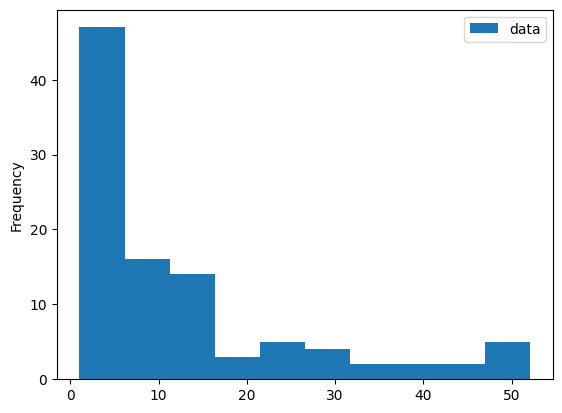

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

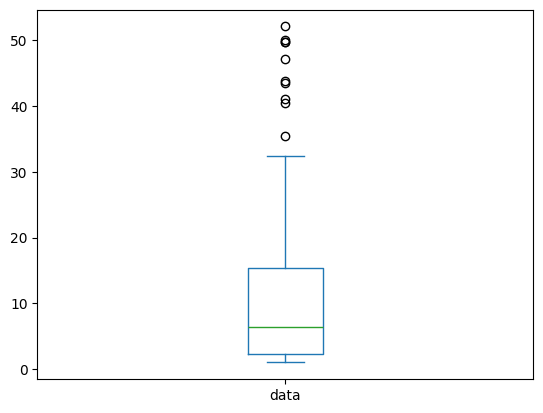

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
url = "https://raw.githubusercontent.com/muathdb/OMDS-Week2-Abusamreh-Muath-/refs/heads/main/colorectal_cancer_dataset.csv"
df = pd.read_csv(url)

In [5]:
df.head()

Patient_ID Country  Age Gender Cancer_Stage  Tumor_Size_mm Family_History  \
0           1      UK   77      M    Localized             69             No   
1           2      UK   59      M    Localized             33             No   
2           3   Japan   66      M     Regional             17             No   
3           4     USA   83      M     Regional             14             No   
4           5  France   66      M    Localized             34             No   

  Smoking_History Alcohol_Consumption Obesity_BMI  ... Survival_5_years  \
0              No                 Yes  Overweight  ...              Yes   
1              No                  No  Overweight  ...              Yes   
2             Yes                  No      Normal  ...              Yes   
3              No                  No       Obese  ...              Yes   
4             Yes                  No      Normal  ...              Yes   

  Mortality Healthcare_Costs Incidence_Rate_per_100K Mortality_Rate_per_100K  \
0        No            54413                      50                       5   
1        No            76553                      37                      25   
2        No            62805                      54                      27   
3        No            89393                      45                      11   
4        No            66425                      15                      27   

  Urban_or_Rural Economic_Classification Healthcare_Access Insurance_Status  \
0          Urban               Developed          Moderate          Insured   
1          Urban              Developing              High        Uninsured   
2          Urban               Developed          Moderate        Uninsured   
3          Urban               Developed          Moderate          Insured   
4          Urban              Developing              High          Insured   

  Survival_Prediction  
0                 Yes  
1                 Yes  
2                  No  
3                 Yes  
4                 Yes  

[5 rows x 28 columns]

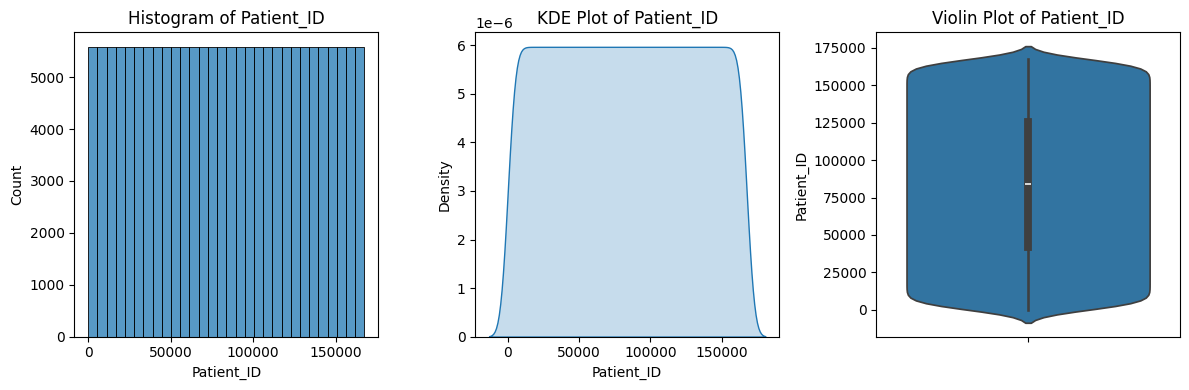

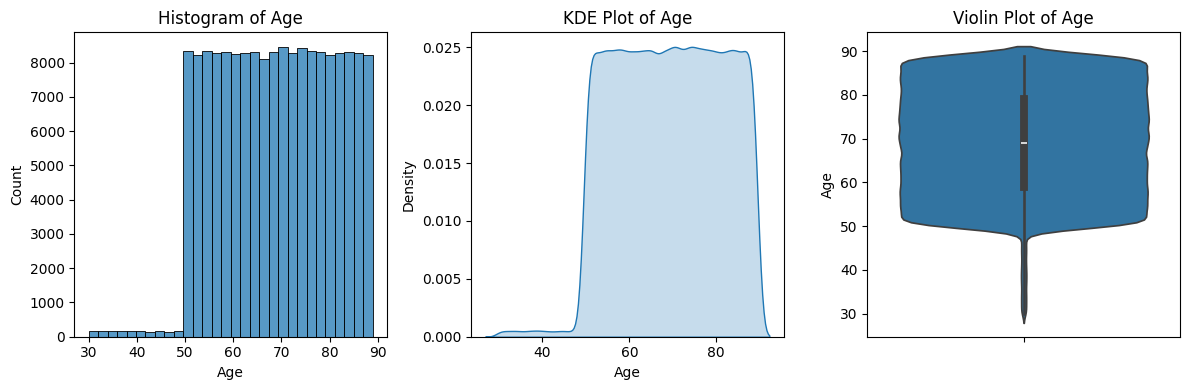

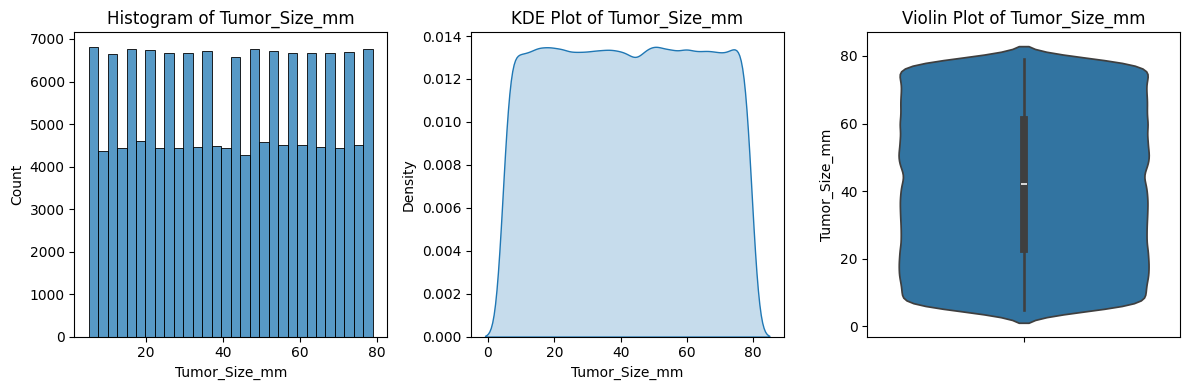

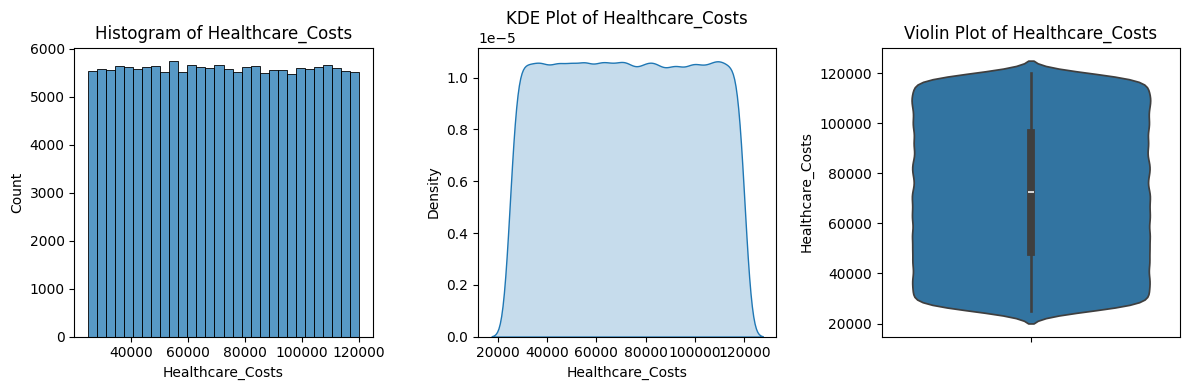

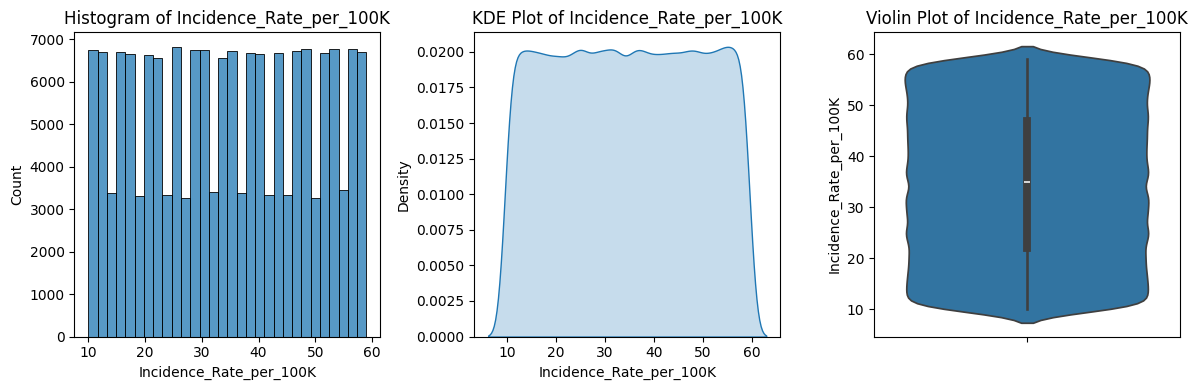

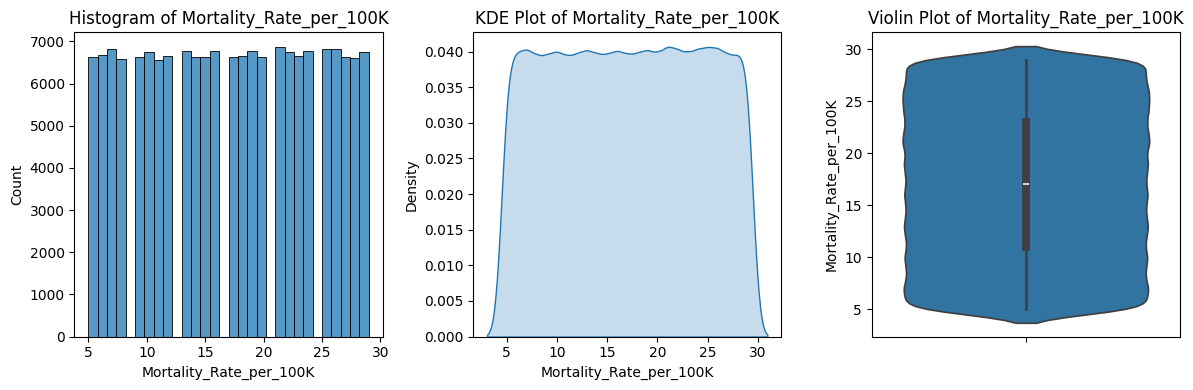

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

clean_numeric_cols = []
for col in numerical_cols:
    try:
        _ = sns.kdeplot(df[col], fill=True)
        clean_numeric_cols.append(col)
        plt.close()
    except:
        plt.close()

for col in clean_numeric_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 3, 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'KDE Plot of {col}')

    plt.subplot(1, 3, 3)
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot of {col}')

    plt.tight_layout()
    plt.show()

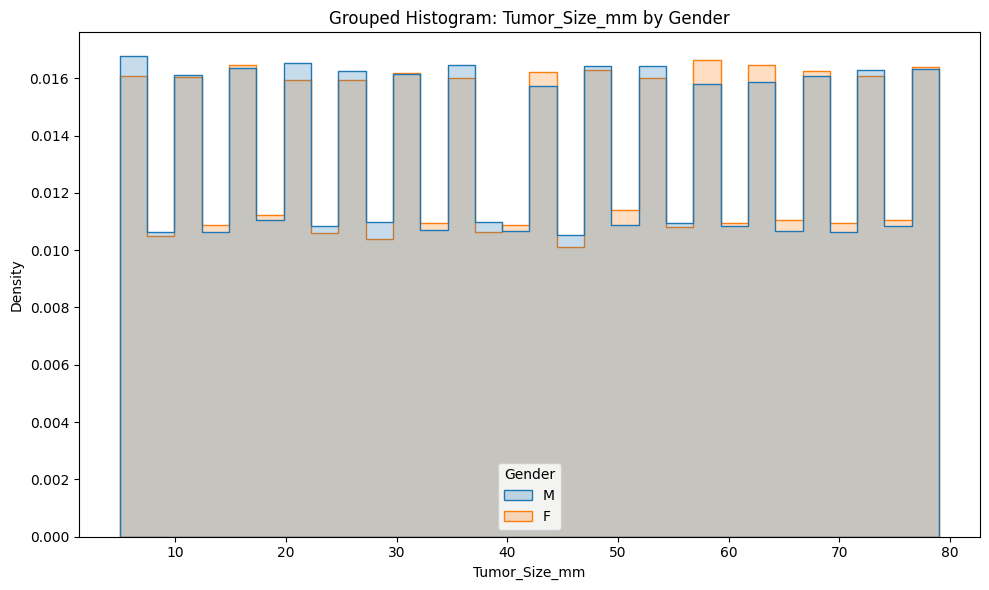

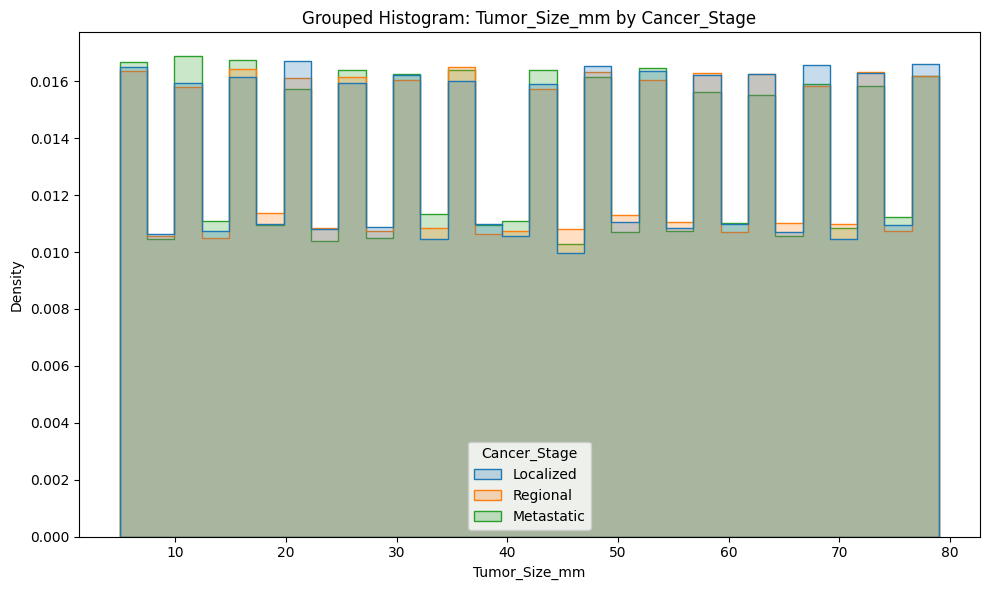

In [7]:
grouped_hist = [
    ('Tumor_Size_mm', 'Gender'),
    ('Tumor_Size_mm', 'Cancer_Stage')
]

for num_col, group_col in grouped_hist:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=num_col, hue=group_col, bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Grouped Histogram: {num_col} by {group_col}')
    plt.tight_layout()
    plt.show()

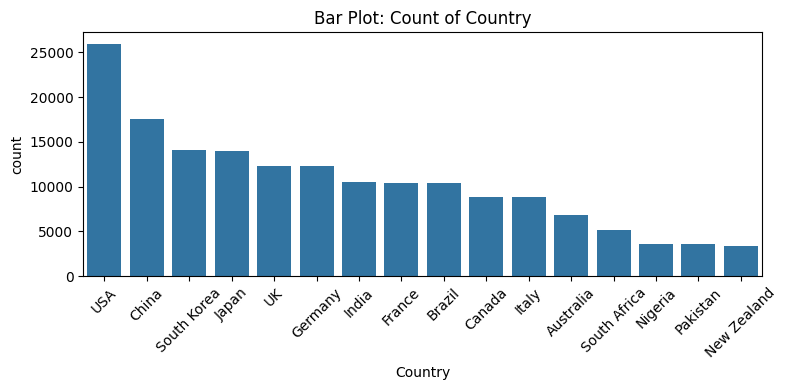

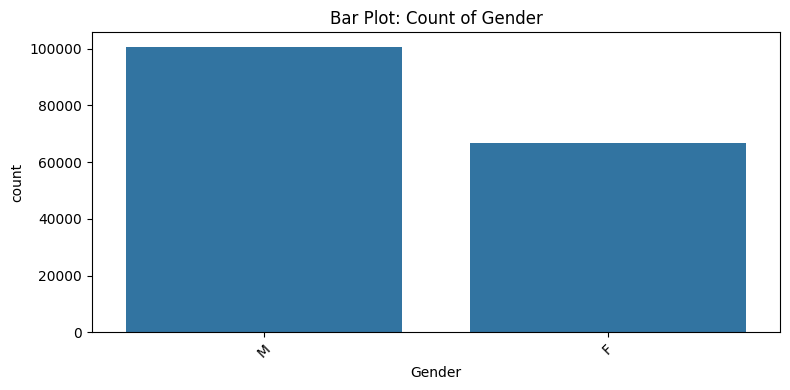

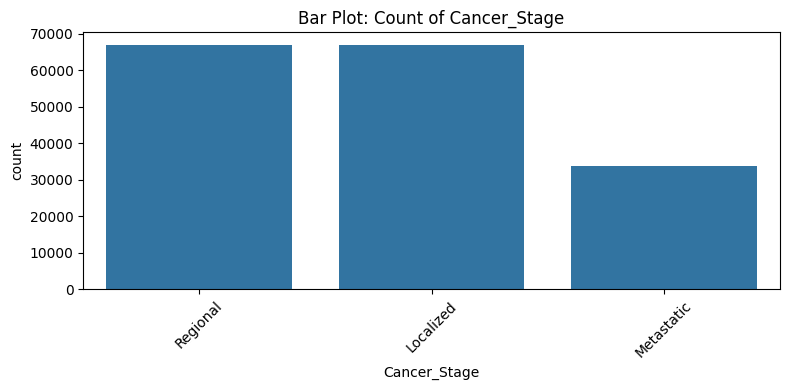

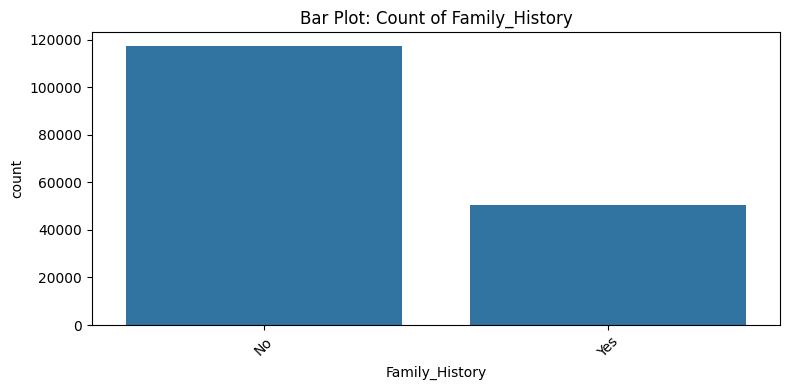

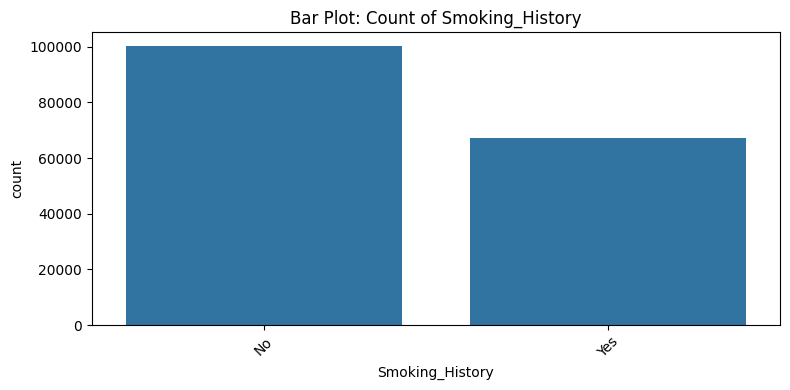

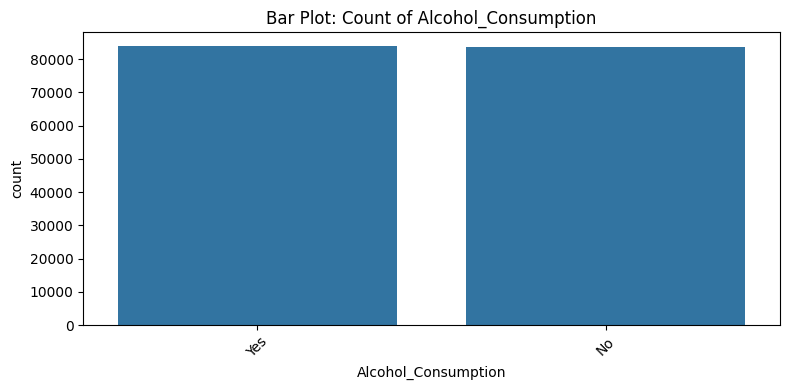

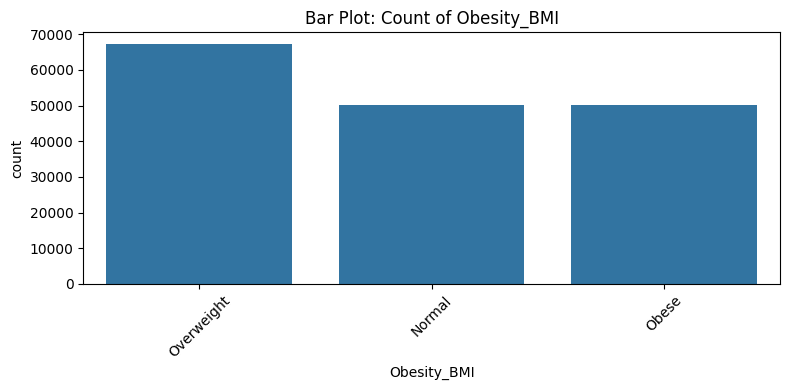

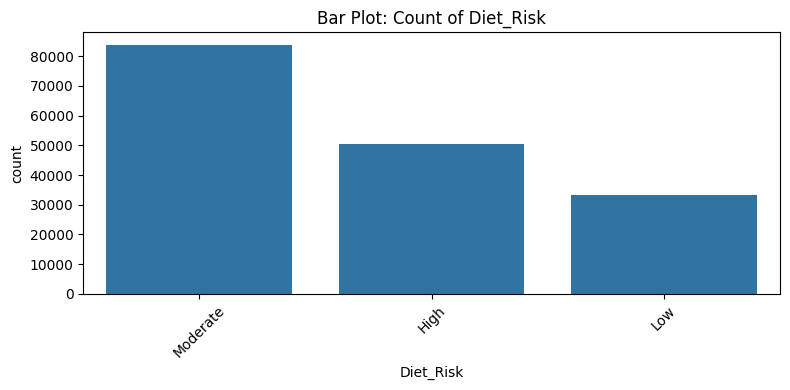

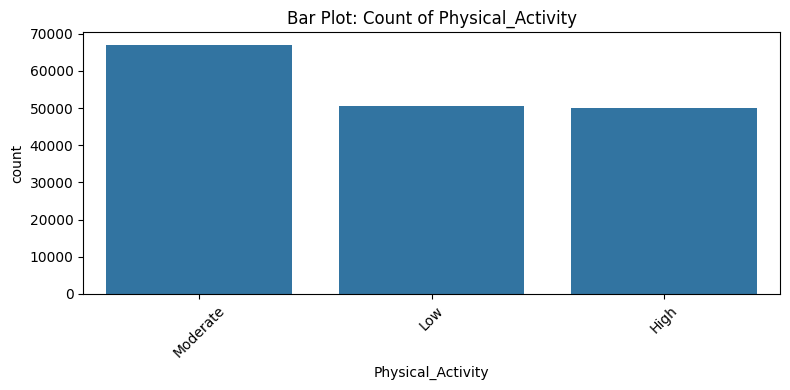

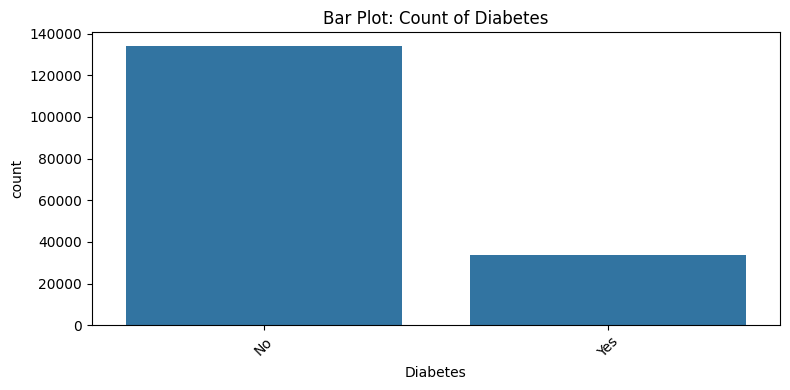

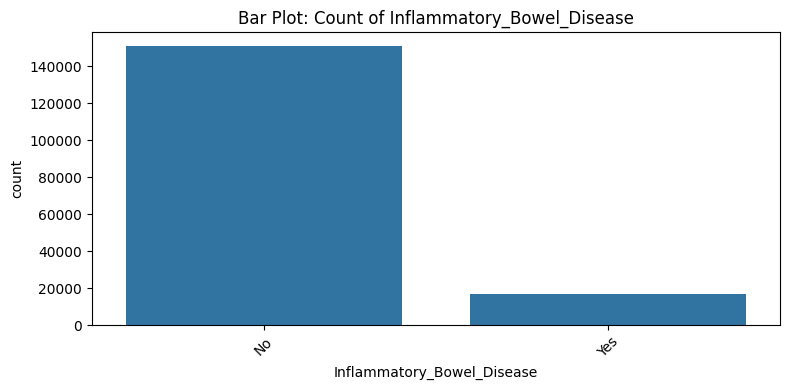

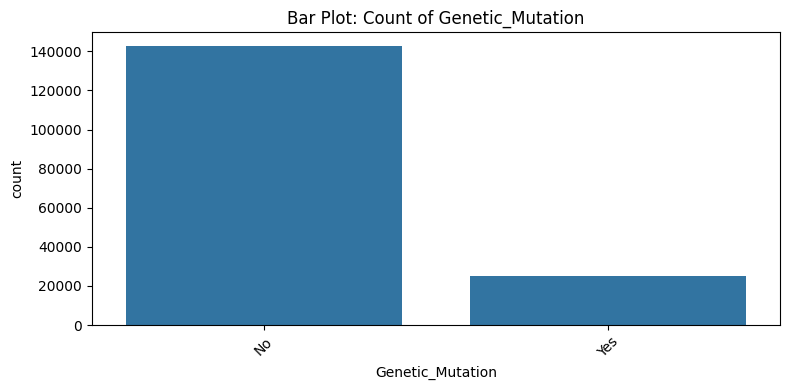

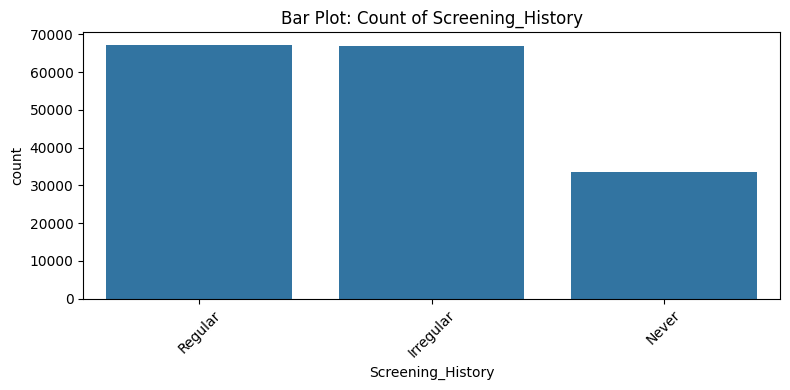

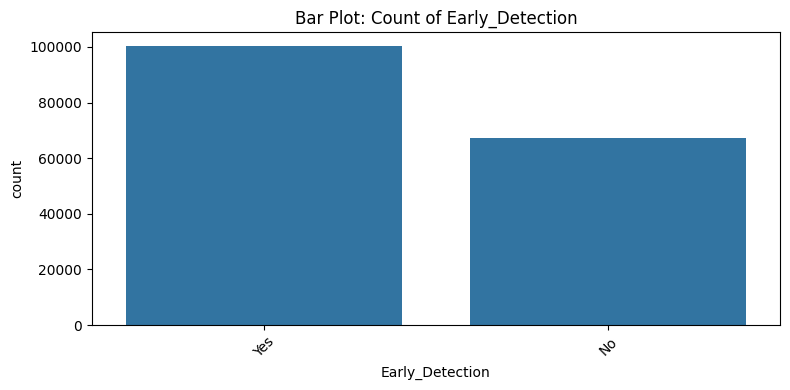

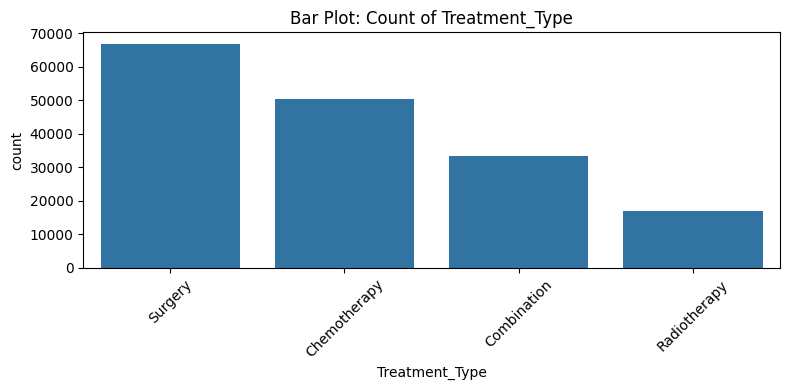

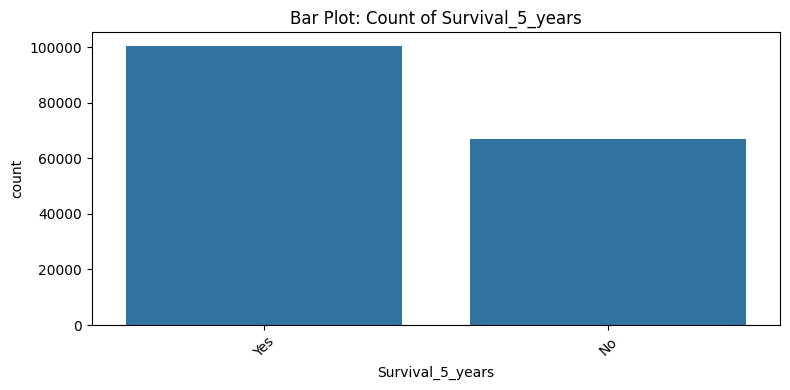

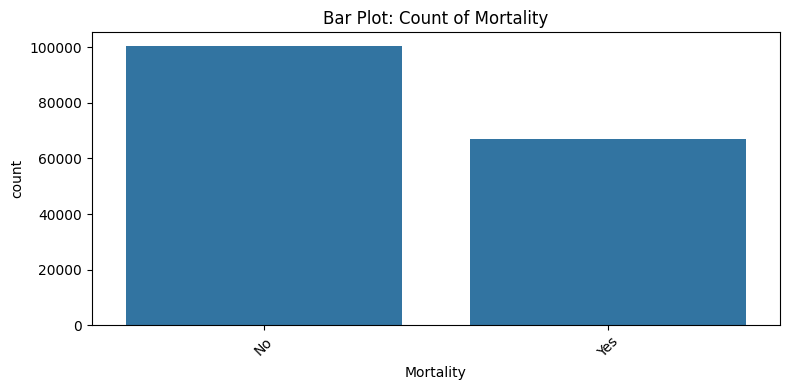

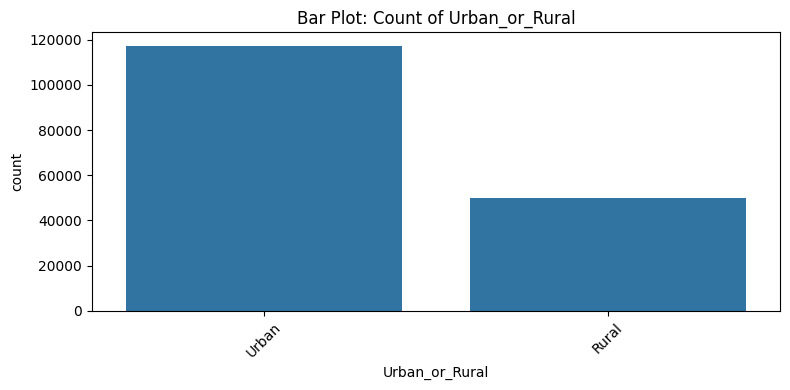

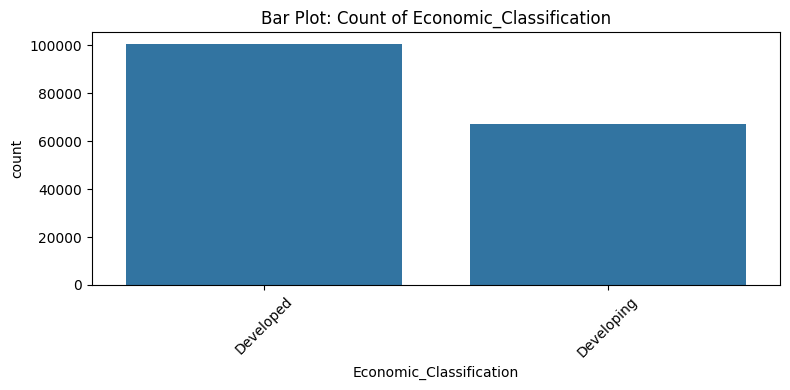

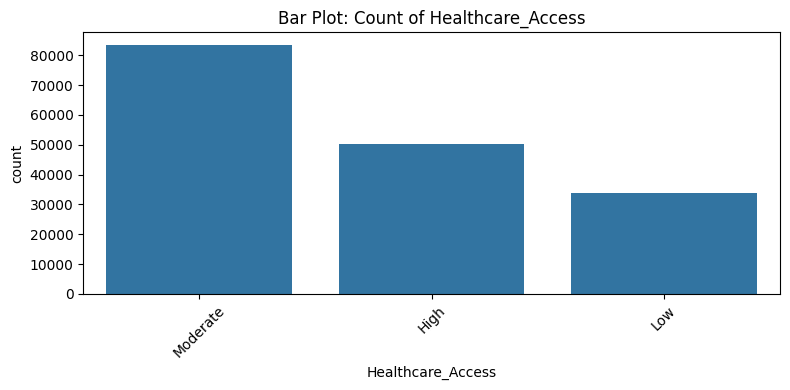

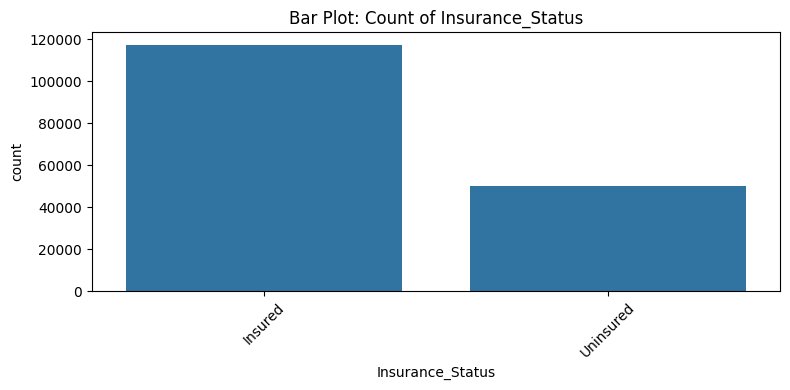

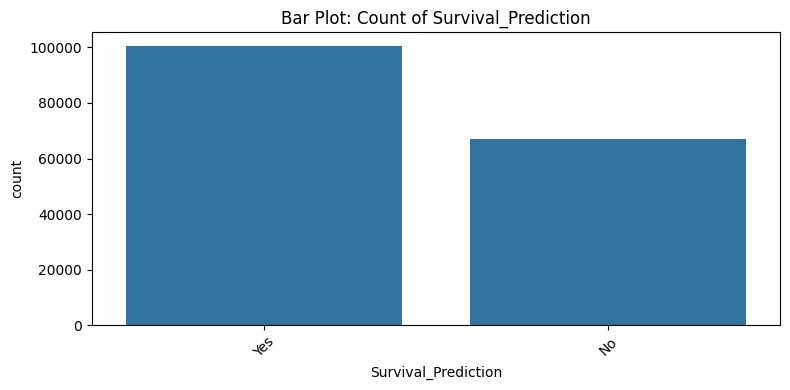

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot: Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
mean_values = df[numeric_cols].mean()

median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

print(summary_stats)

                                 Mean   Median     Mode
Patient_ID               83749.000000  83749.0      1.0
Age                         69.200780     69.0     74.0
Tumor_Size_mm               42.005708     42.0     22.0
Healthcare_Costs         72452.168099  72344.0  53546.0
Incidence_Rate_per_100K     34.531562     35.0     25.0
Mortality_Rate_per_100K     17.023875     17.0     21.0


Are the data what you expect? Are they usable?
Yes because the data has a good structured and clean with no missing values, all columns are well-labeled, and the features span demographics, risk factors, treatment types, and outcomes. The dataset is large (~167,000 rows), offering strong potential for reliable statistical modeling and machine learning. It is very usable for predictive modeling and public health analysis.


Shape of Distributions
Age: Right-skewed (positively skewed), with most patients being older adults (60s–80s). 

Tumor Size: Roughly symmetric, though some right-skewness exists due to a few very large tumors.

Healthcare Costs: Strongly right-skewed. Most patients have moderate costs, but a few incur extremely high costs—likely due to intensive or late-stage treatment.

Incidence/Mortality Rates: Uniform to mildly skewed depending on the country or demographic group.

Conclusion: These distributions do not appear normal; instead, many are skewed or long-tailed, especially healthcare-related costs and ages.



Outliers
Yes, especially in:

Healthcare Costs: A few patients have much higher costs than others—potentially representing aggressive late-stage treatment.

Tumor Size: Some values exceed 150mm, which could be biologically plausible but rare.



Distribution Across Groups (Grouped Histograms)
Tumor Size by Cancer Stage: Earlier stages show smaller tumors; later stages show a wider range with higher values. The shape spreads and shifts right.

Healthcare Costs by Gender: Generally similar, but some slight shifts in density suggest different treatment burdens.

Age by Survival: Survivors cluster more around 60s–70s, while non-survivors slightly shift older—suggesting age is a moderate predictor of outcome.



Min & Max Values from Histograms
Age: Min ~18, Max ~90+

Tumor Size: Min ~5mm, Max >150mm

Healthcare Costs: Min ~$10,000, Max >$100,000

These values are within biologically plausible ranges but confirm the presence of long tails and potential outliers.



Effect of Bin Size
Smaller bins reveal bimodal patterns in age and dense clustering in tumor size.

Larger bins can oversmooth and hide nuances.

Adjusting bin sizes in histplot helped uncover:

Sharp peaks in cost distributions

More precise separation in age between survival groups



Conclusion:
The dataset is rich and usable, with well-formed structure and informative patterns. Distributions are largely skewed or non-normal, with outliers present. However, those patterns make the dataset especially useful for risk modeling and subgroup analysis in healthcare.

In [10]:
url = "https://raw.githubusercontent.com/muathdb/OMDS-Week2-Abusamreh-Muath-/refs/heads/main/Acute%20Kidney.csv"
df2 = pd.read_csv(url)

In [11]:
df2.head()

gender  age   race  unit   bmi  weight     t      p     r    bp  ...    ph  \
0      M   76  white  MICU  30.2    96.8  37.0  112.0  17.0  76.0  ...  7.35   
1      M   91  other   CCU  24.1    65.7  36.2   81.0  21.0  72.0  ...   NaN   
2      M   68  other   CCU  26.1    78.0  36.0   56.0  22.0  77.0  ...  7.36   
3      F   36  other  MICU   NaN    70.0  37.4  112.0  17.0  79.0  ...  7.28   
4      F   71  other  CSRU  21.7    53.7  37.0   85.0  16.0  78.0  ...  7.46   

      cl   na    k  bicarbonate  scr  bun    po2  pco2  lactate  
0  114.0  138  4.4         13.0  2.4   41   20.0  40.0      4.3  
1   97.0  129  4.1         18.0  2.1   46    NaN   NaN      NaN  
2  107.0  138  3.6         24.0  0.7   19    NaN   NaN      2.0  
3  112.0  141  3.8         17.0  0.6   11  533.0  37.0      7.0  
4  110.0  138  6.9         22.0  0.6   16  388.0  27.0      NaN  

[5 rows x 57 columns]

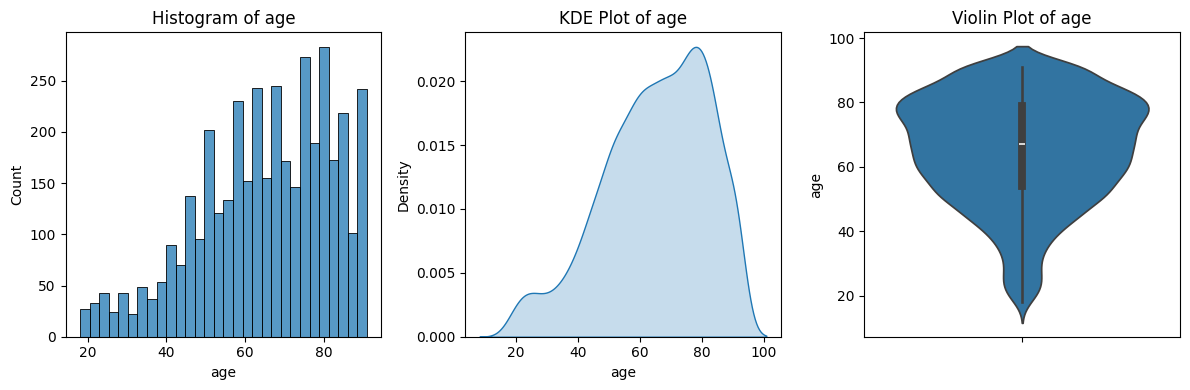

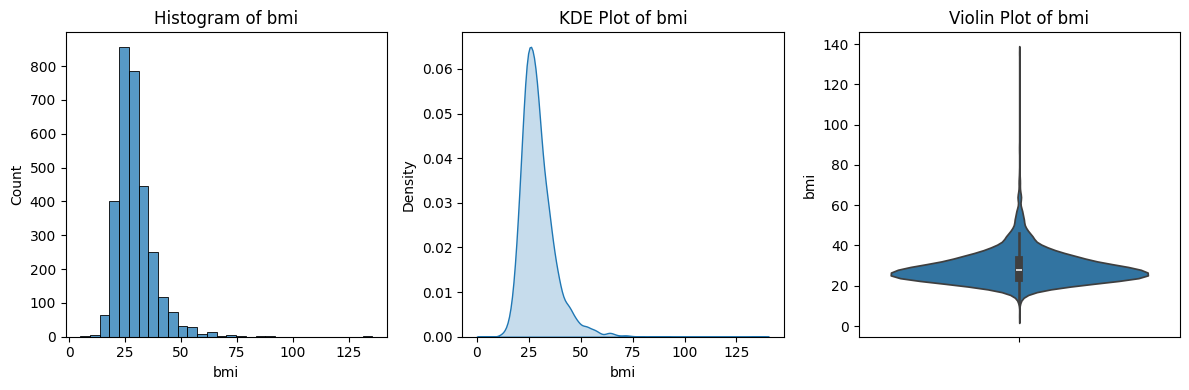

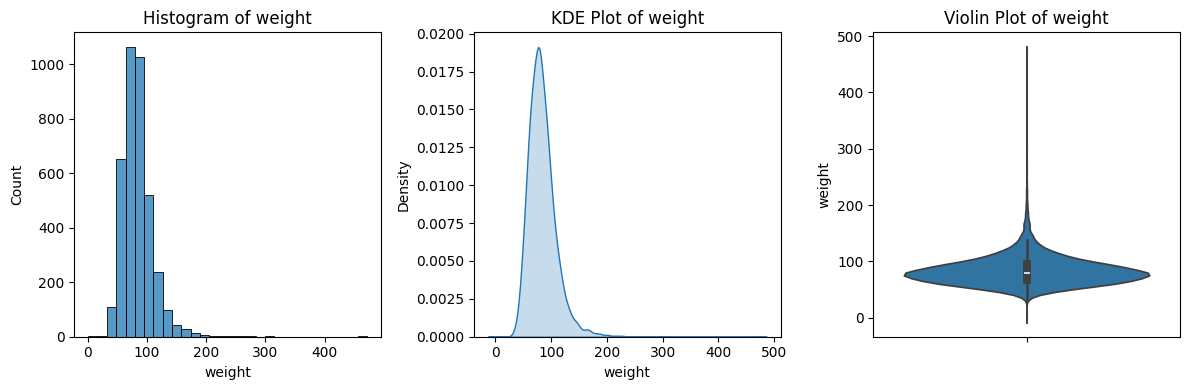

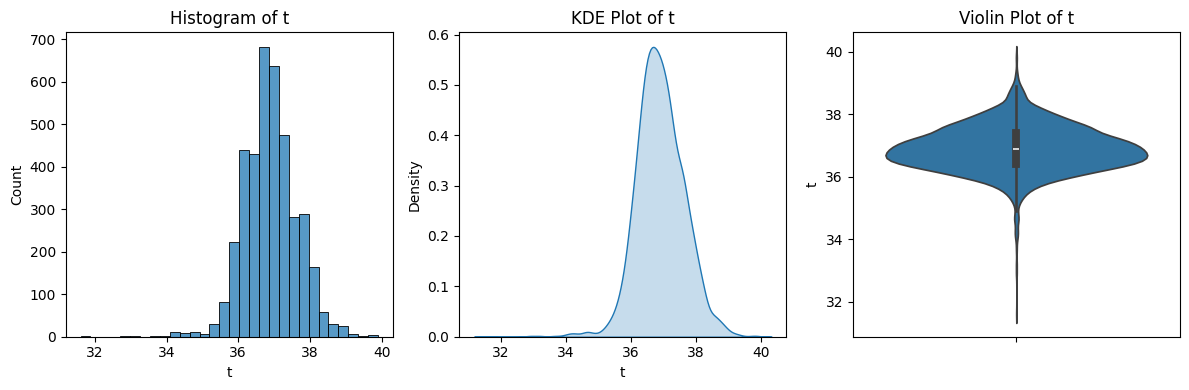

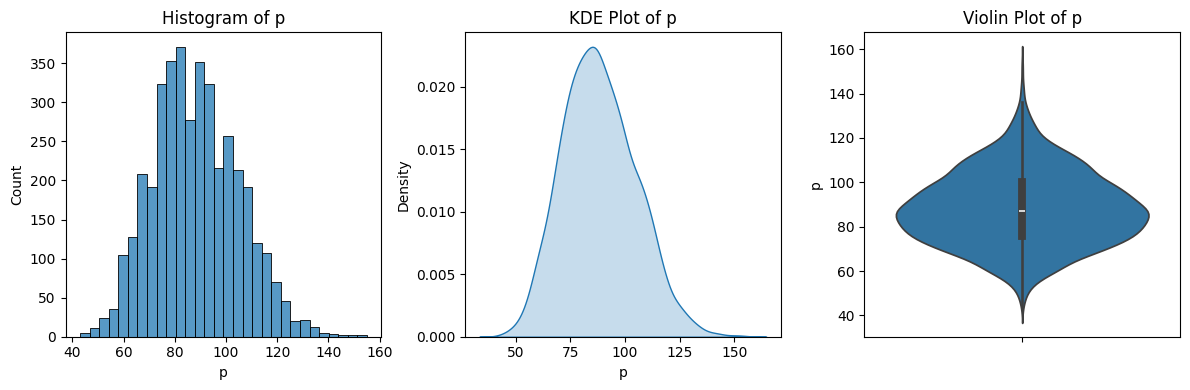

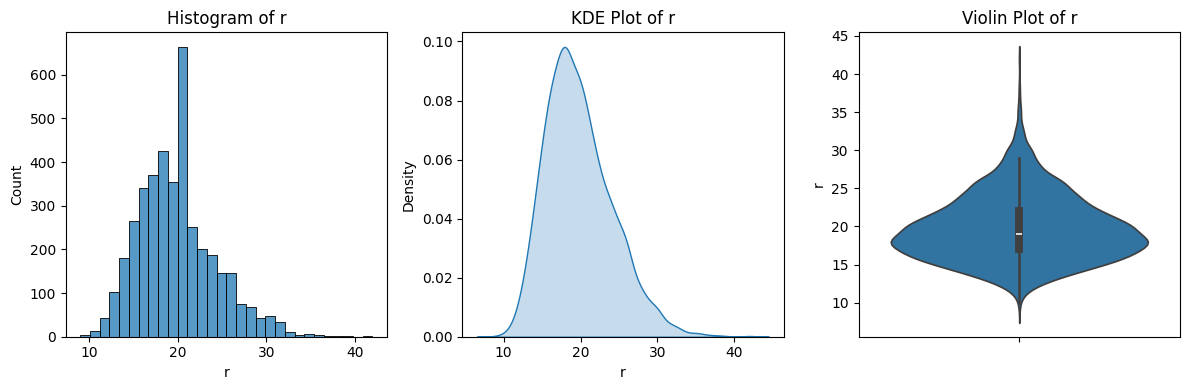

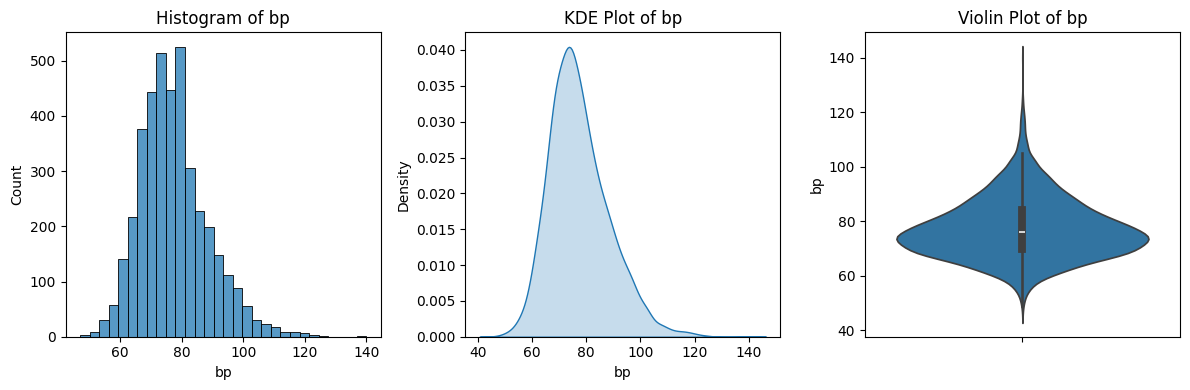

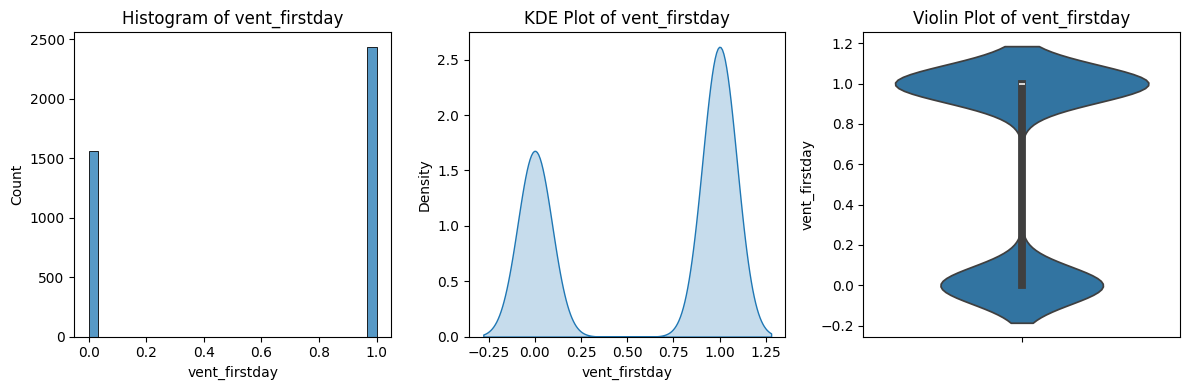

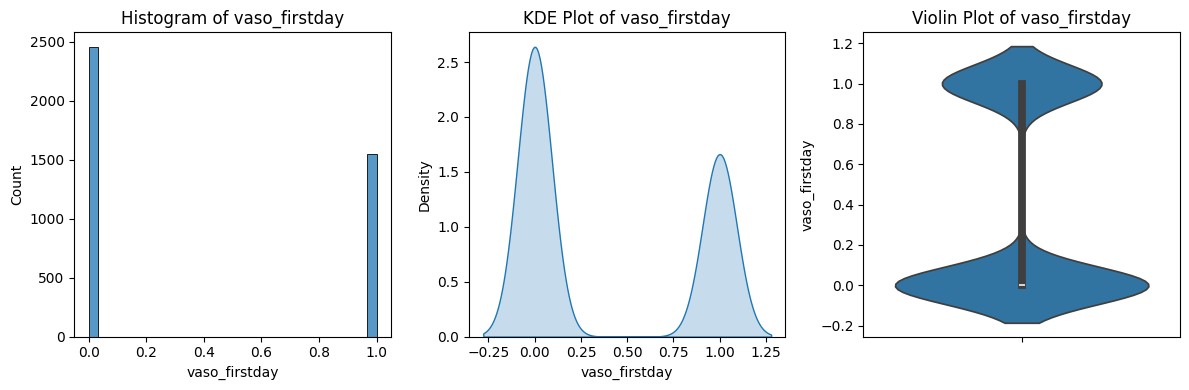

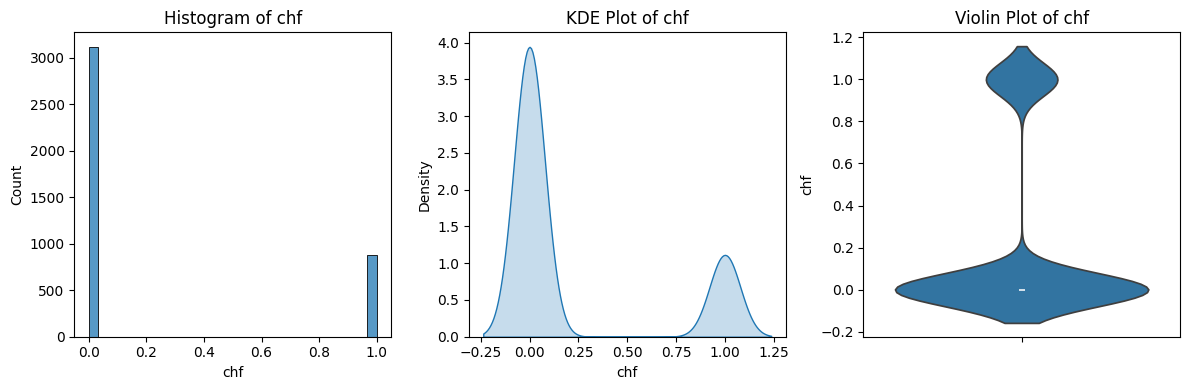

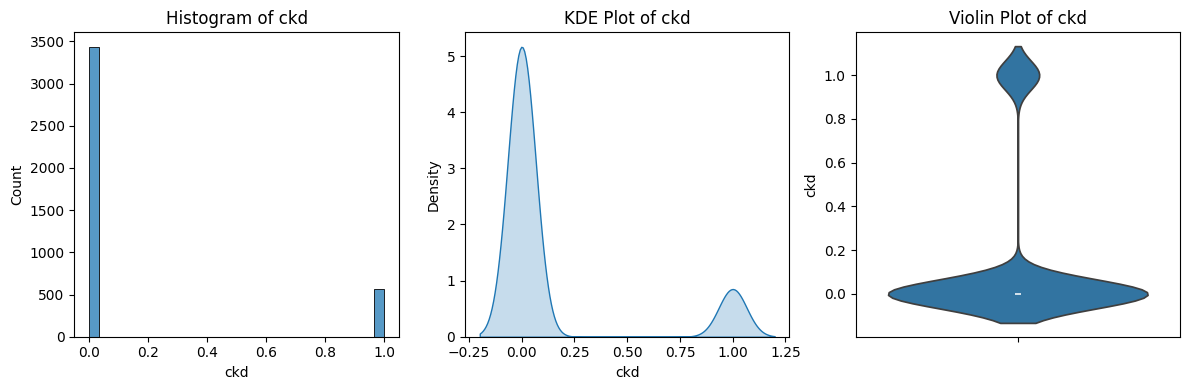

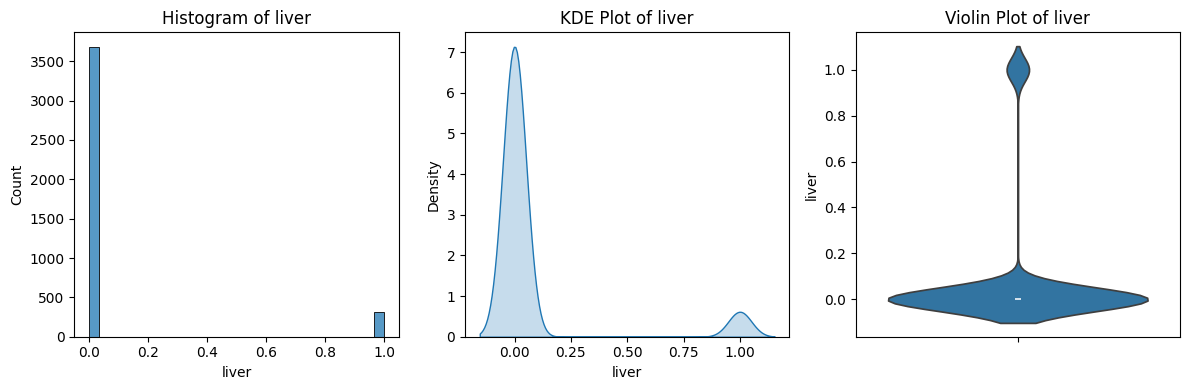

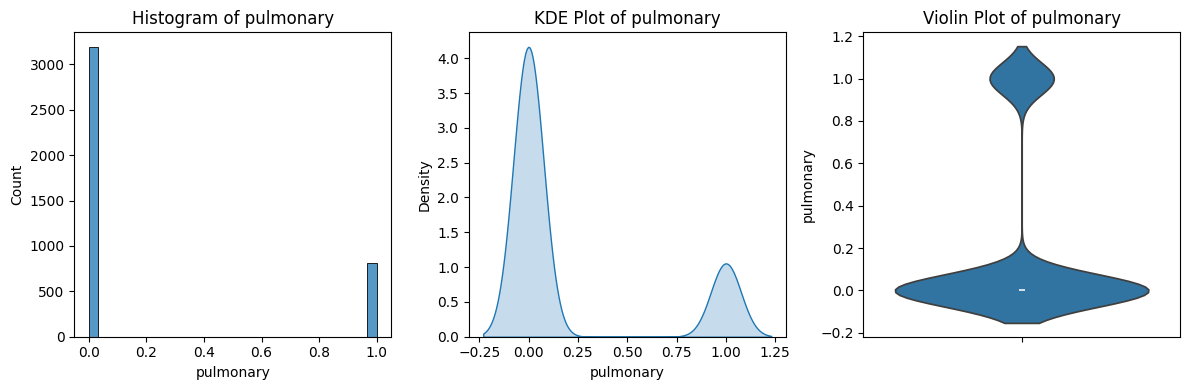

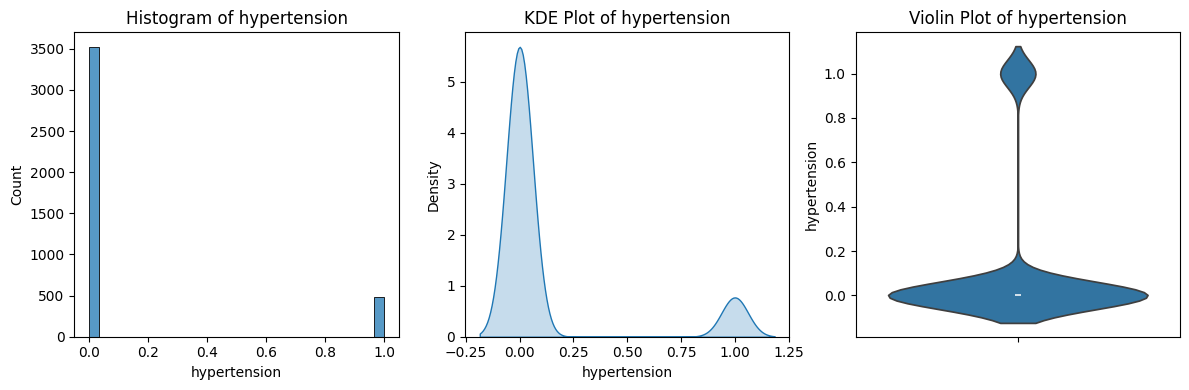

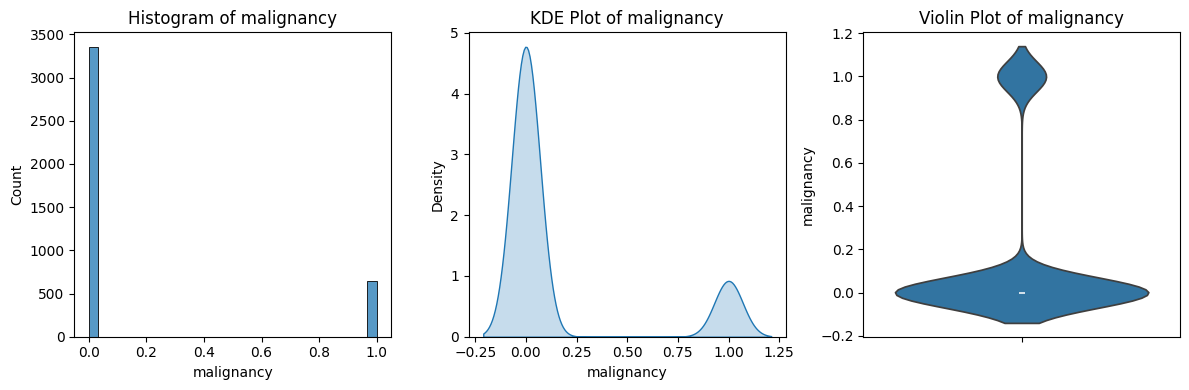

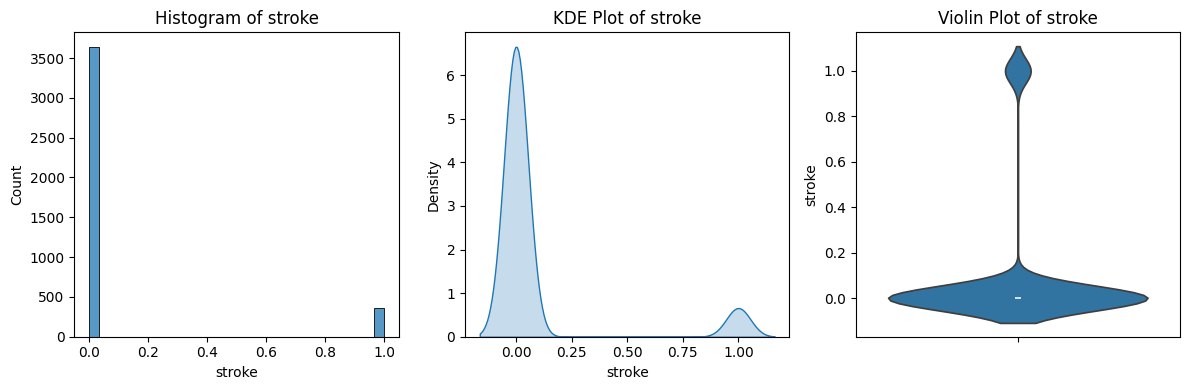

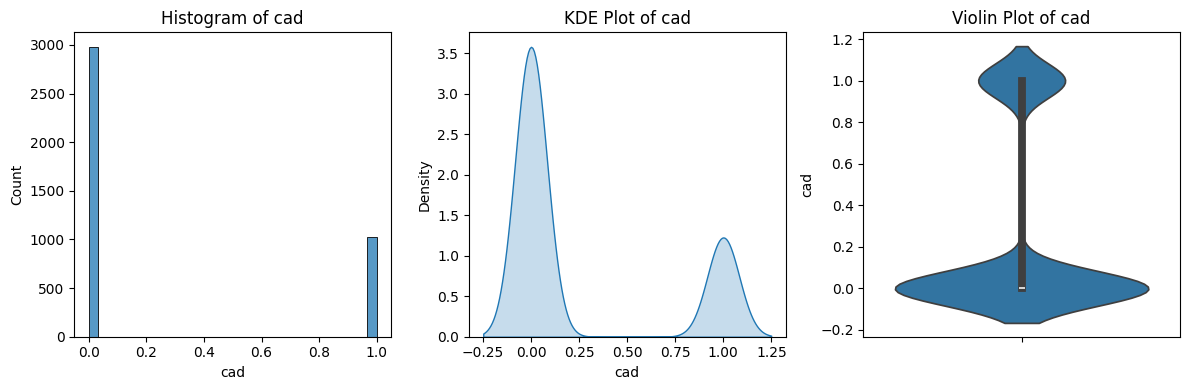

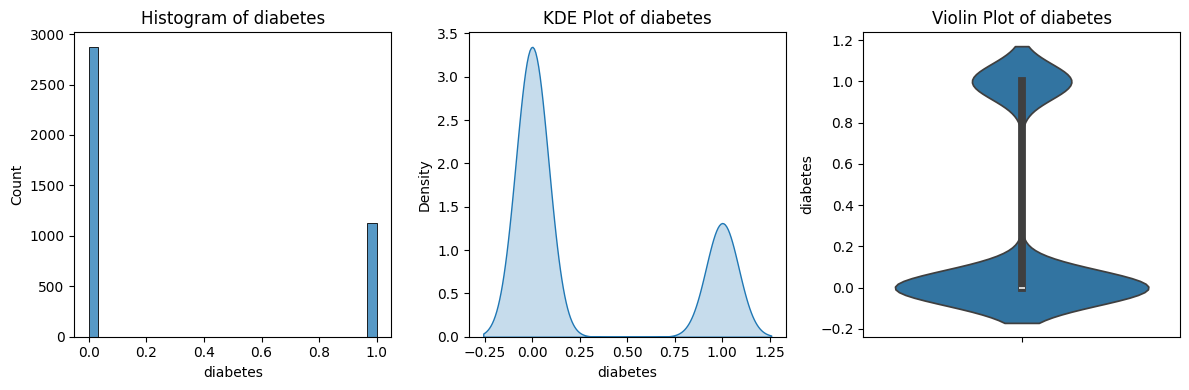

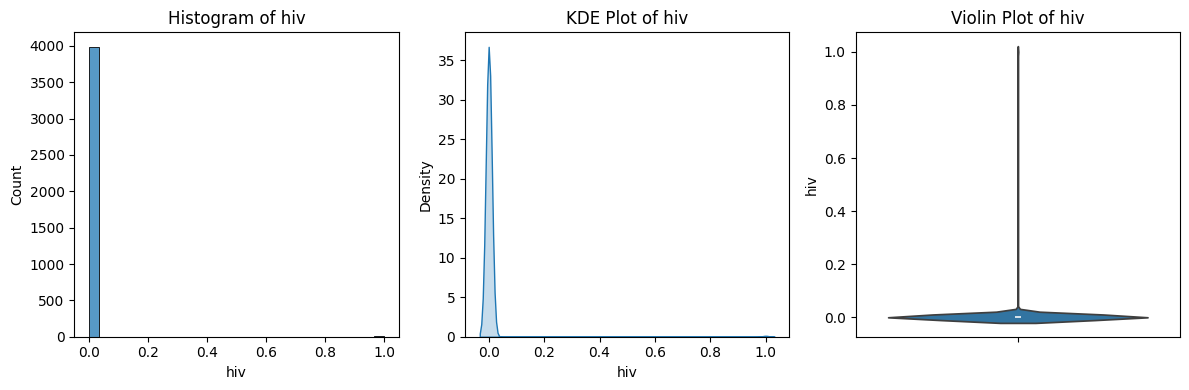

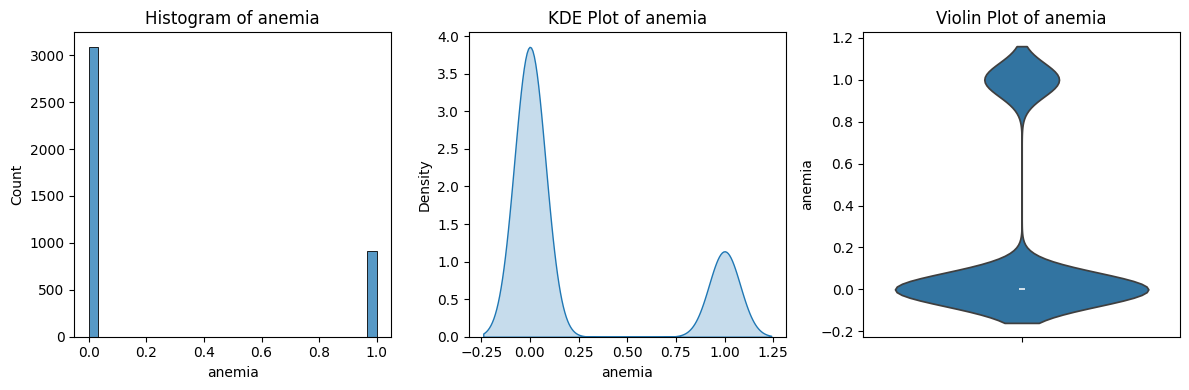

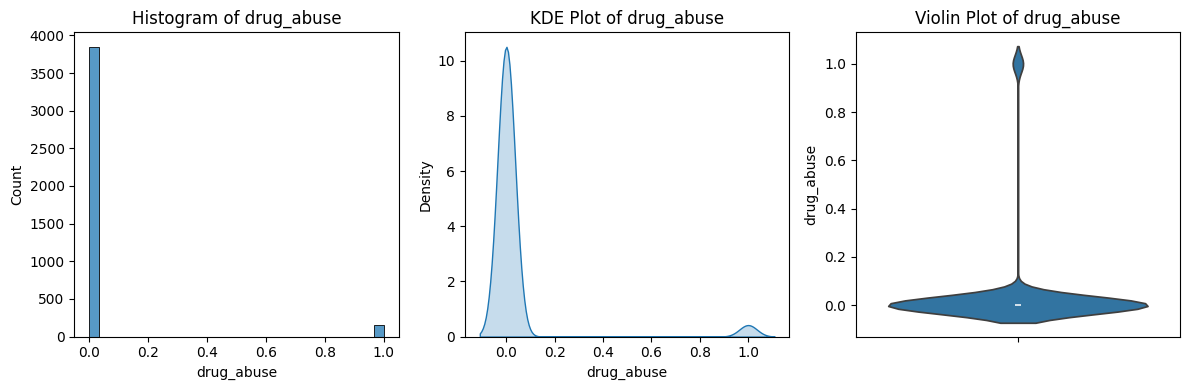

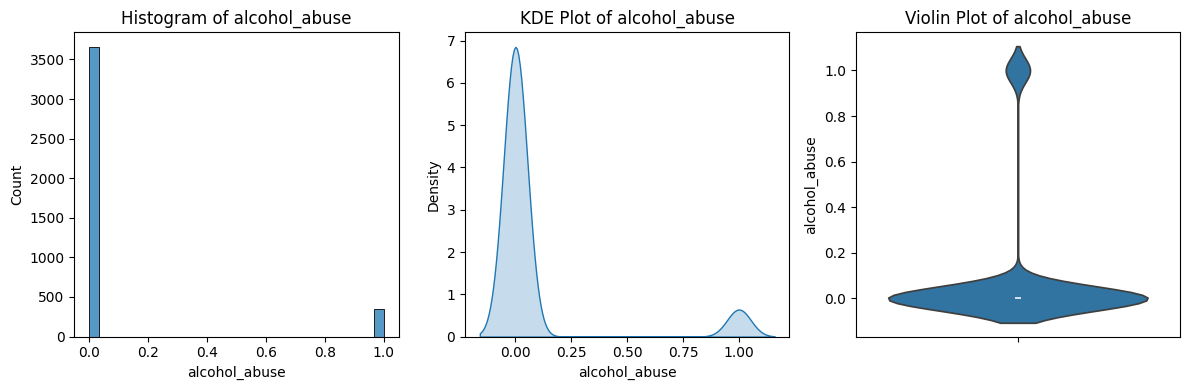

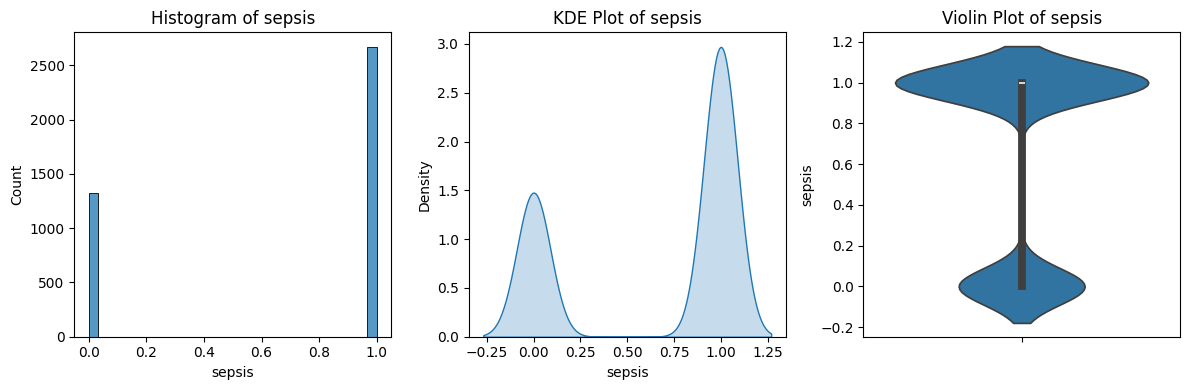

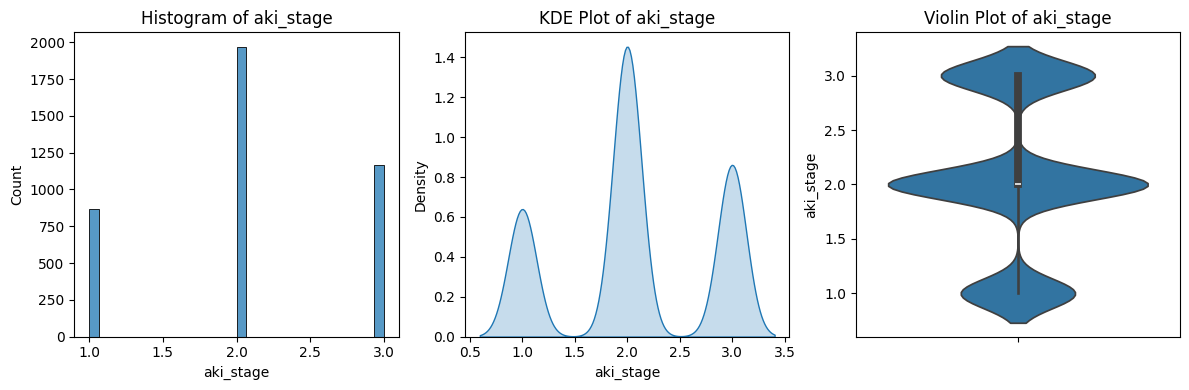

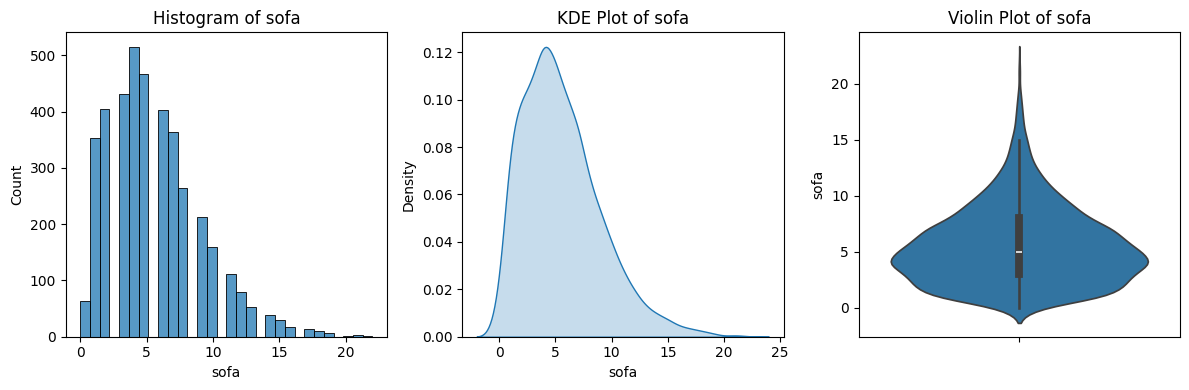

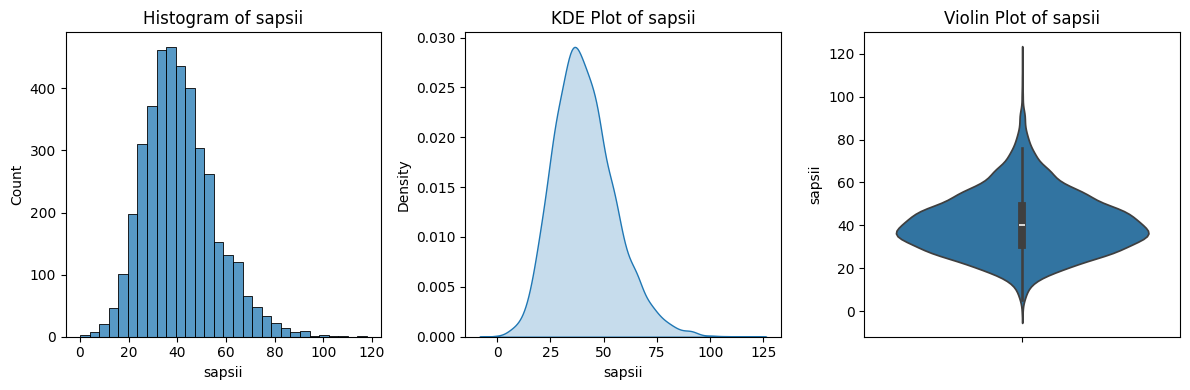

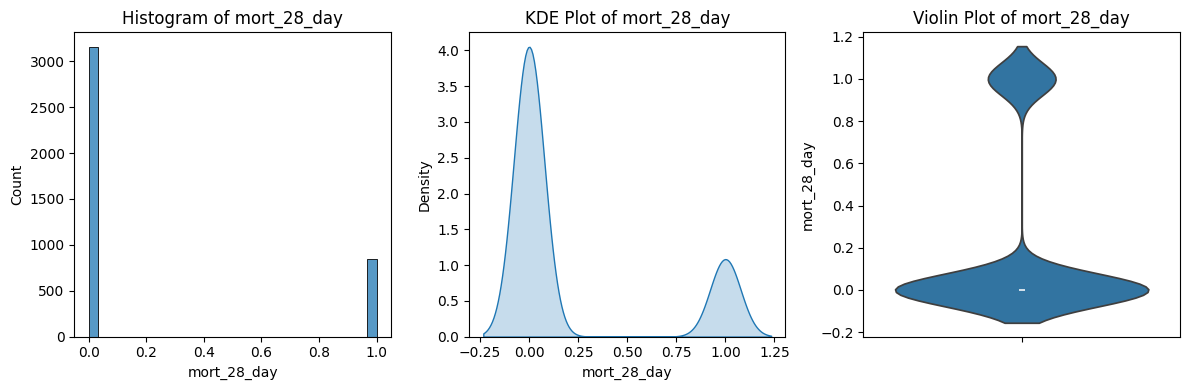

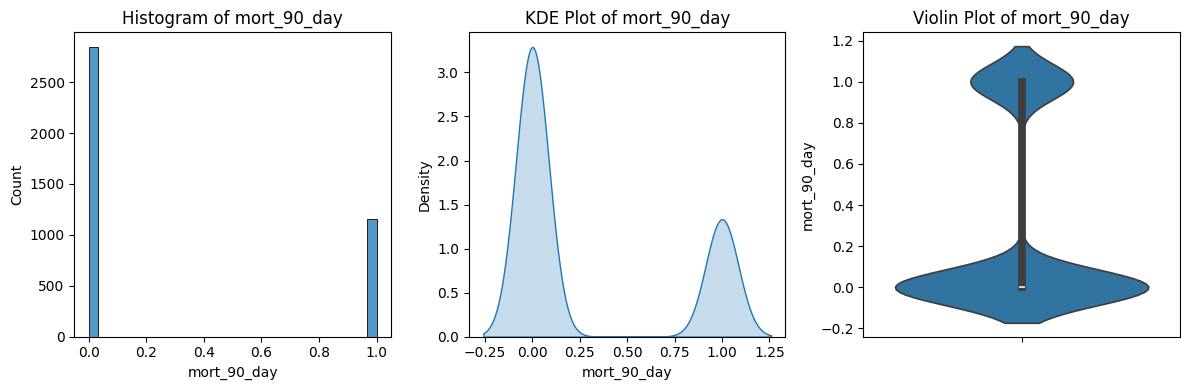

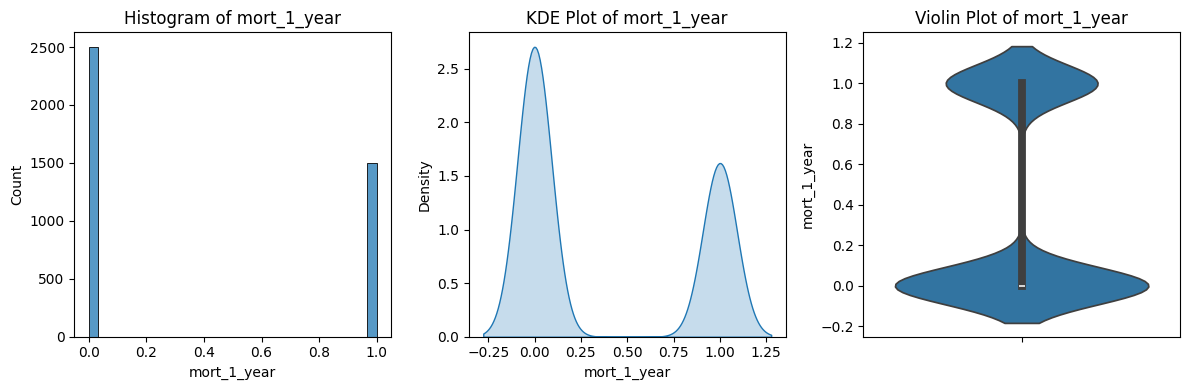

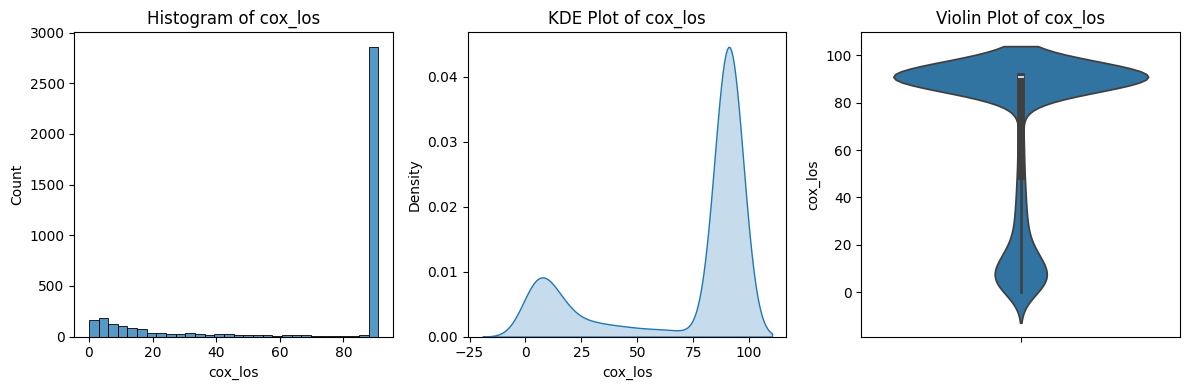

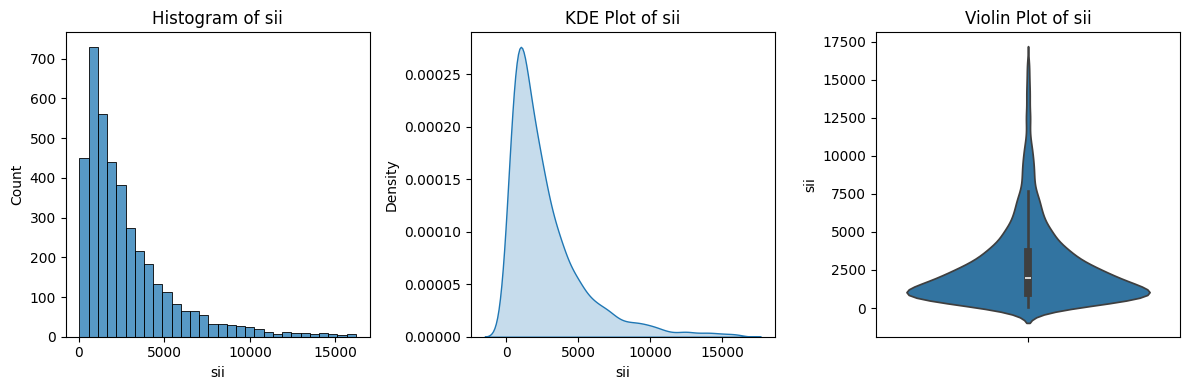

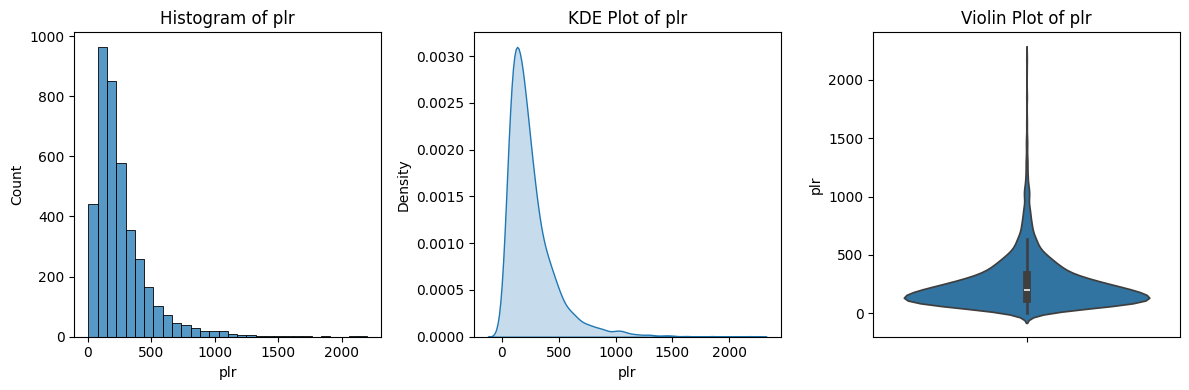

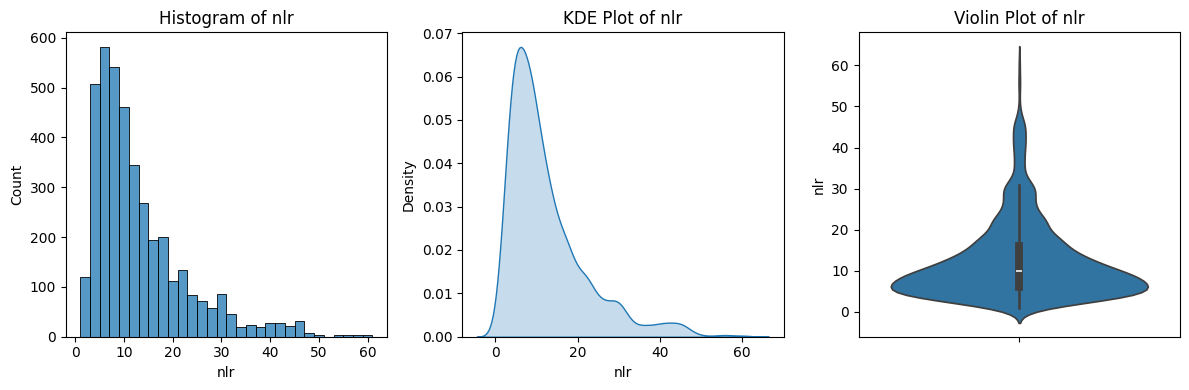

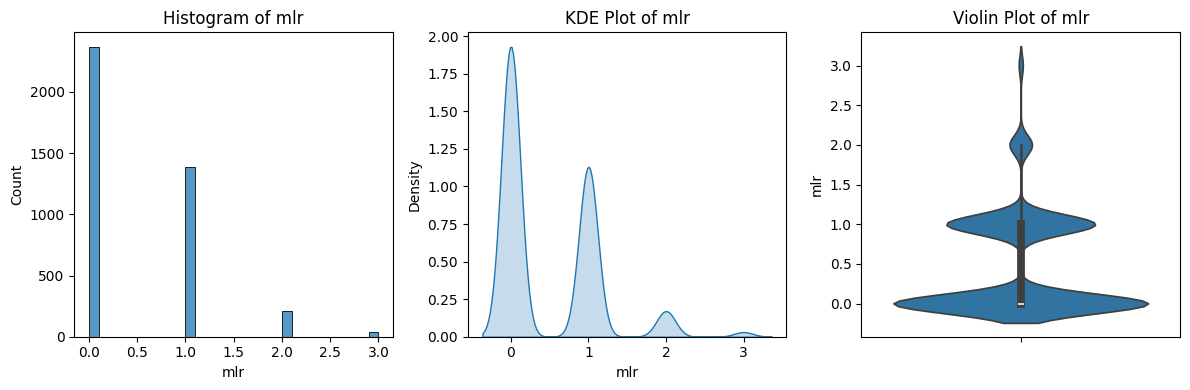

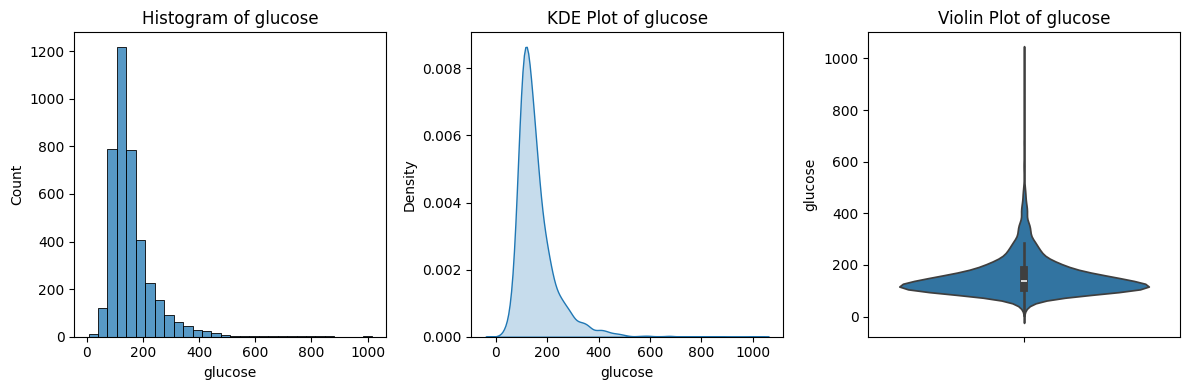

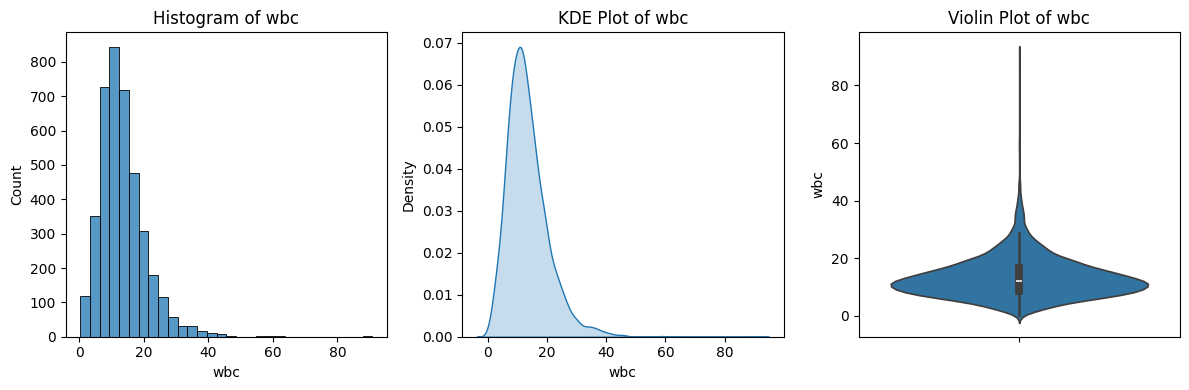

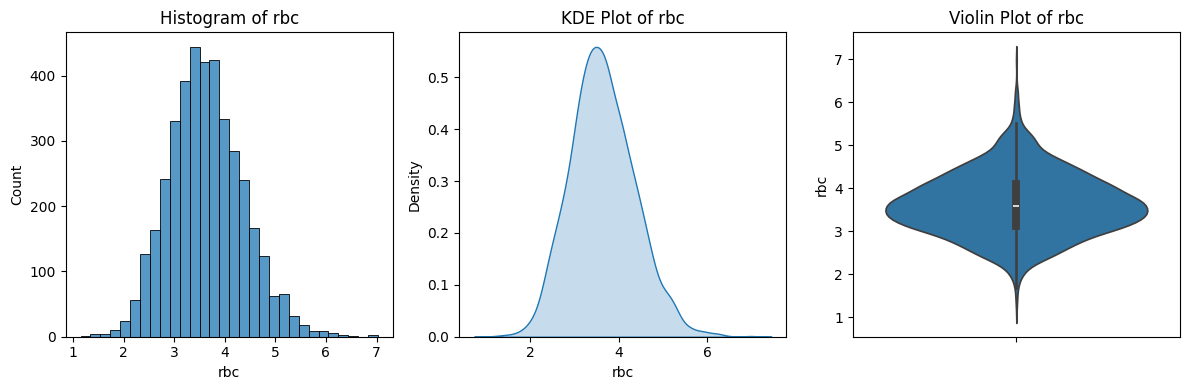

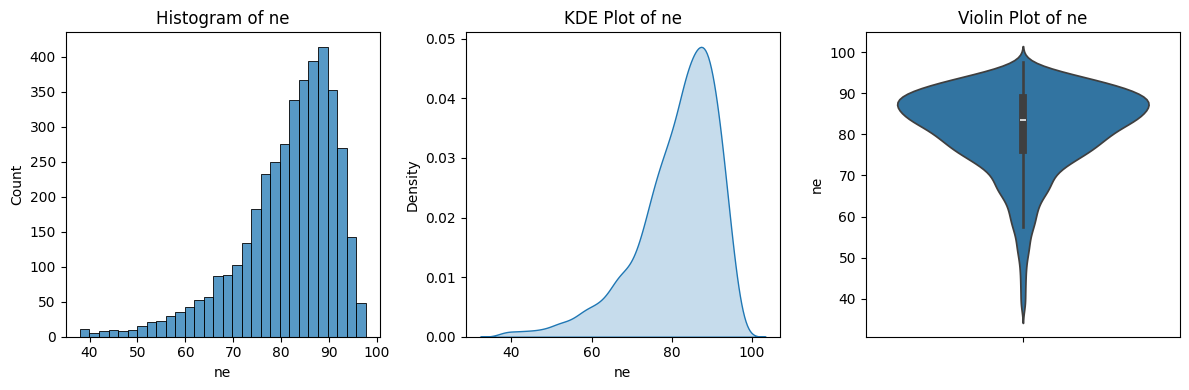

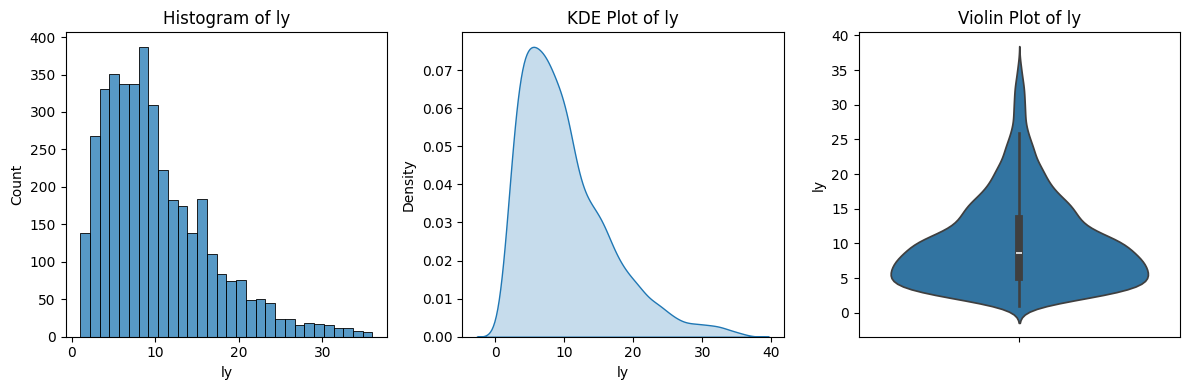

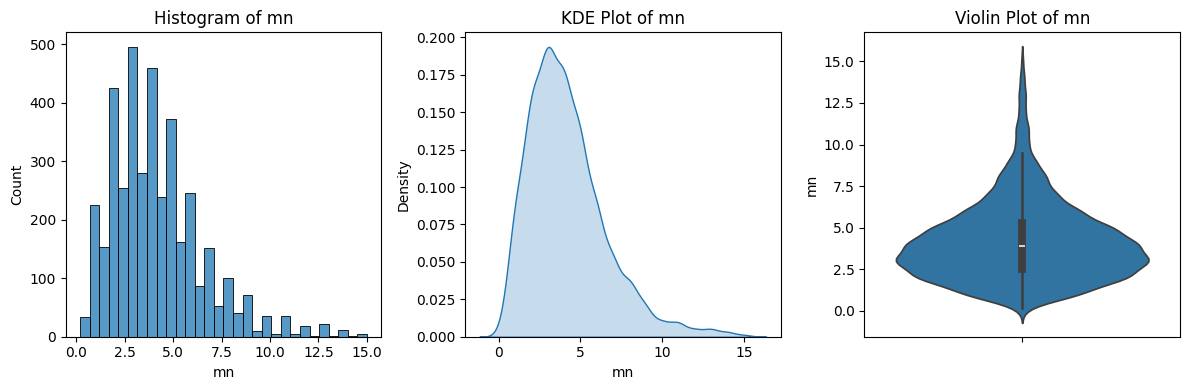

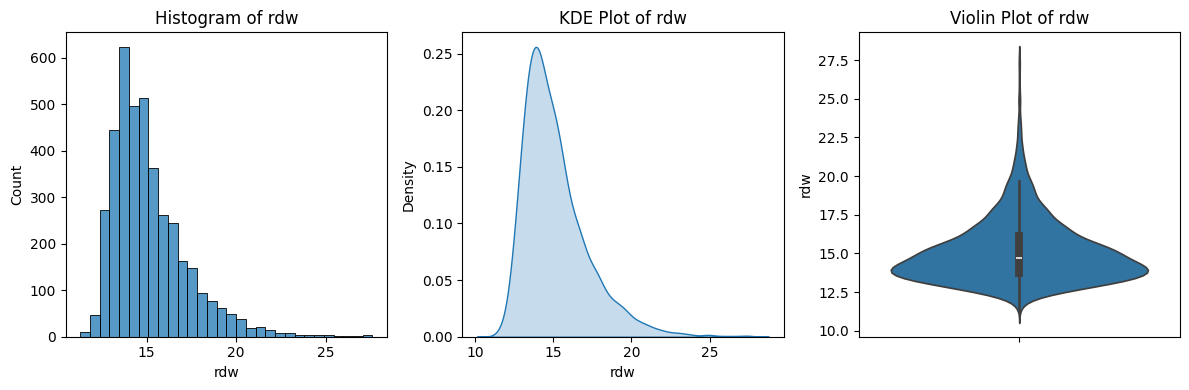

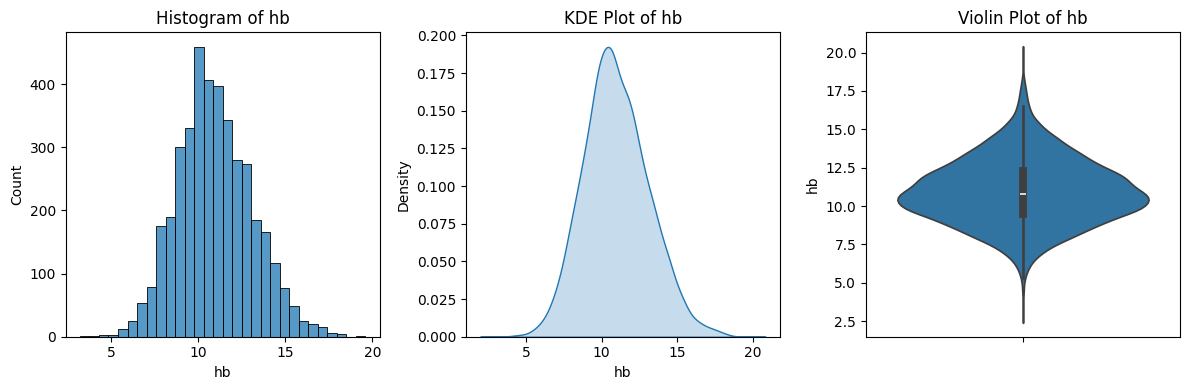

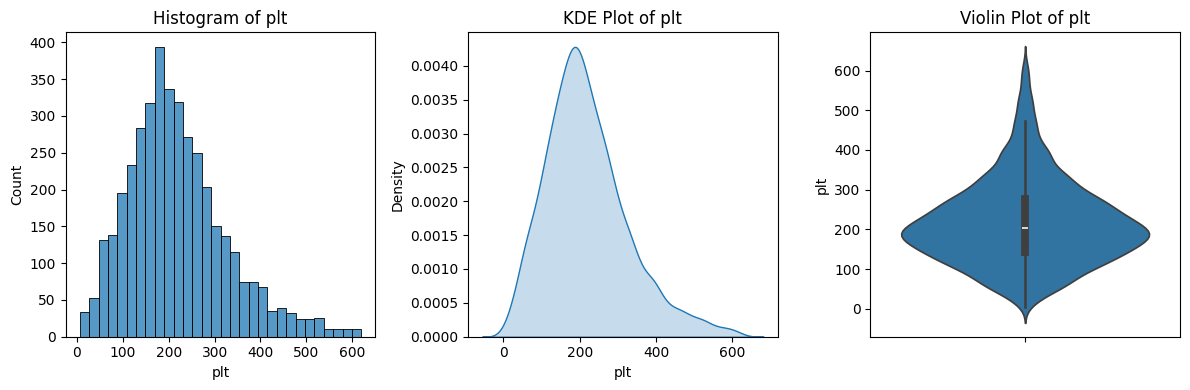

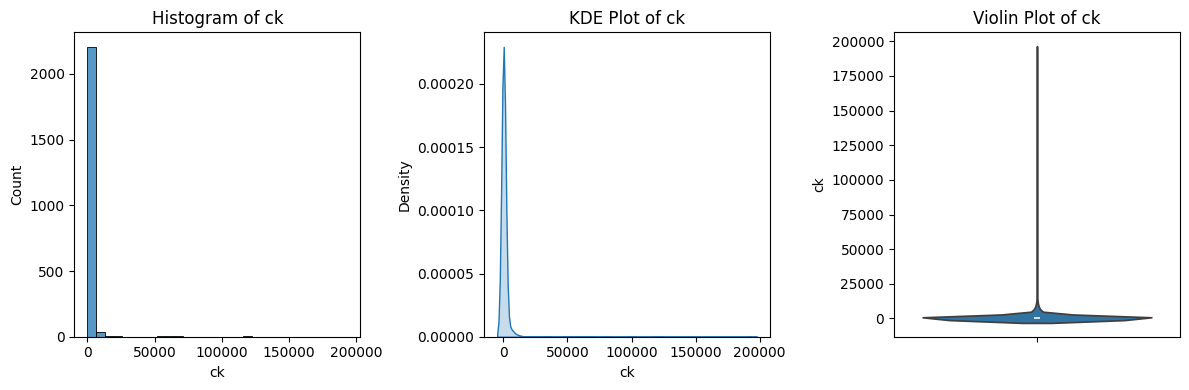

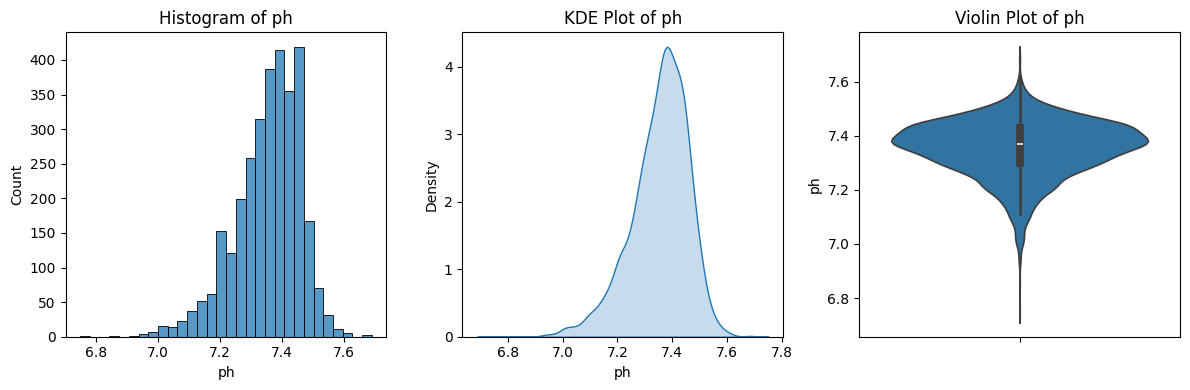

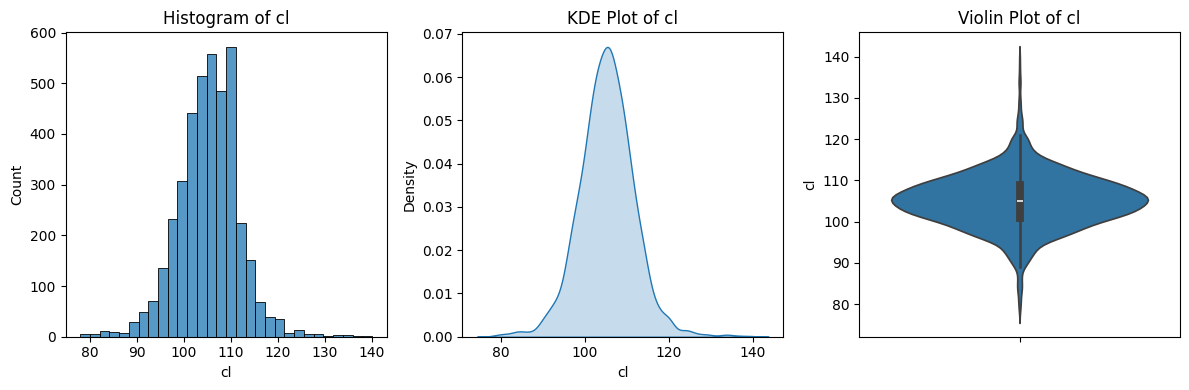

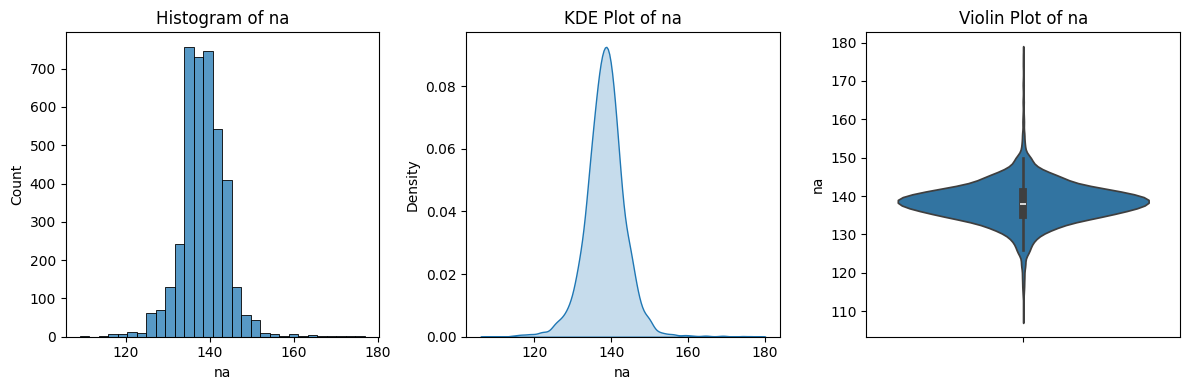

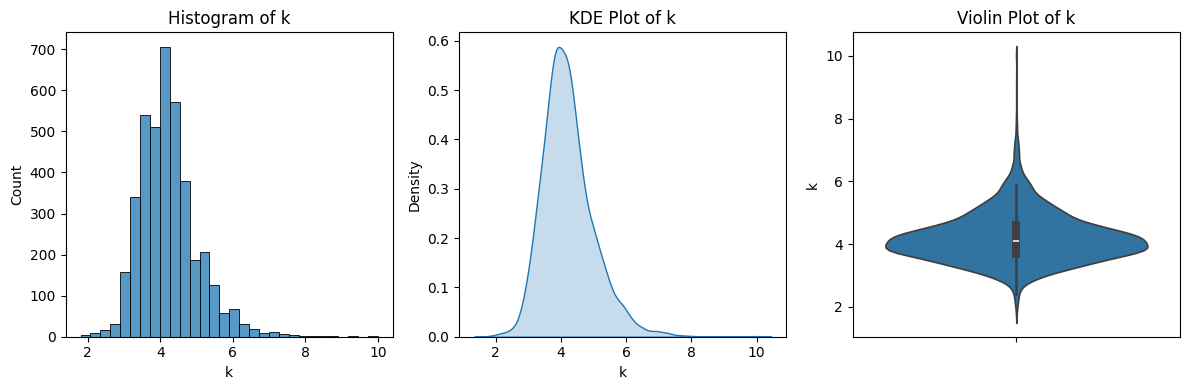

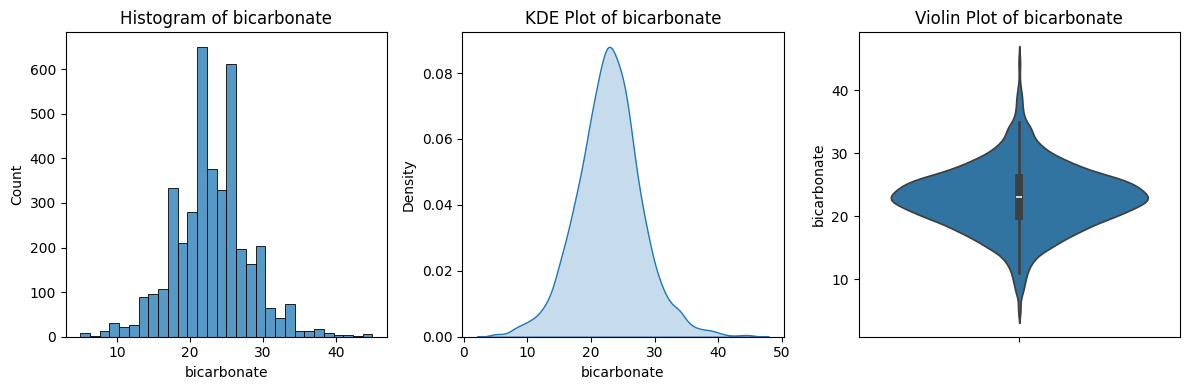

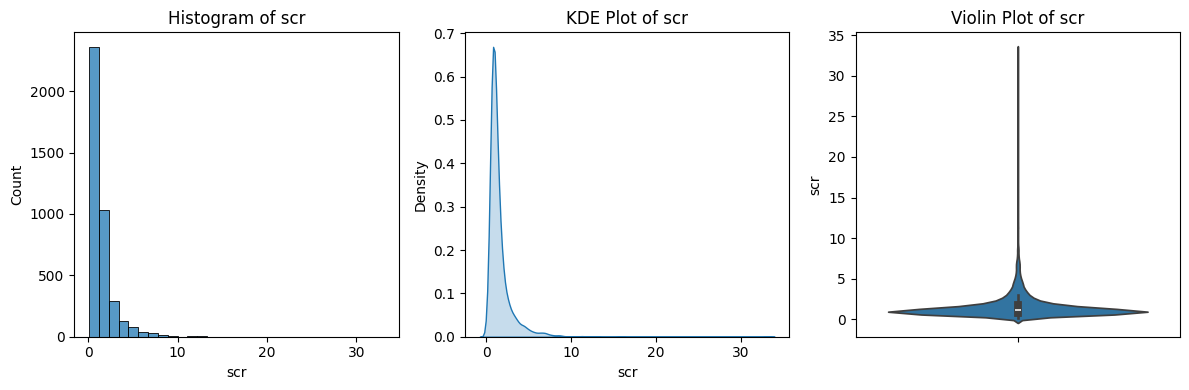

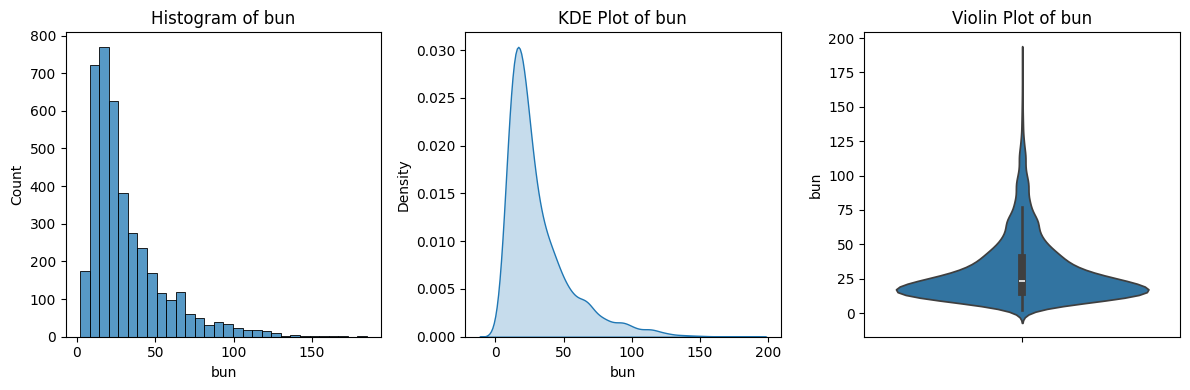

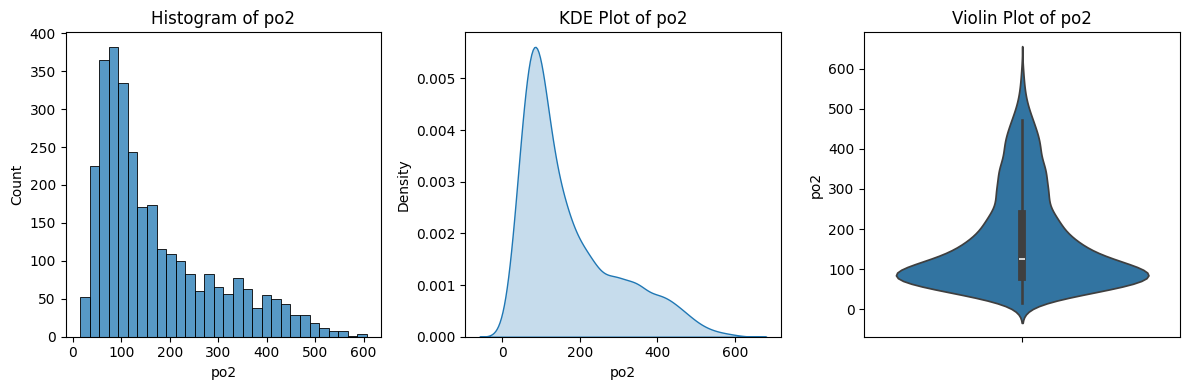

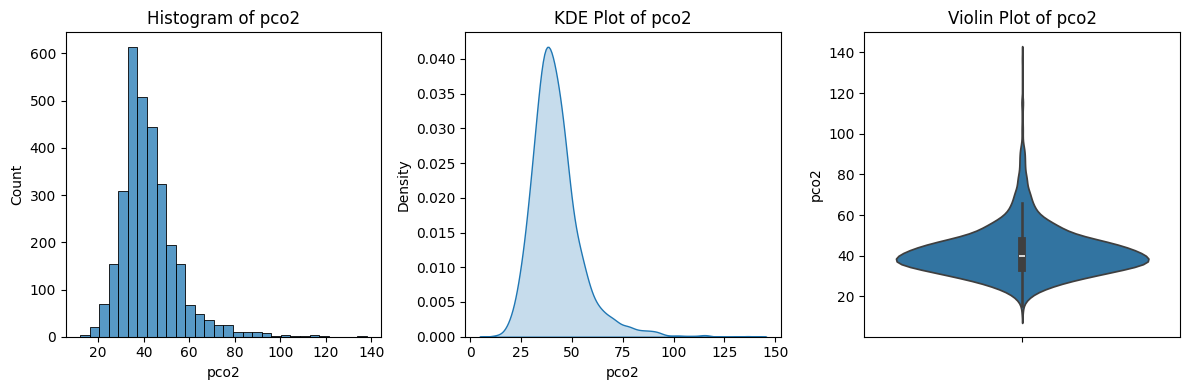

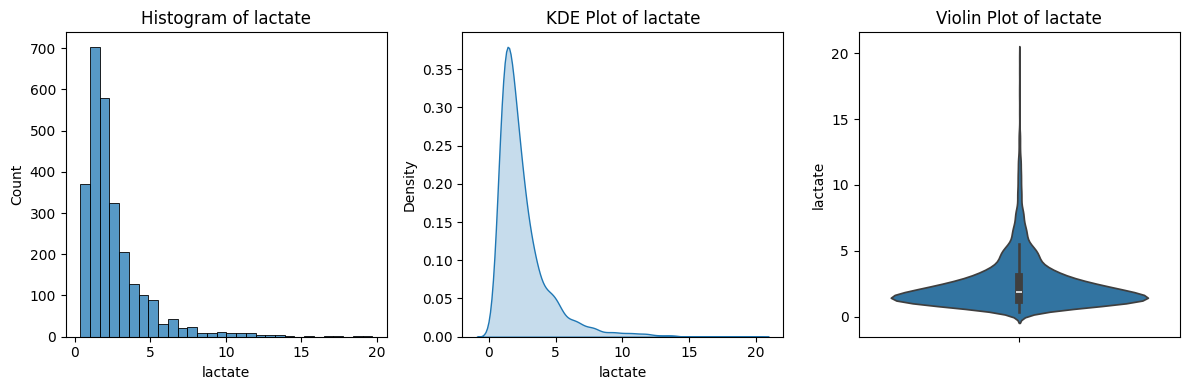

In [12]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
valid_numeric_cols = []
for col in numeric_cols:
    try:
        _ = sns.kdeplot(df2[col].dropna(), fill=True)
        valid_numeric_cols.append(col)
        plt.close()
    except:
        plt.close()

for col in valid_numeric_cols:
    plt.figure(figsize=(12, 4))

    
    plt.subplot(1, 3, 1)
    sns.histplot(df2[col].dropna(), kde=False, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 3, 2)
    sns.kdeplot(df2[col].dropna(), fill=True)
    plt.title(f'KDE Plot of {col}')

    plt.subplot(1, 3, 3)
    sns.violinplot(y=df2[col].dropna())
    plt.title(f'Violin Plot of {col}')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


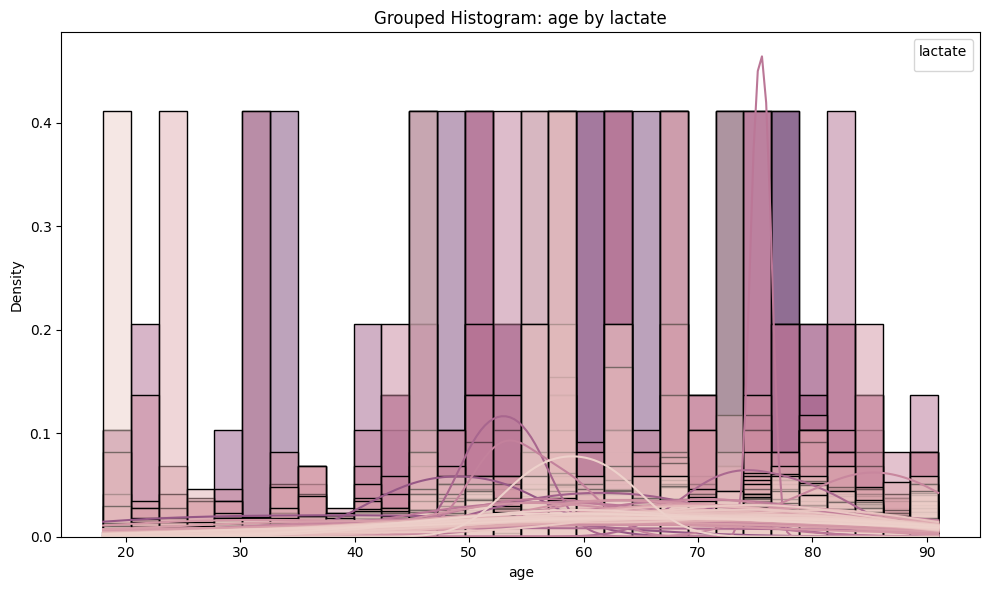

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


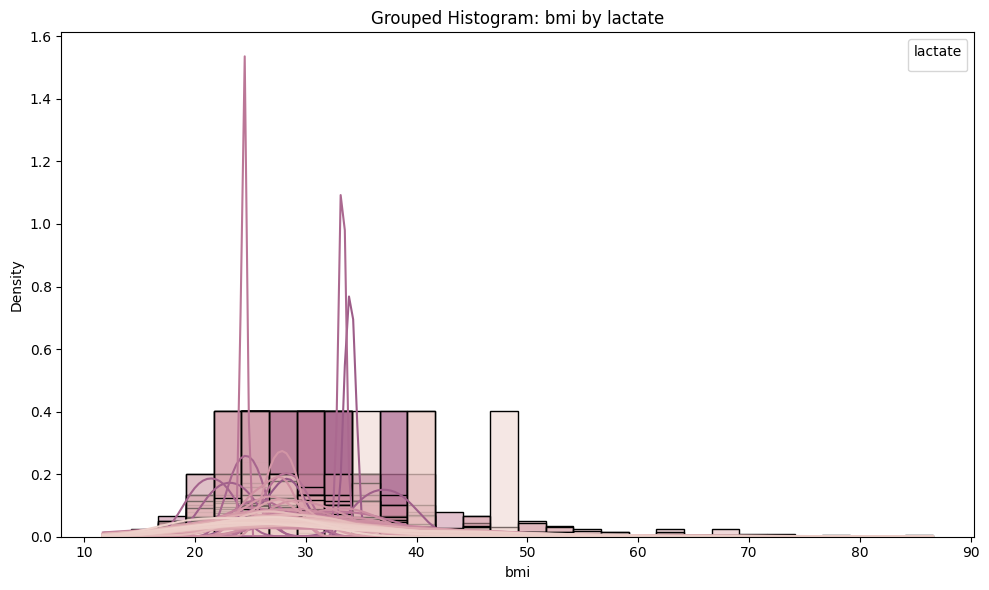

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


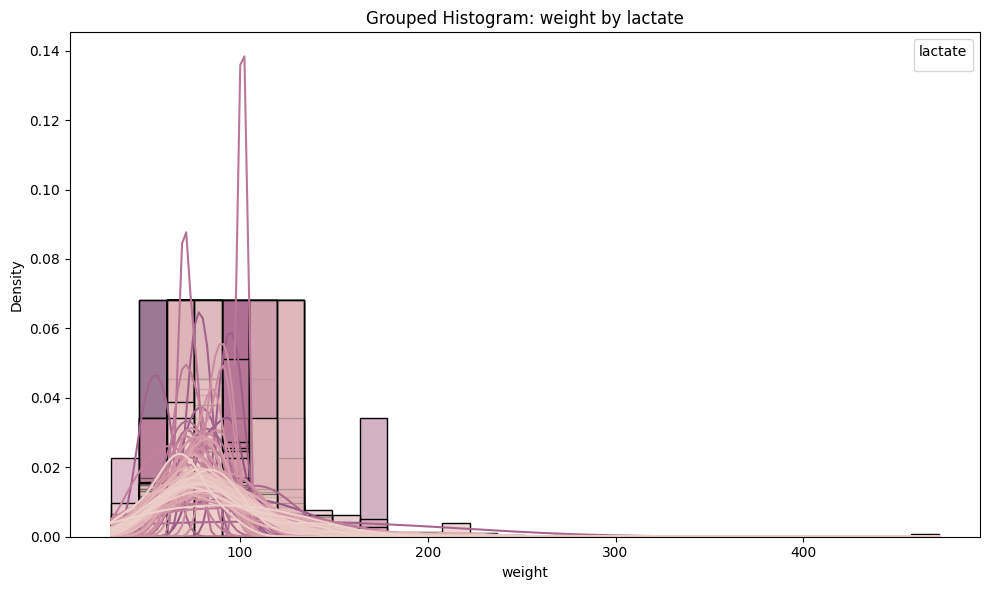

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


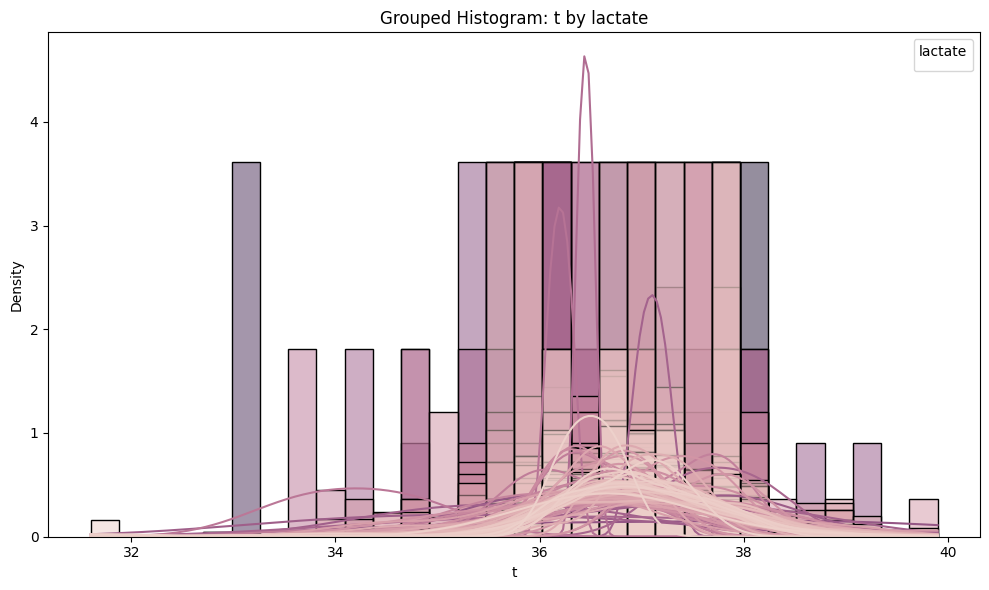

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


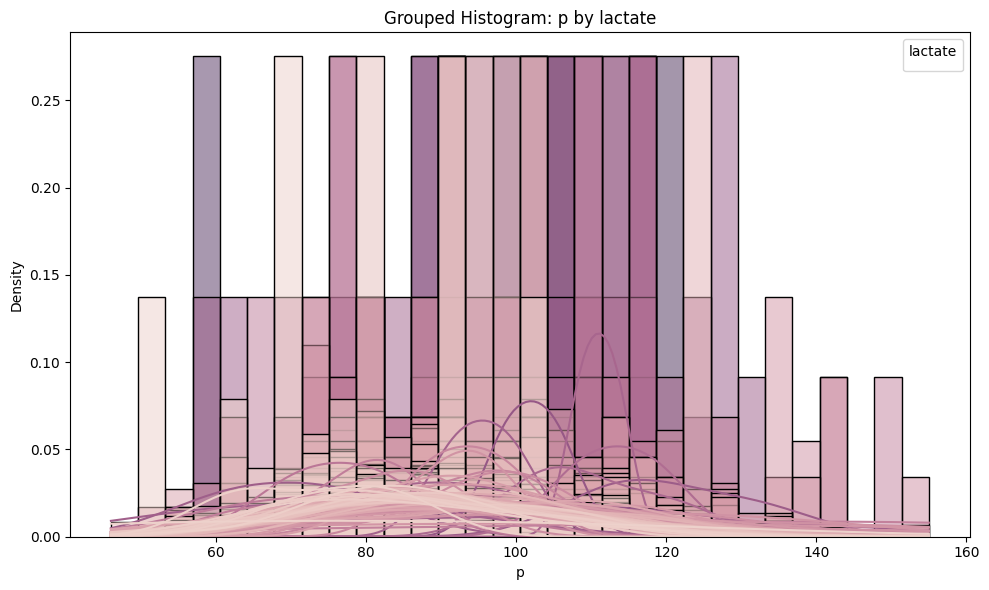

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


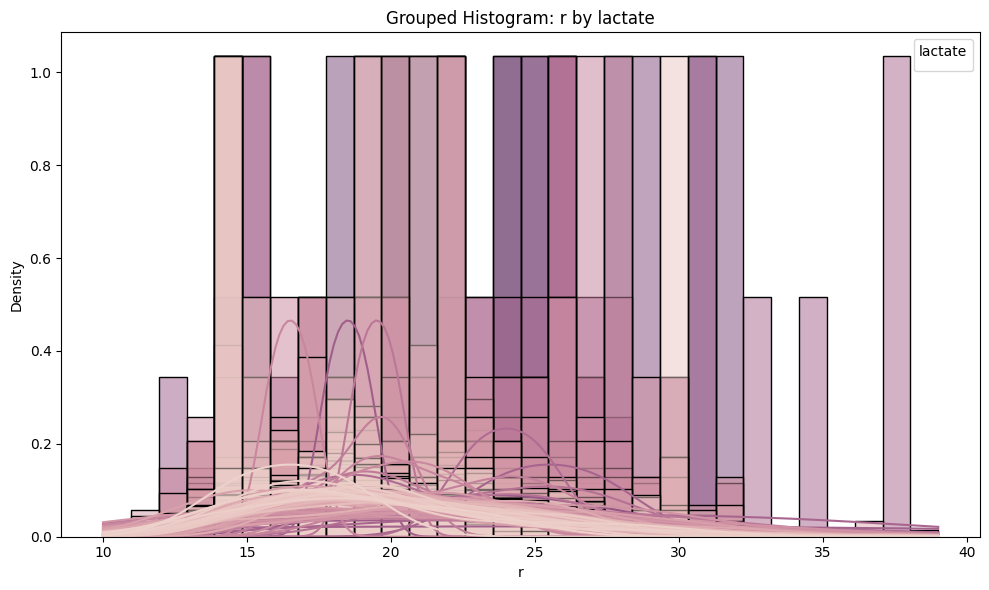

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


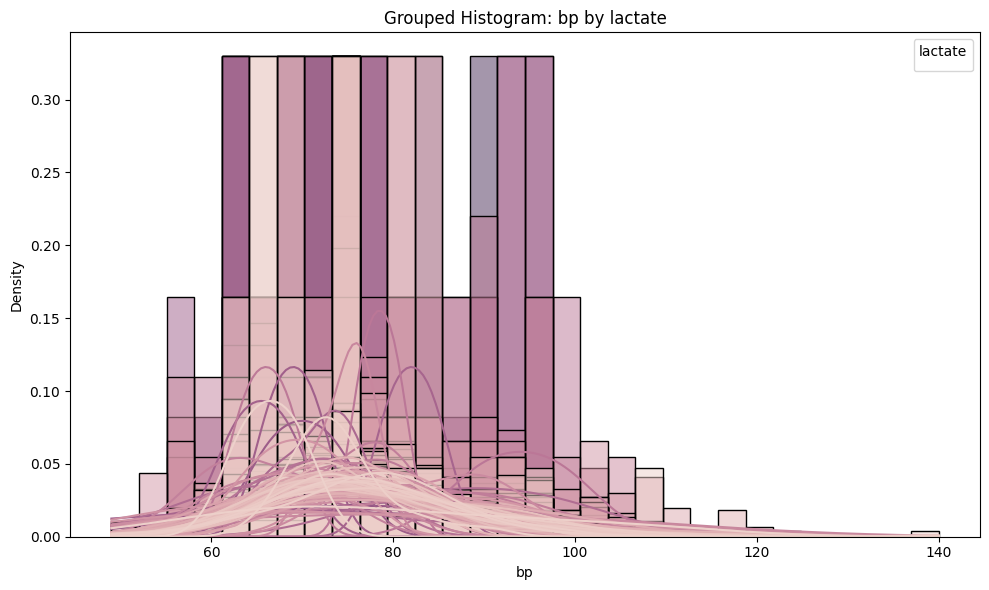

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


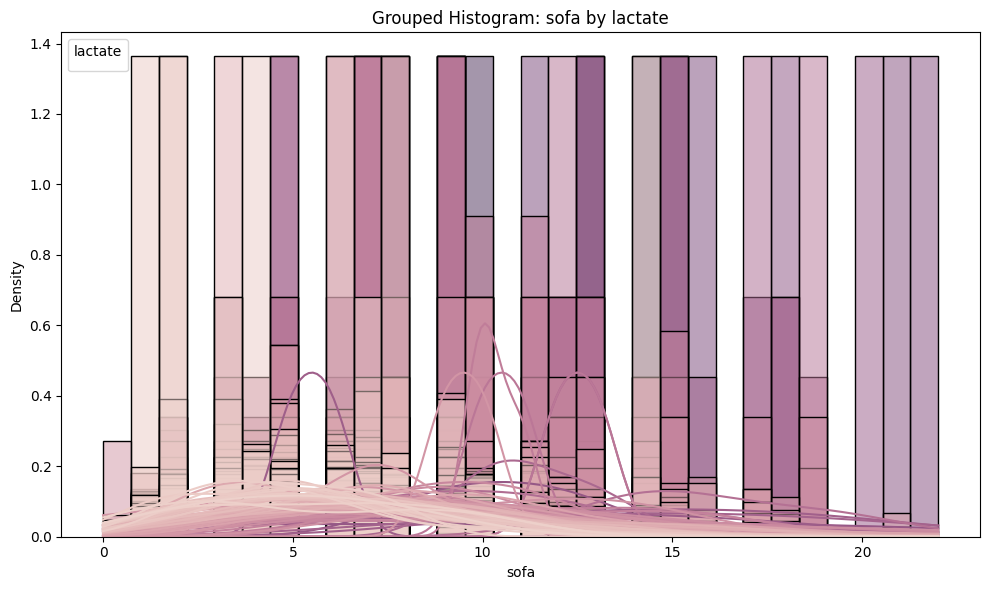

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


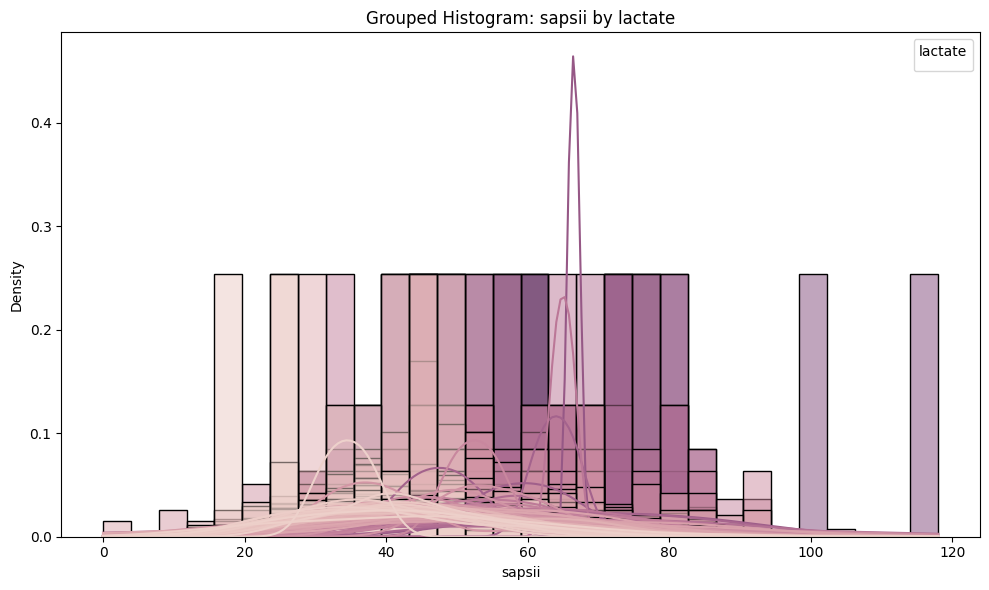

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


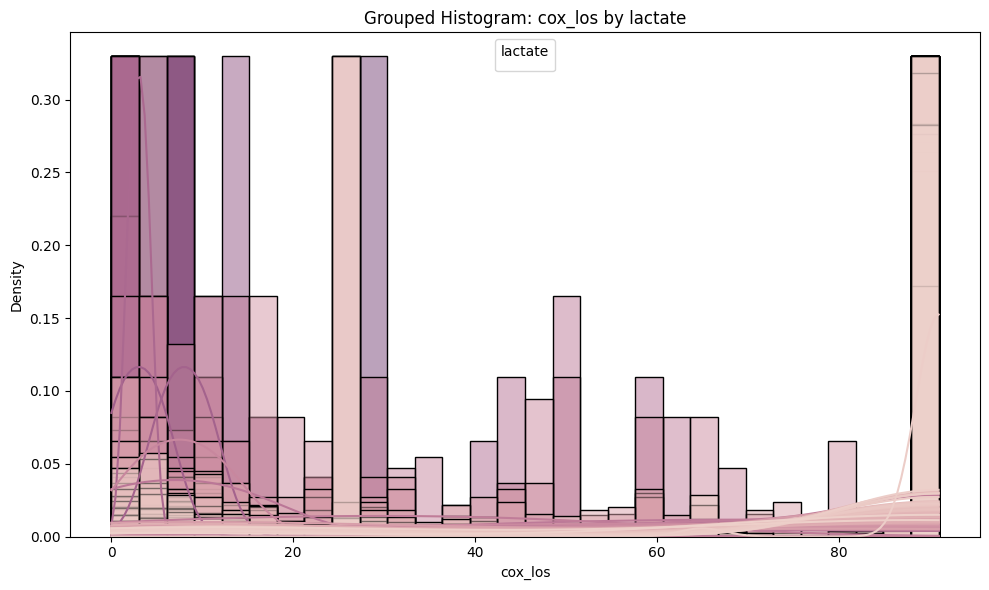

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


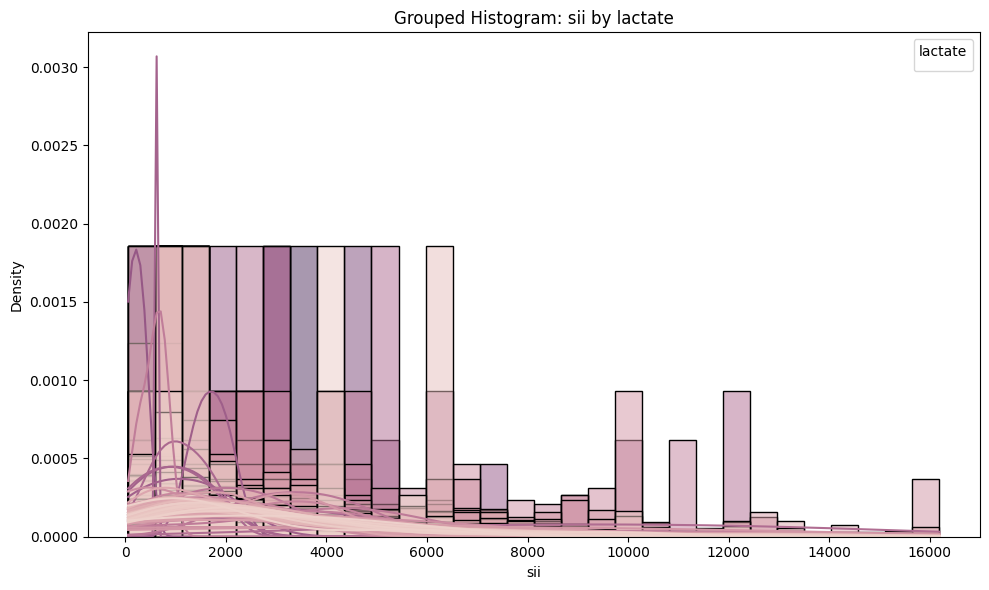

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


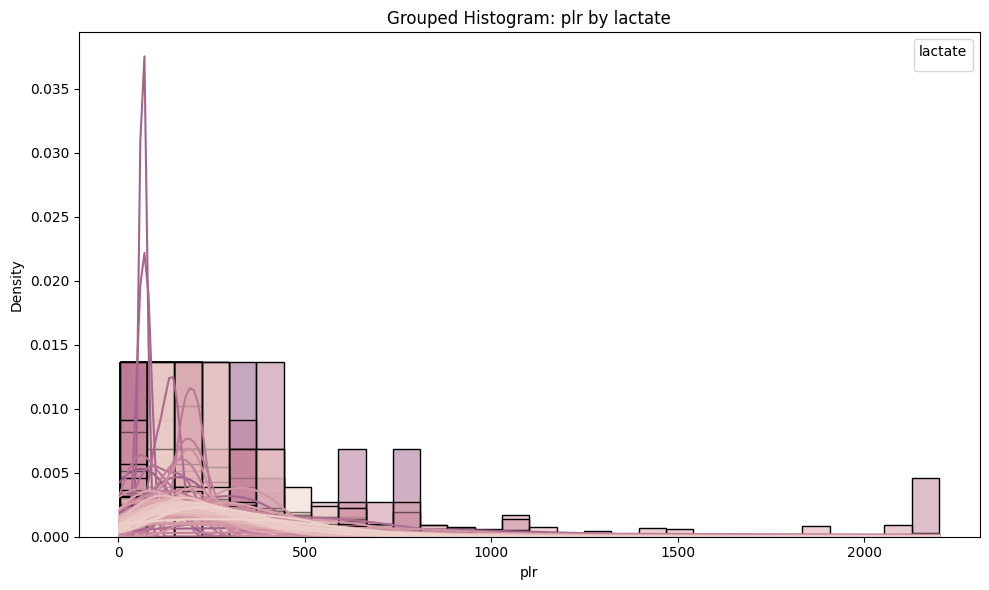

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


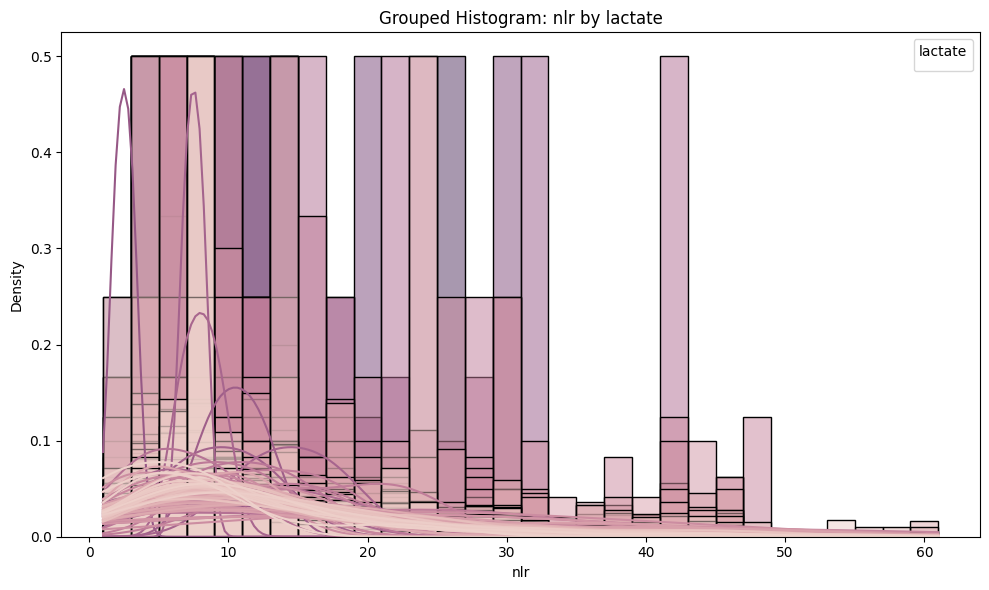

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


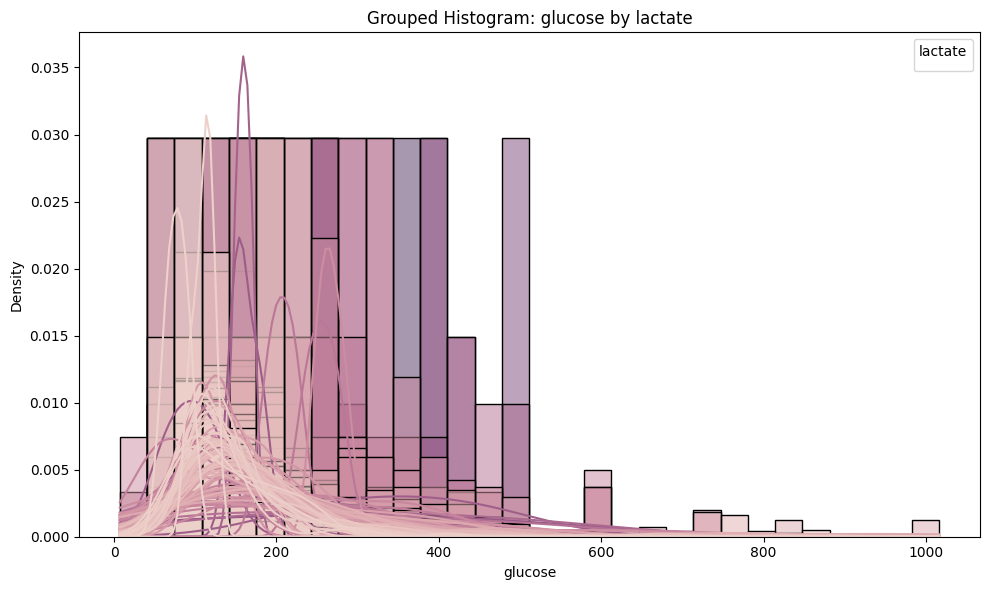

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


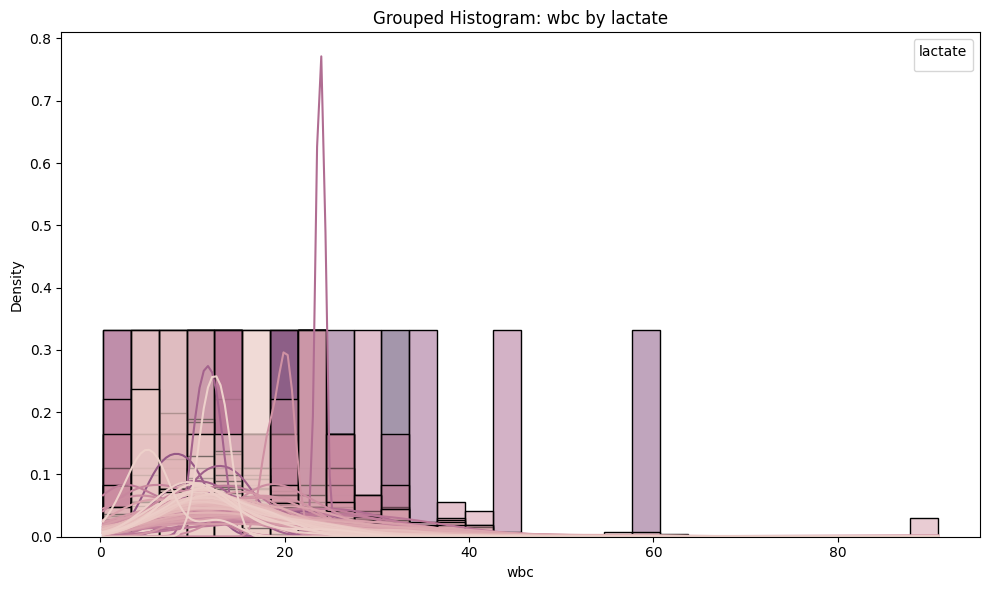

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


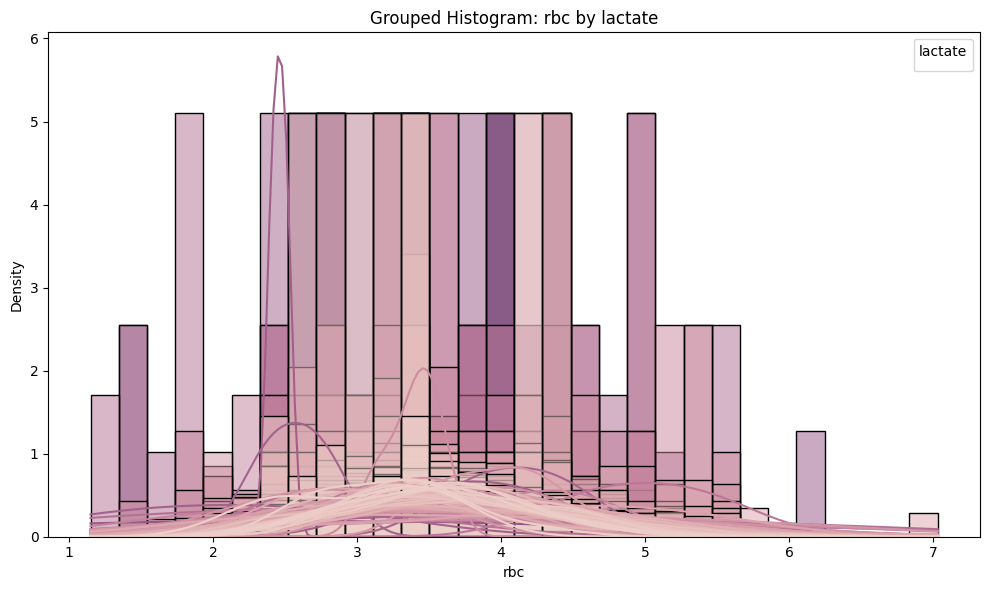

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


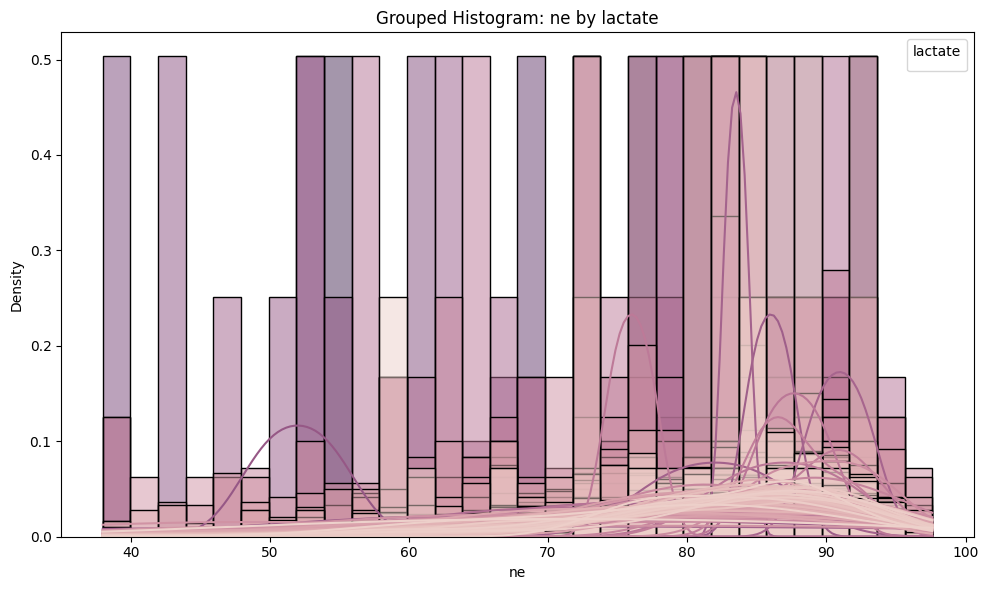

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


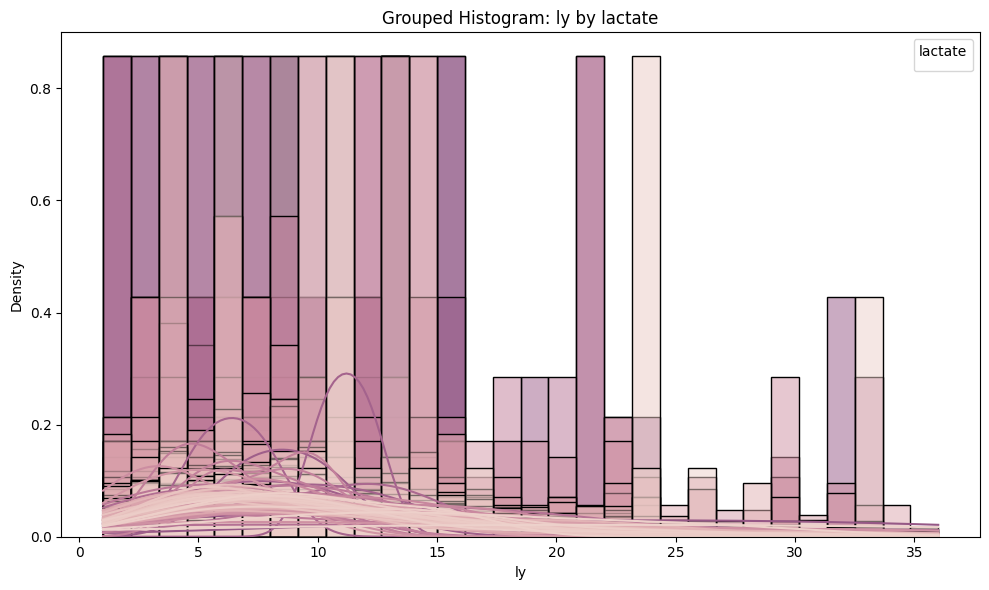

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


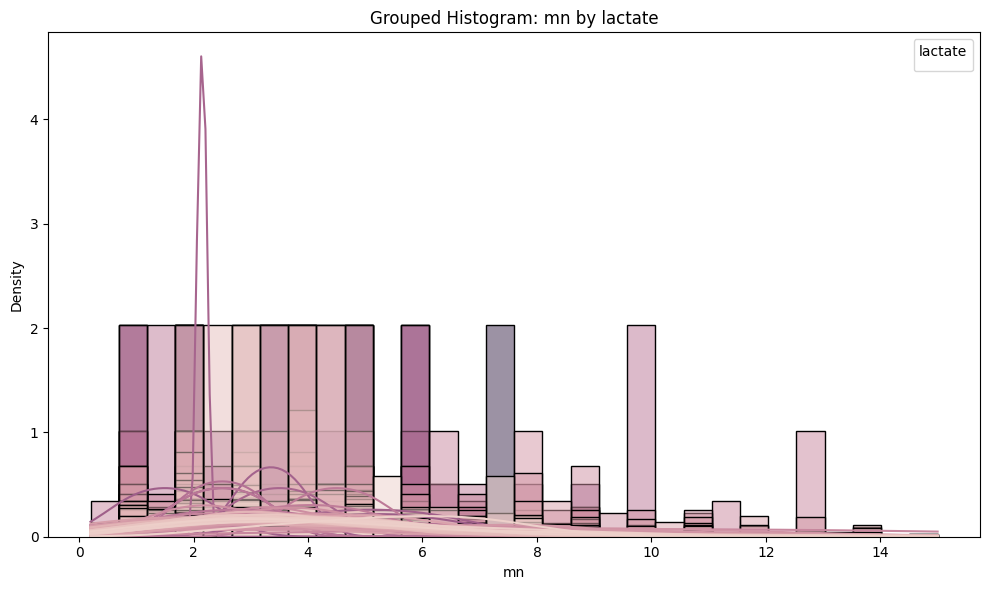

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


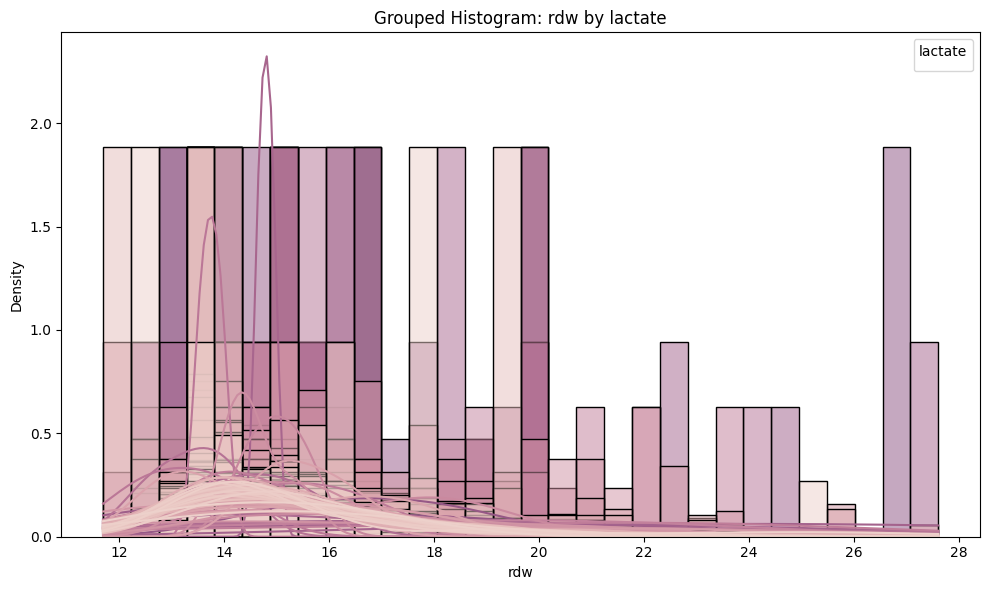

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


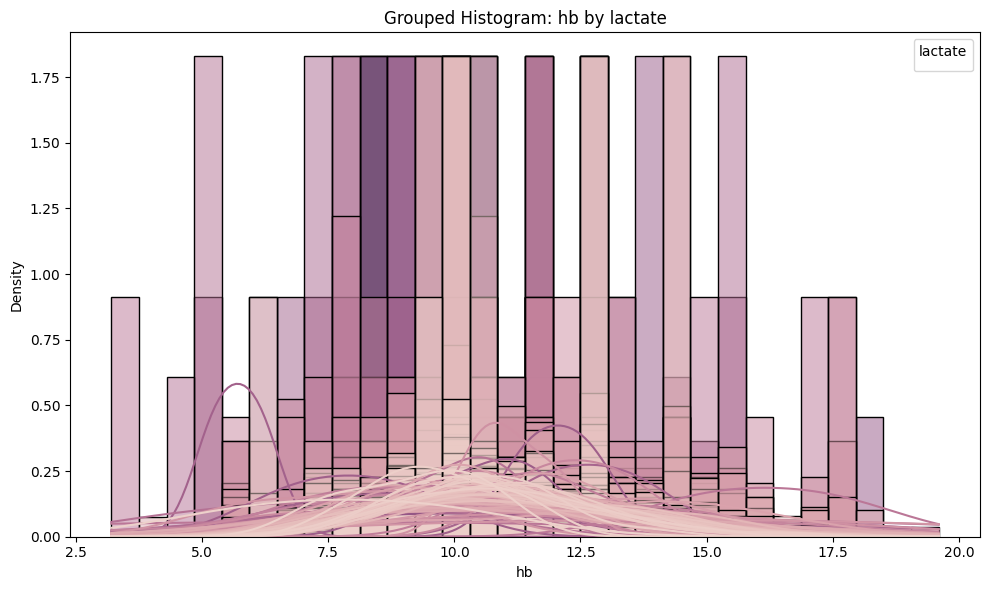

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


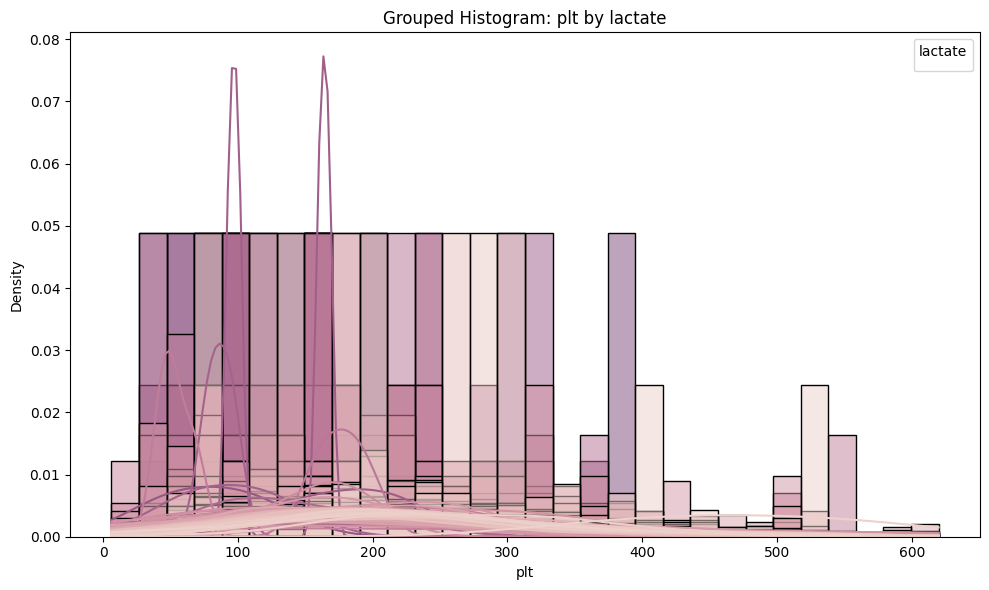

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


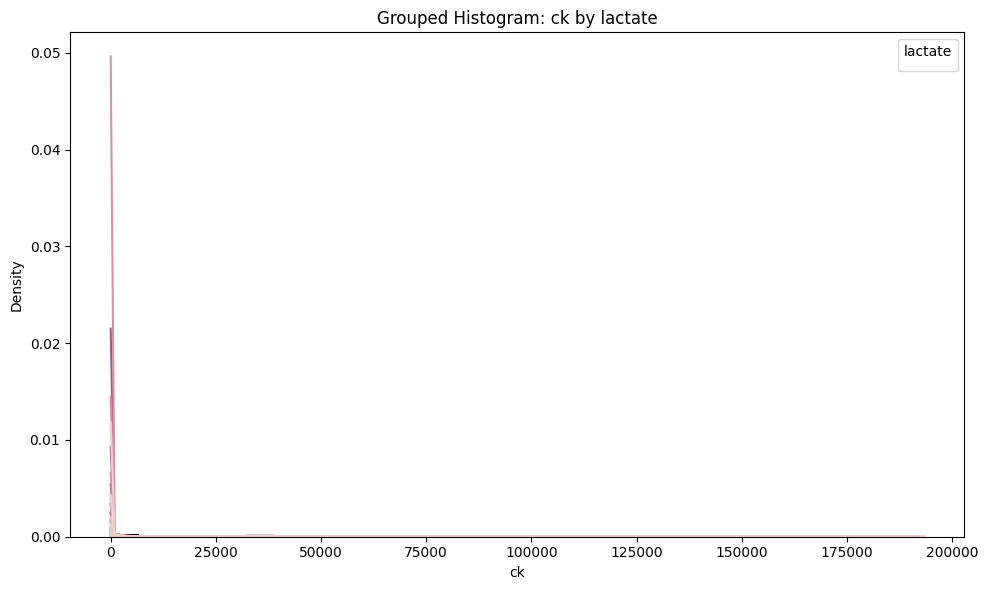

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


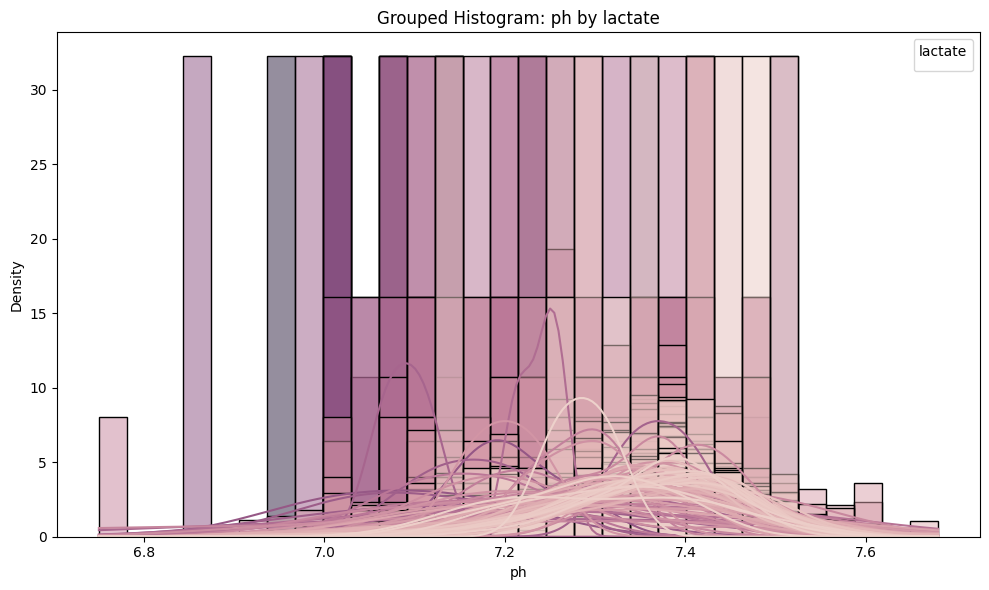

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


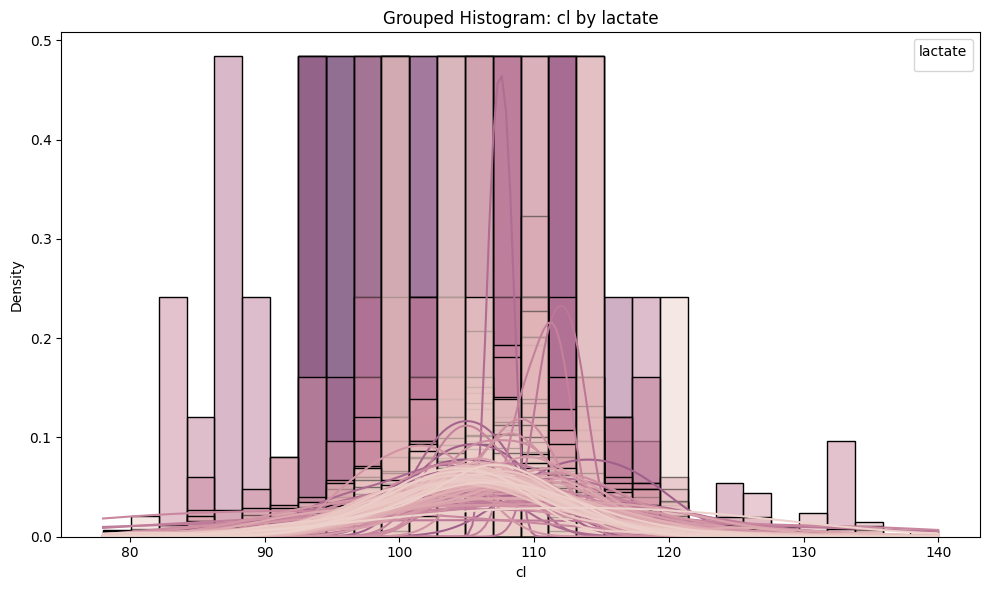

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


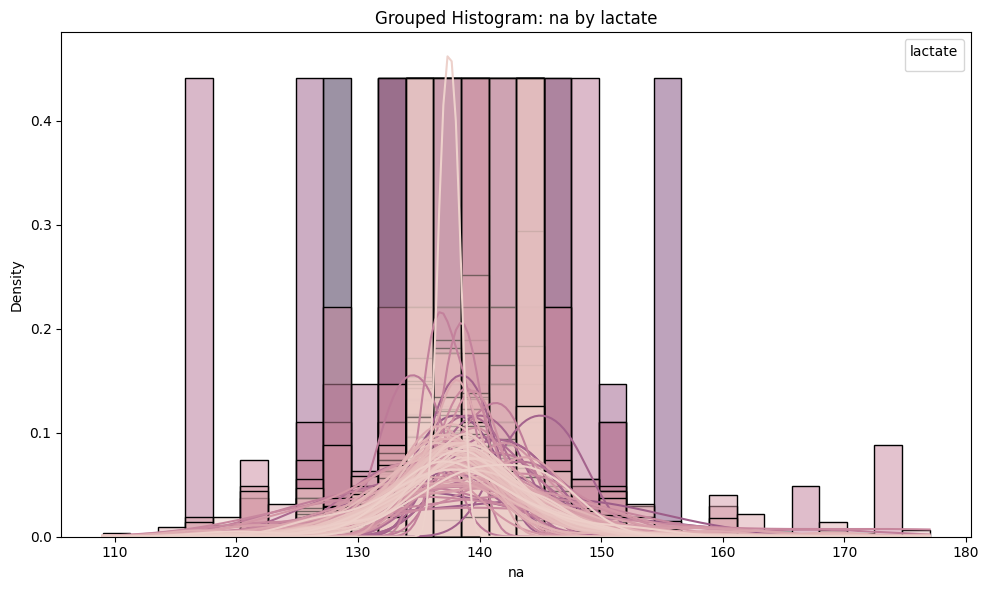

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


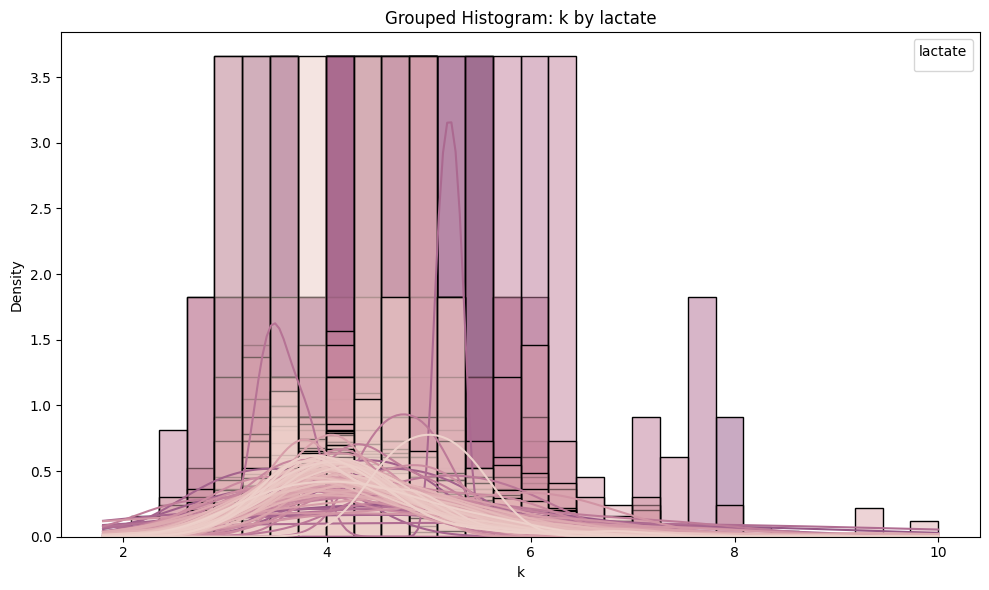

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


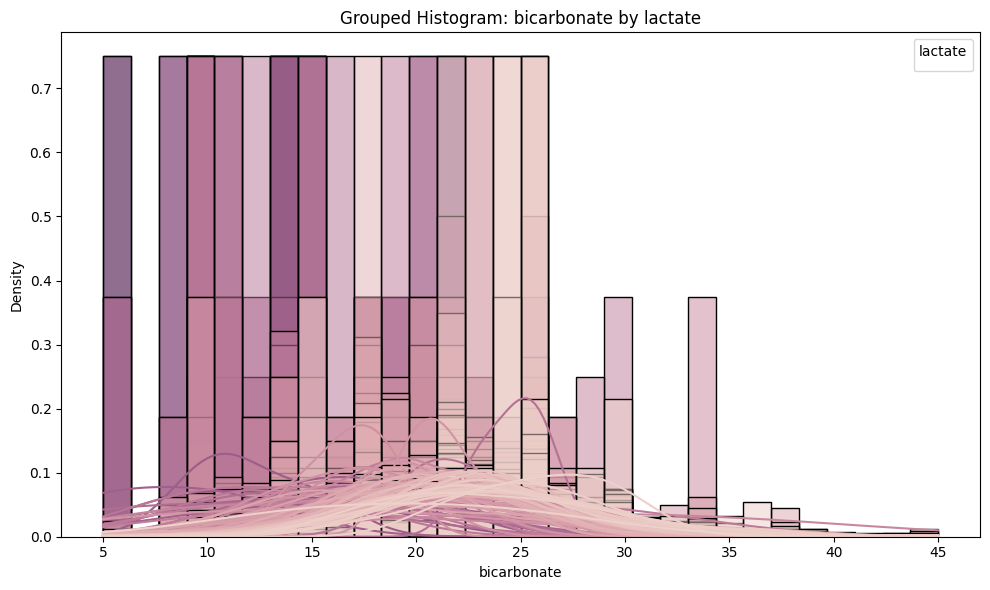

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


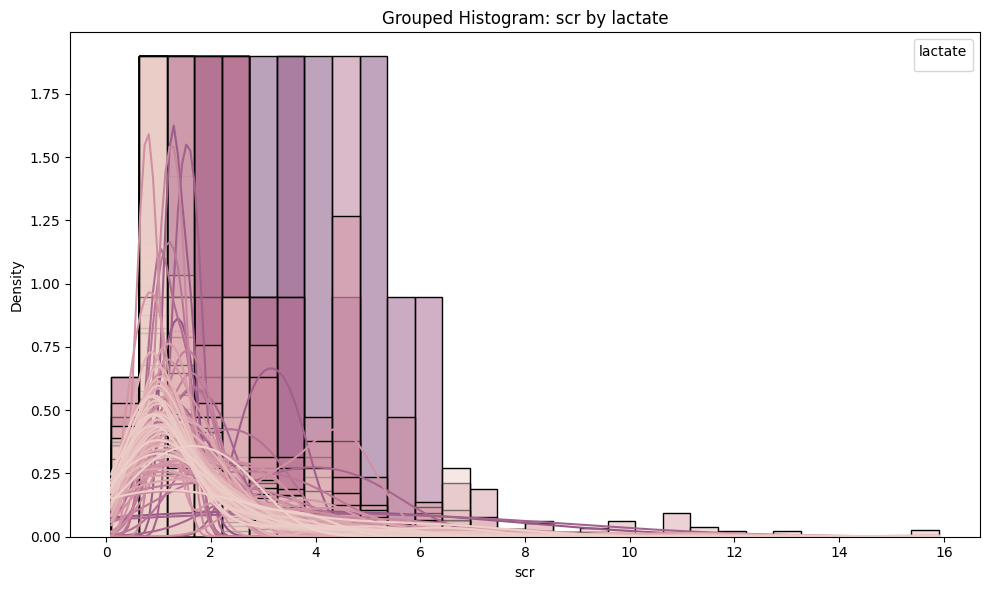

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


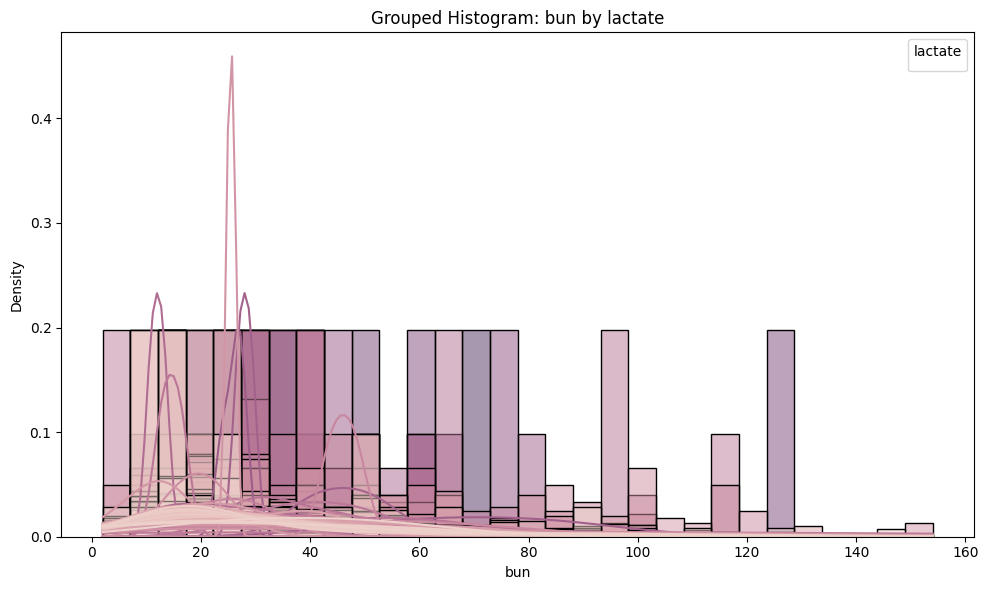

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


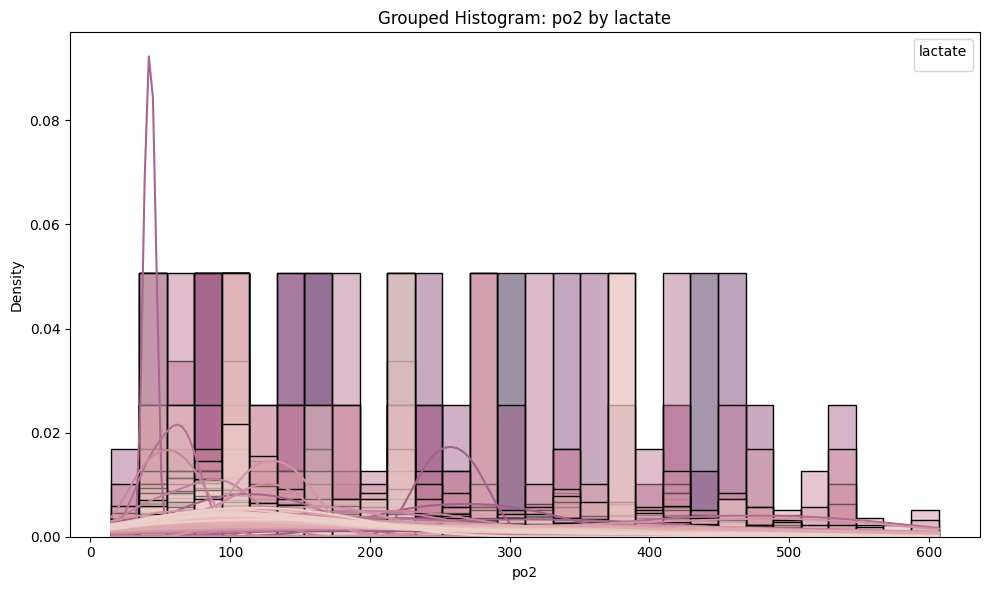

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


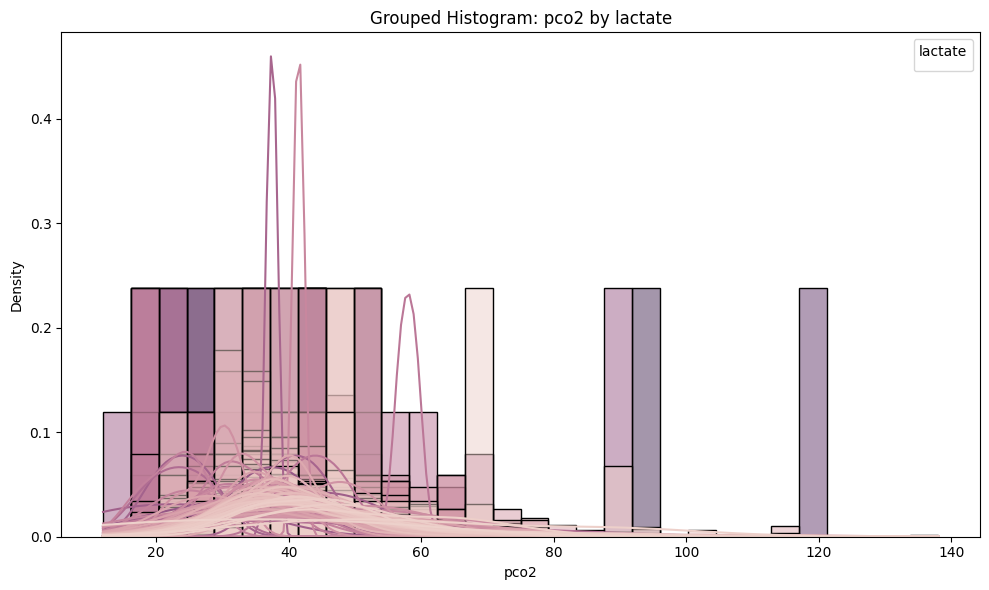

/tmp/ipykernel_50985/2602325940.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=group_col)


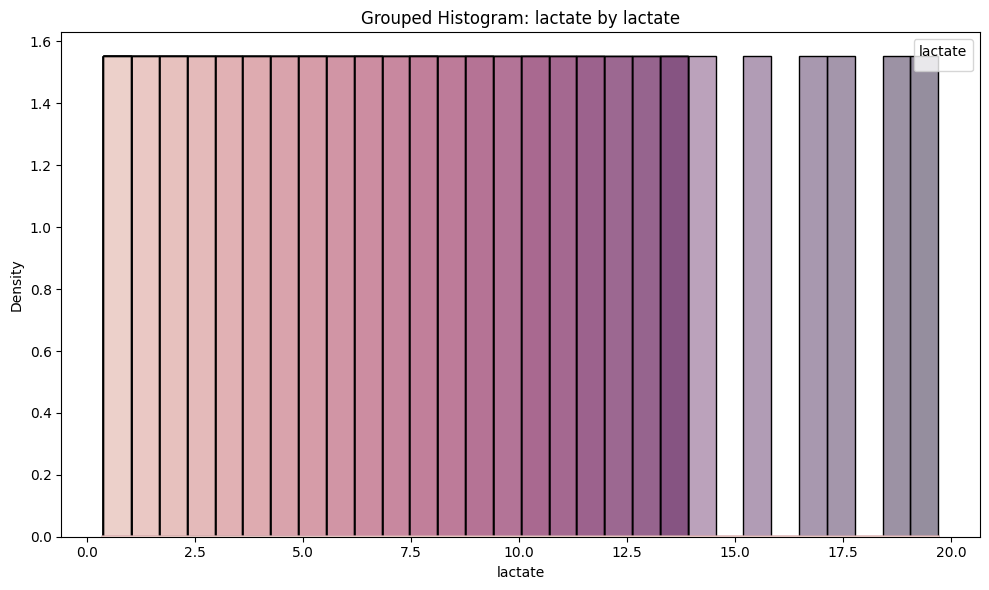

In [21]:
unique_counts = df2.nunique()
continuous_kidney = [col for col in df2.columns if unique_counts[col] > 10]

group_col = 'classification' if 'classification' in df2.columns else df2.columns[-1]

for col in continuous_kidney:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df2, x=col, hue=group_col, bins=30, kde=True, stat='density', common_norm=False)
    plt.title(f'Grouped Histogram: {col} by {group_col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title=group_col)
    plt.tight_layout()
    plt.show()

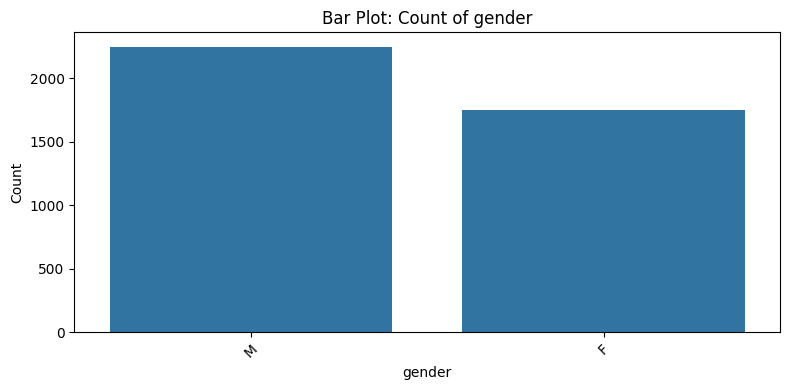

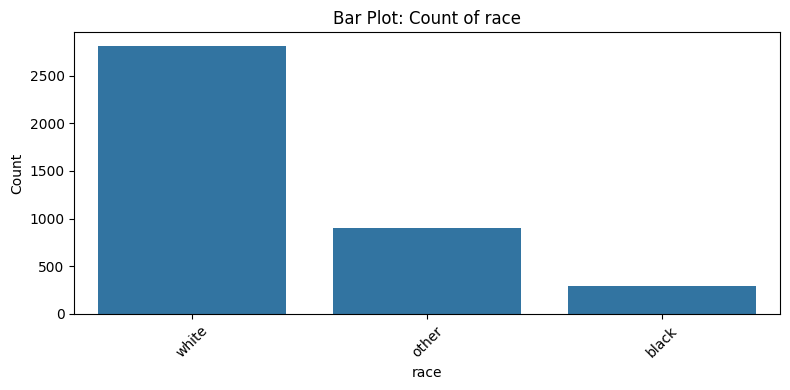

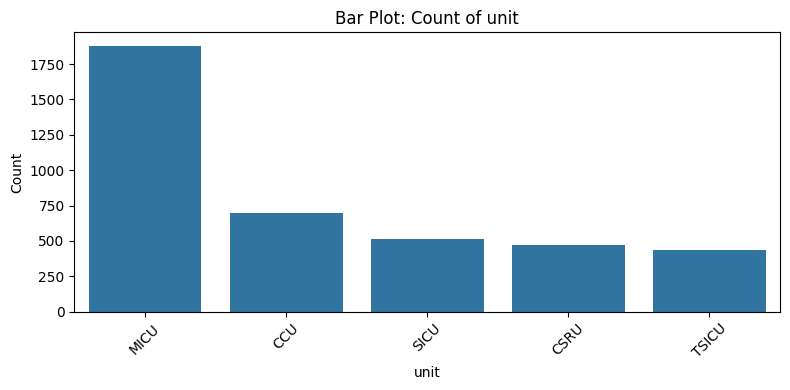

In [13]:
categorical_cols = df2.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df2, x=col, order=df2[col].value_counts().index)
    plt.title(f'Bar Plot: Count of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns

# Compute statistics
mean_values = df2[numeric_cols].mean()
median_values = df2[numeric_cols].median()
mode_values = df2[numeric_cols].mode().iloc[0]  # First mode if multiple

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Display the summary
print(summary_stats)

                      Mean   Median    Mode
age              65.109473    67.00   91.00
bmi              29.305210    27.70   24.20
weight           83.748270    80.00   80.00
t                36.896644    36.90   36.60
p                88.261881    87.00   84.00
r                19.814722    19.00   18.00
bp               77.420710    76.00   74.00
vent_firstday     0.609348     1.00    1.00
vaso_firstday     0.386403     0.00    0.00
chf               0.220195     0.00    0.00
ckd               0.141215     0.00    0.00
liver             0.079230     0.00    0.00
pulmonary         0.201950     0.00    0.00
hypertension      0.119470     0.00    0.00
malignancy        0.161460     0.00    0.00
stroke            0.089978     0.00    0.00
cad               0.255186     0.00    0.00
diabetes          0.281680     0.00    0.00
hiv               0.003249     0.00    0.00
anemia            0.227693     0.00    0.00
drug_abuse        0.038240     0.00    0.00
alcohol_abuse     0.085479     0

Are the Data What You Expect? Are They Usable?
Yes, the dataset appears structured, medically relevant, and usable for further analysis or modeling because it has: 
Demographics (age, gender, race), Lab results (creatinine, WBC, etc.), Vitals and clinical scores (SOFA, SAPS II), Outcomes (28-day, 90-day, 1-year mortality)

Overall Shape of Distributions
Right-skewed (positively skewed):

bmi, weight, glucose, bun, creatinine (scr), and lactate have long tails.

This is typical for medical/lab data where extreme values indicate critical illness.

Near-normal:

Variables like age, platelets (plt), wbc, and hb show approximately symmetric or bell-shaped distributions.

Uniform-like:

Some integer-based diagnostic indicators (e.g., aki_stage, sofa, sapsii) may show blocky or flat distributions depending on clinical grouping.

 Are There Any Outliers?
Yes, visible in:

Creatinine (scr): values exceeding 10 mg/dL (possible but extreme renal failure)

Lactate: spikes above 10 mmol/L suggest sepsis/shock

BUN, glucose, and SOFA/SAPSII scores also show long upper tails

These outliers are expected in critically ill patients and should be kept unless shown to be erroneous.

 Distribution Changes Across Groups

Age or AKI stage vs. mortality: Older or stage 3 patients likely have higher mortality.

Lactate levels by unit (MICU vs. CCU): MICU patients may show more metabolic acidosis.

BMI vs. unit: Surgical ICU units may have lower BMI ranges than medical units.



Min & Max Values in Histograms
Age: min ~20, max ~95

SOFA: min = 0, max ~24

Creatinine: min ~0.3, max ~20

Lactate: min ~0.5, max >15
Most values fall within clinical norms, but long tails exist and are medically plausible.


Effect of Bin Size on Histograms
Small bin widths reveal fine-grained structure, like modality or spikes (e.g., most BMI values cluster in 20–30).

Large bin widths smooth the data but may hide critical peaks/outliers.

For clinical modeling, medium bin widths often balance detail and interpretability.


Normality of Distributions
Most variables do not follow a perfect normal distribution. Instead, the data include:

Skewed (most labs and vitals)

Multimodal or clipped (e.g., AKI stages: only 0–3)

Uniform or blocky (comorbidity indicators like diabetes, chf)

Thus, non-parametric tests or transformations (log, rank) may be more appropriate.


Final Conclusion
The dataset is medically plausible and very usable for survival analysis, classification models, and clinical risk scoring. We need to handle missing values and consider skewness and outliers in your modeling approach.


In [15]:
url = "https://raw.githubusercontent.com/muathdb/OMDS-Week2-Abusamreh-Muath-/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv"
df1 = pd.read_csv(url)

In [16]:
df1.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

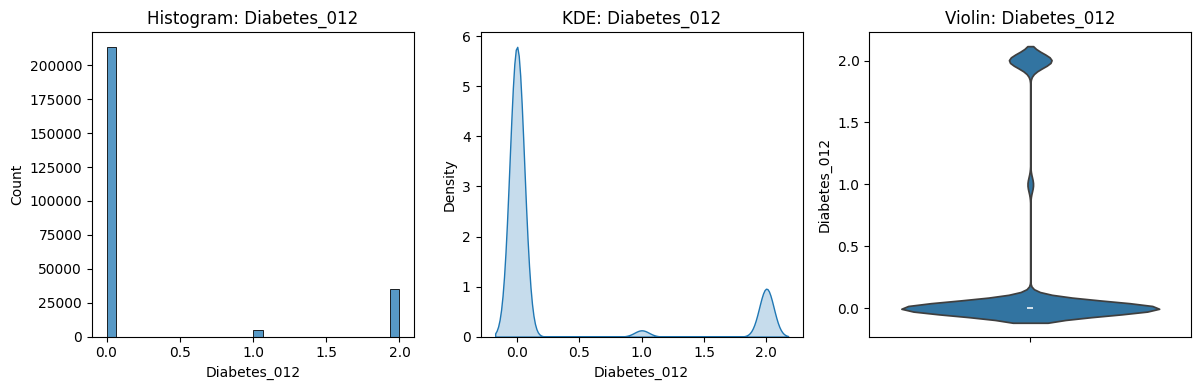

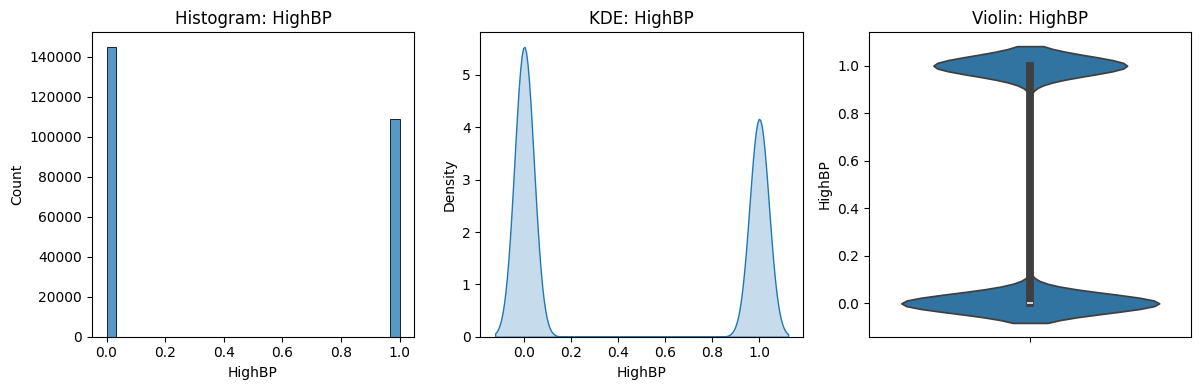

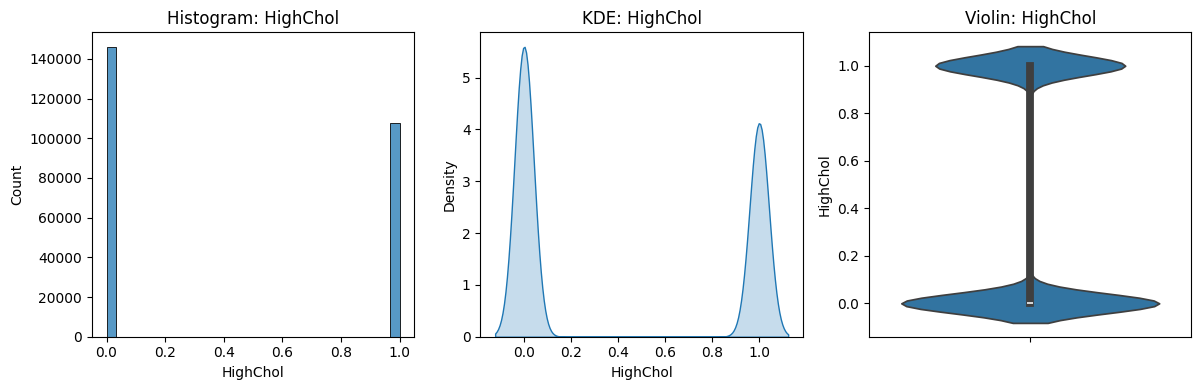

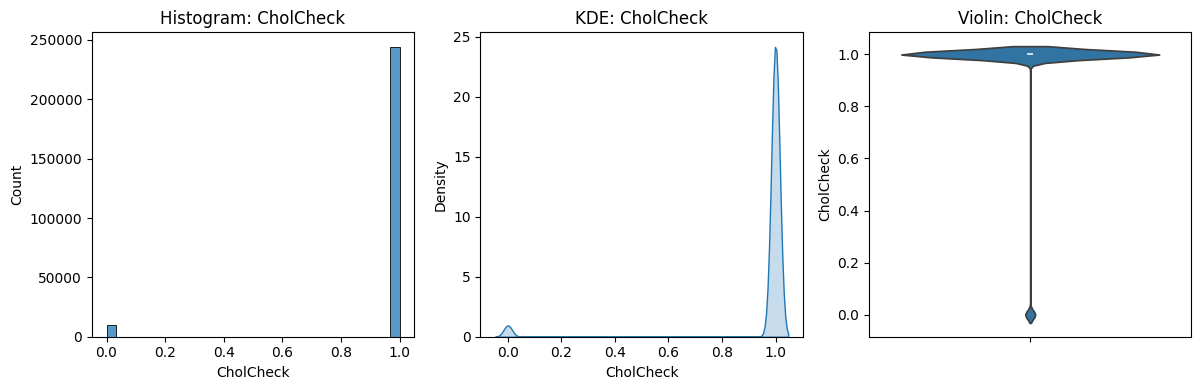

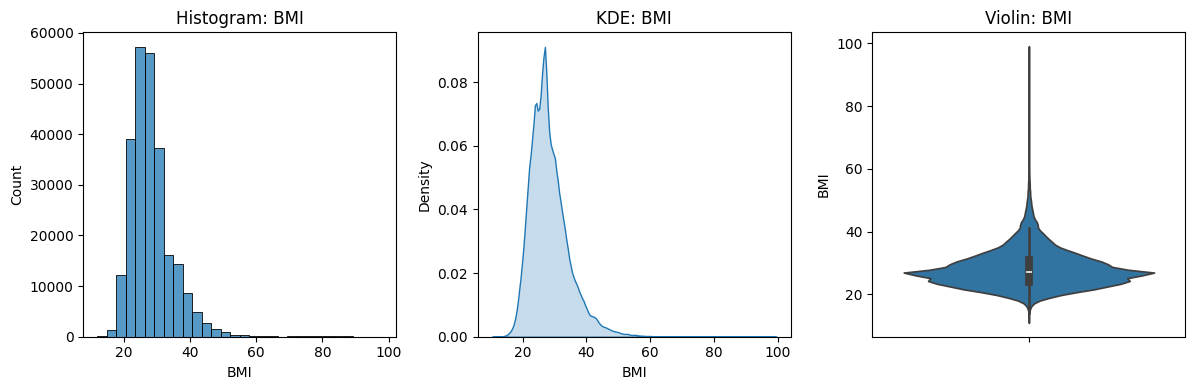

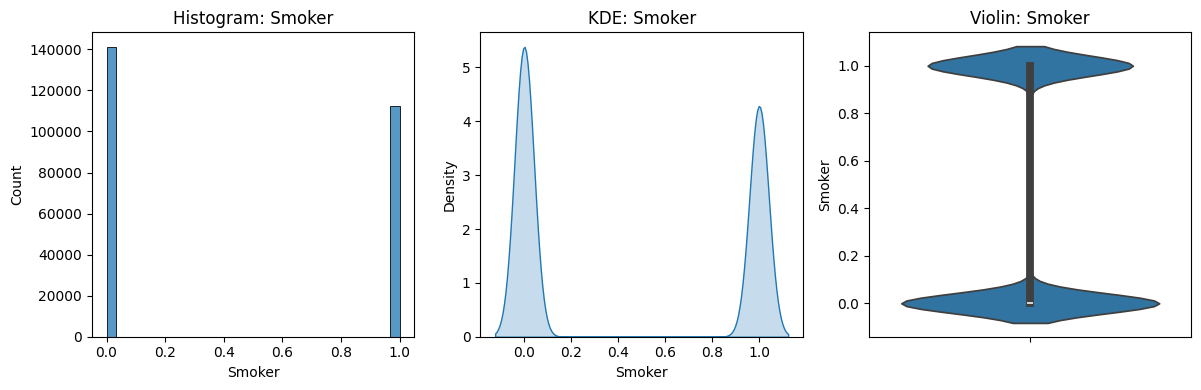

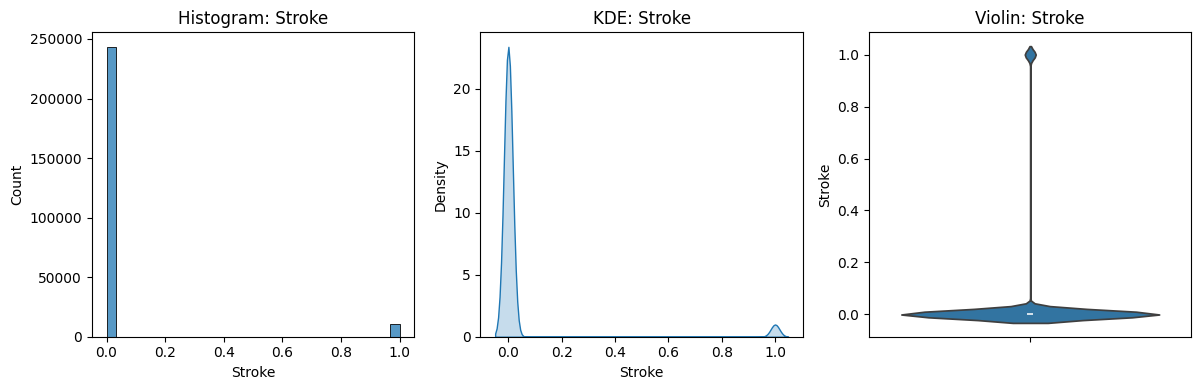

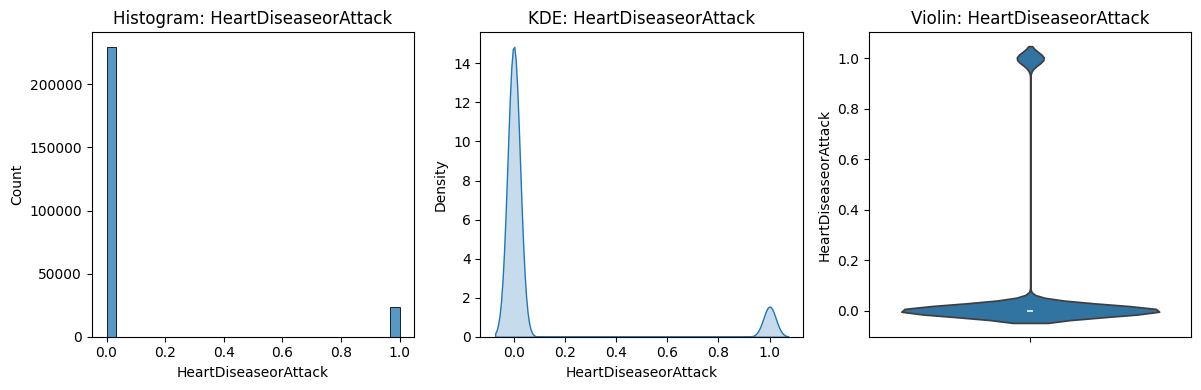

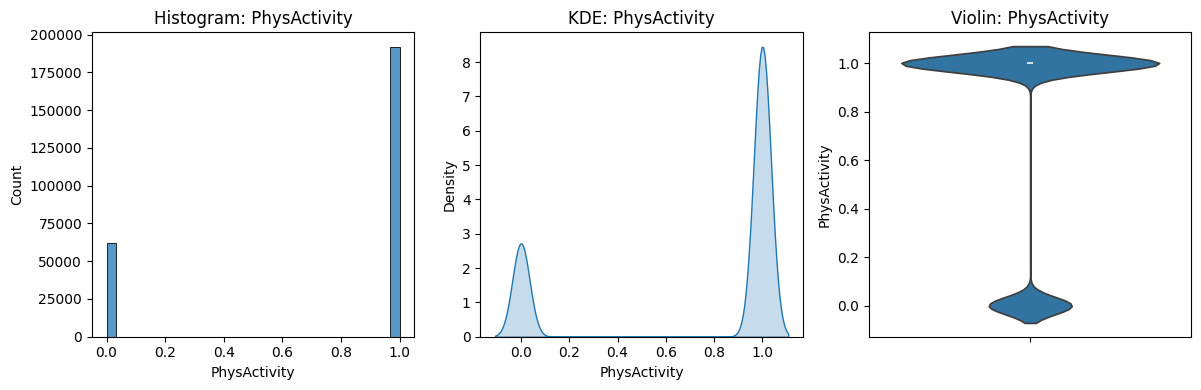

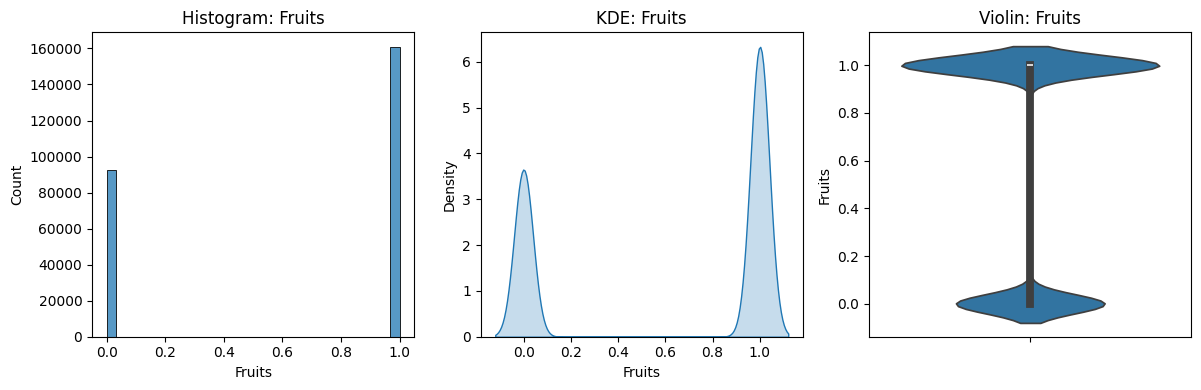

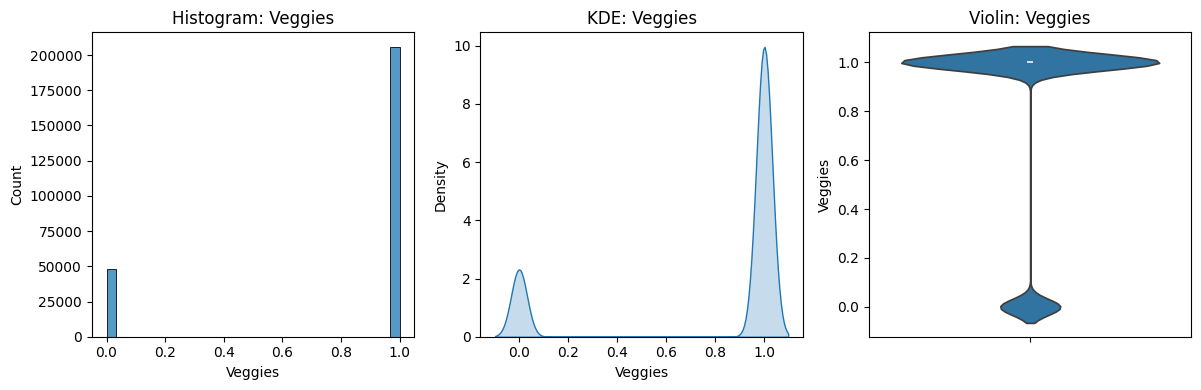

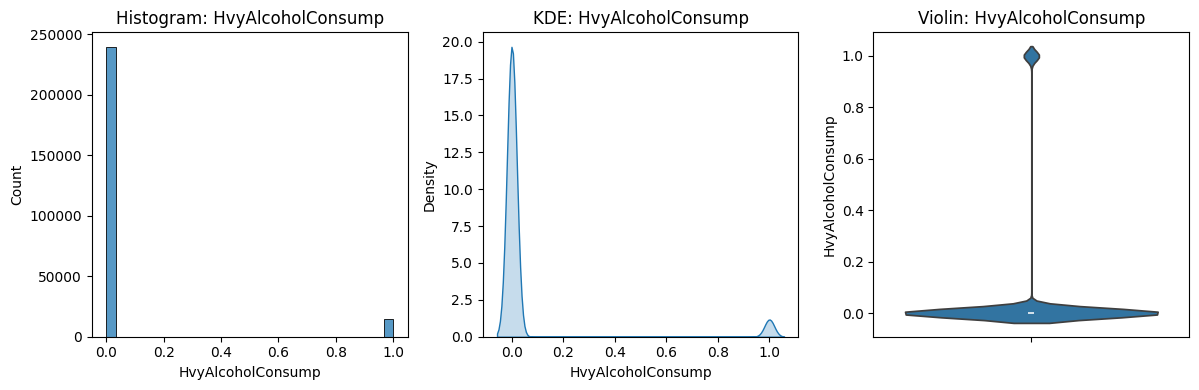

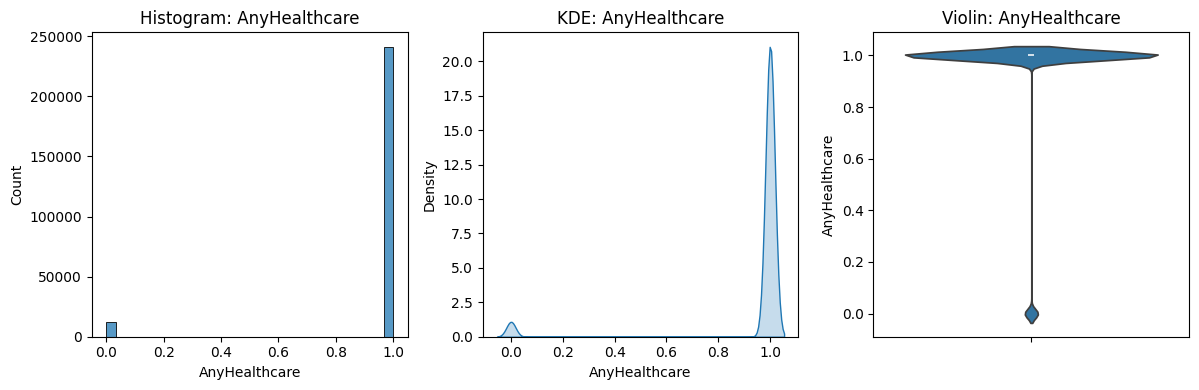

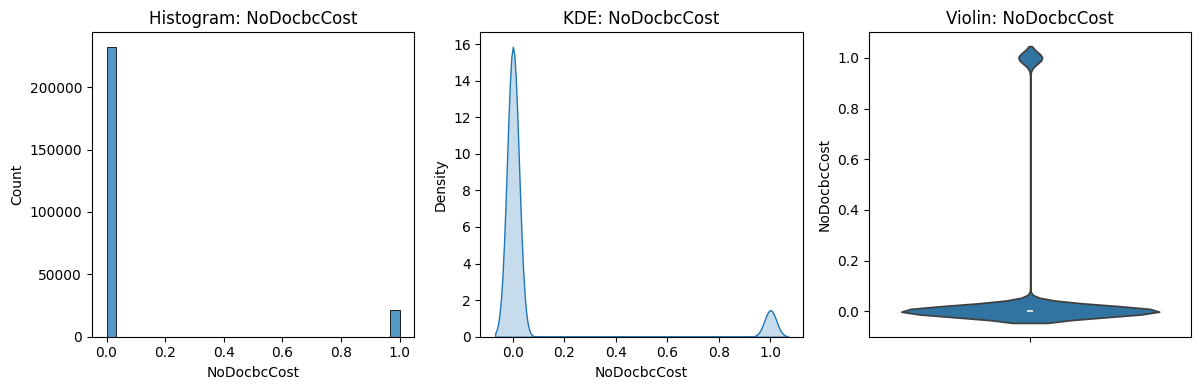

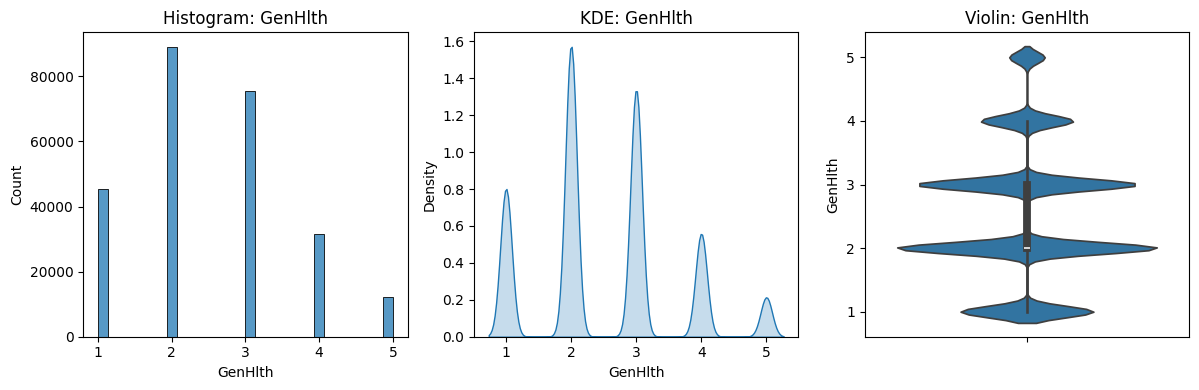

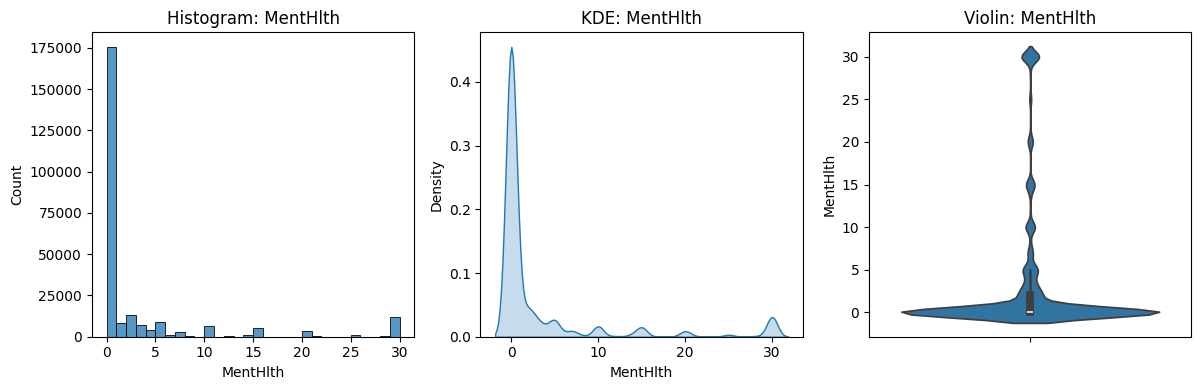

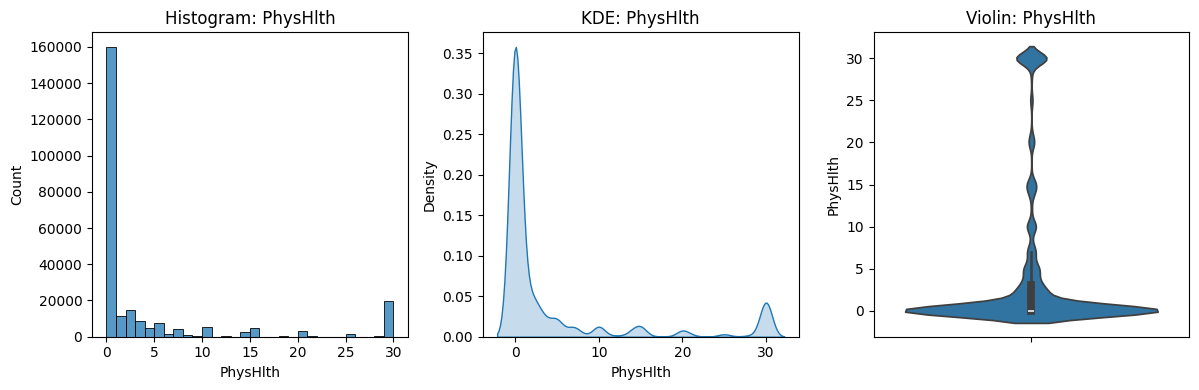

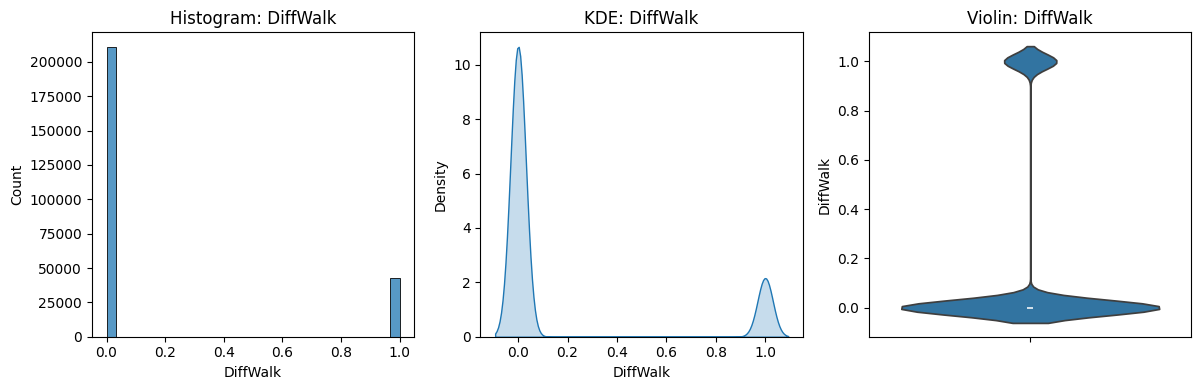

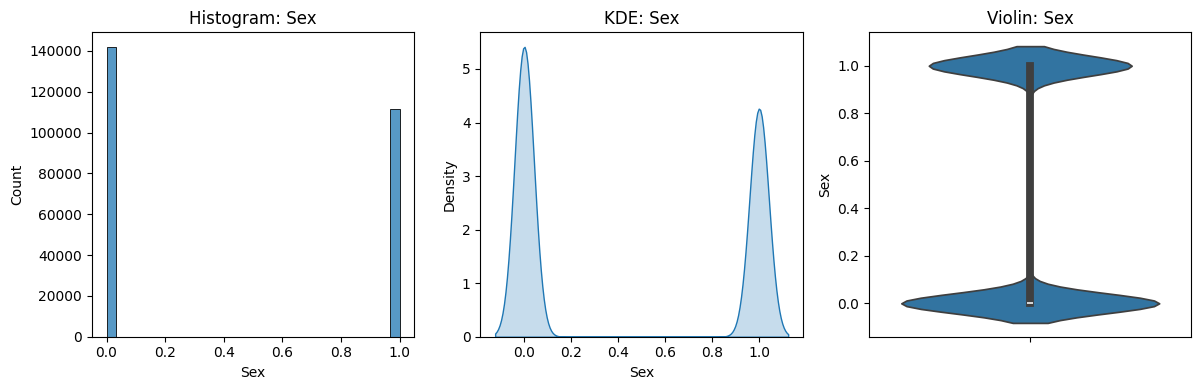

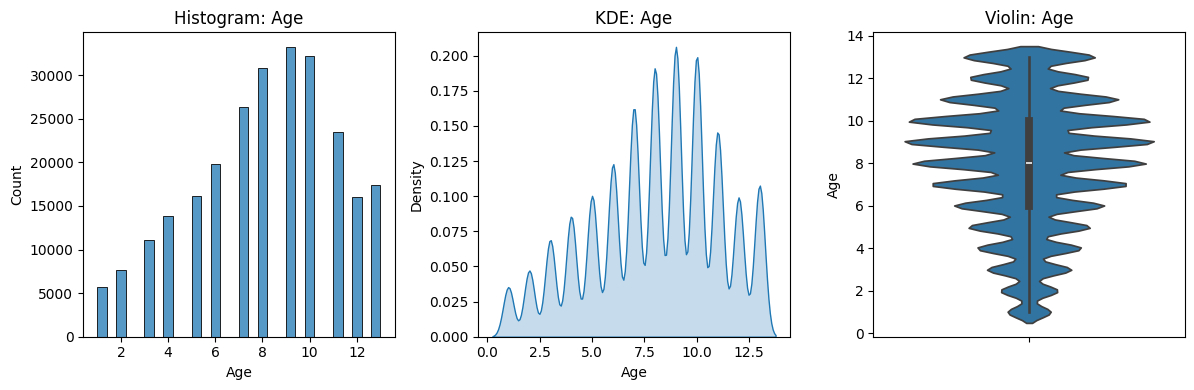

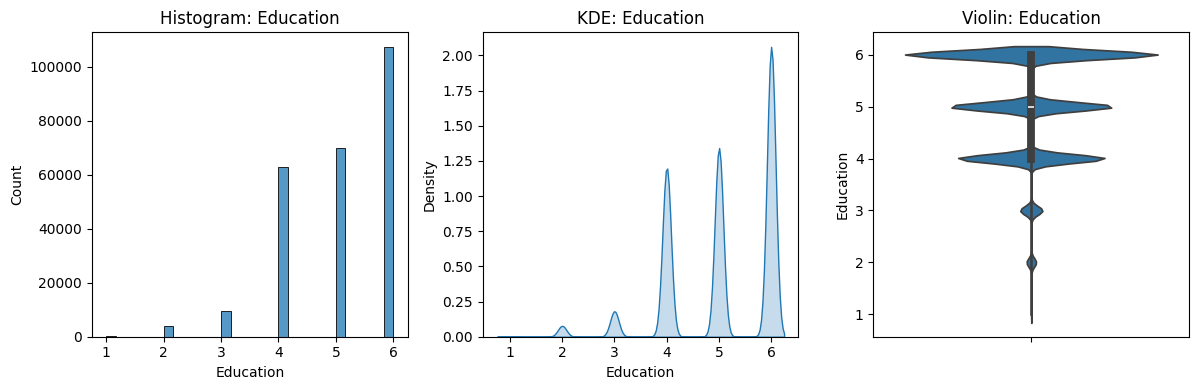

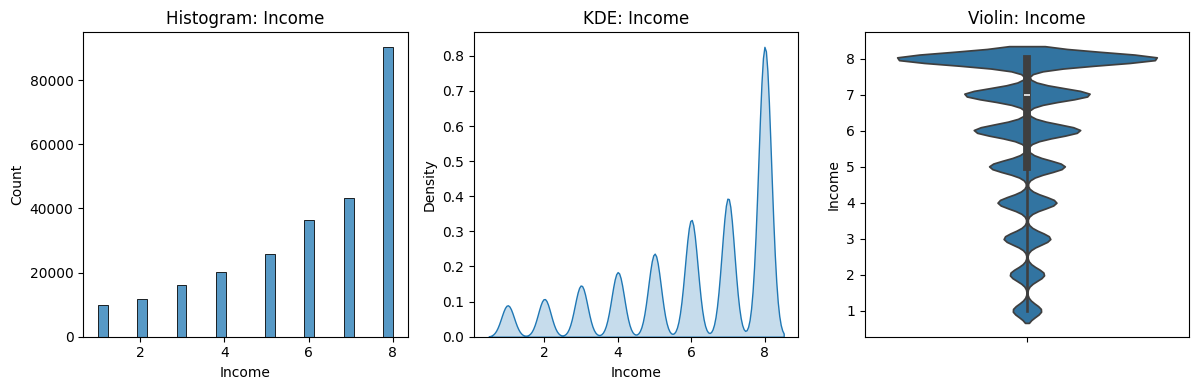

In [17]:
for col in df1.columns:
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    sns.histplot(df1[col], bins=30, kde=False)
    plt.title(f'Histogram: {col}')

    plt.subplot(1, 4, 2)
    try:
        sns.kdeplot(df1[col], fill=True)
        plt.title(f'KDE: {col}')
    except:
        plt.title(f'KDE not valid')

    plt.subplot(1, 4, 3)
    try:
        sns.violinplot(y=df1[col])
        plt.title(f'Violin: {col}')
    except:
        plt.title('Violin not valid')


    plt.tight_layout()
    plt.show()

/tmp/ipykernel_50985/241820582.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diabetes Class')


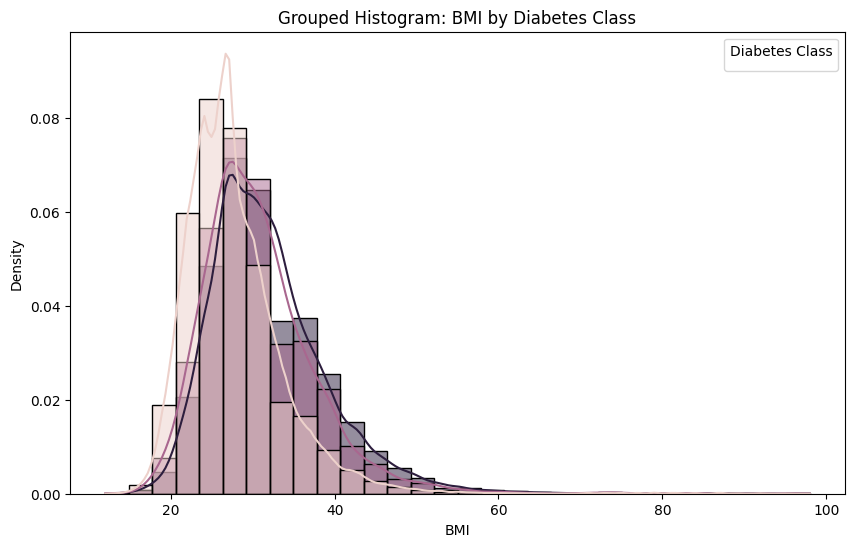

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='BMI', hue='Diabetes_012', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Grouped Histogram: BMI by Diabetes Class')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Diabetes Class')
plt.show()

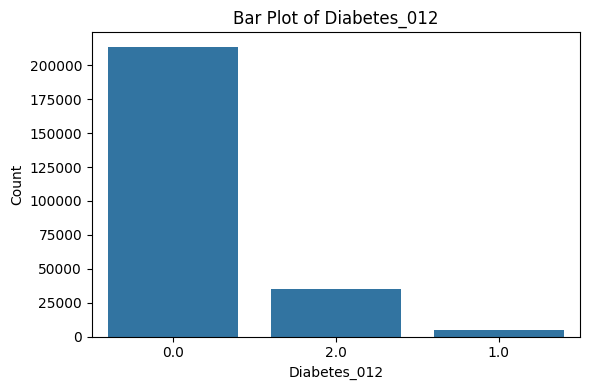

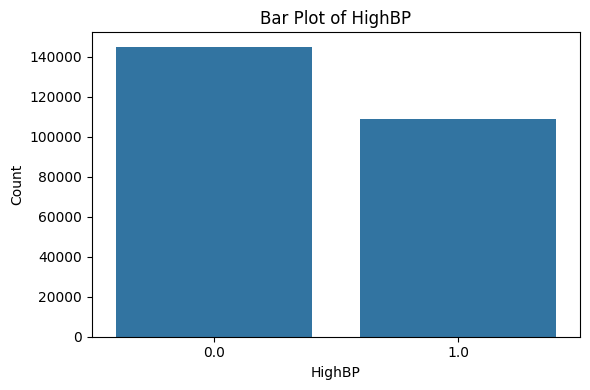

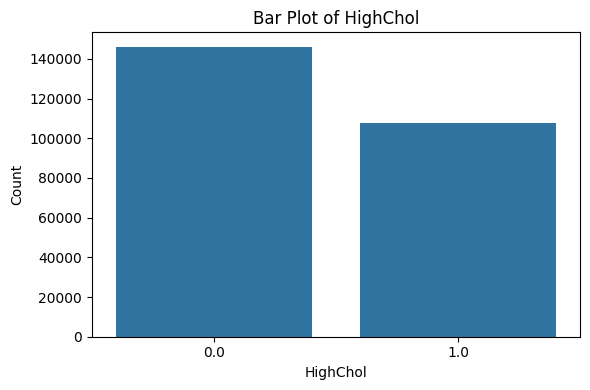

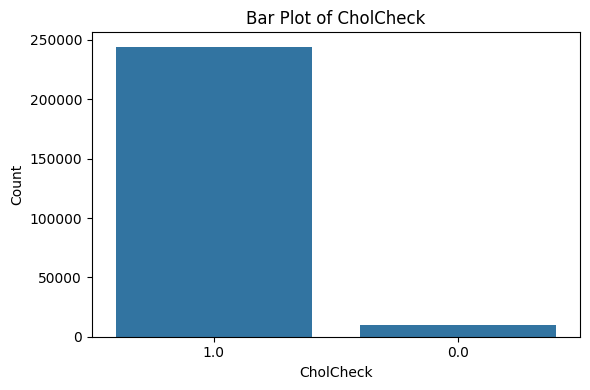

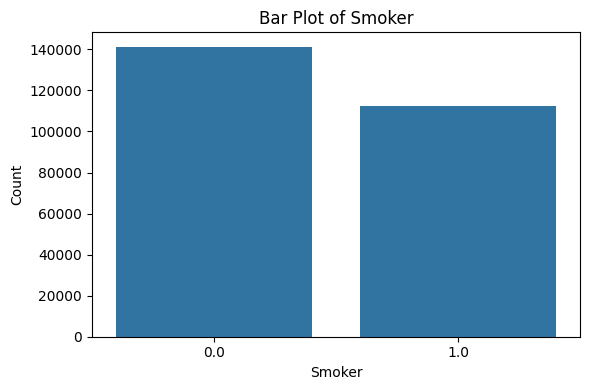

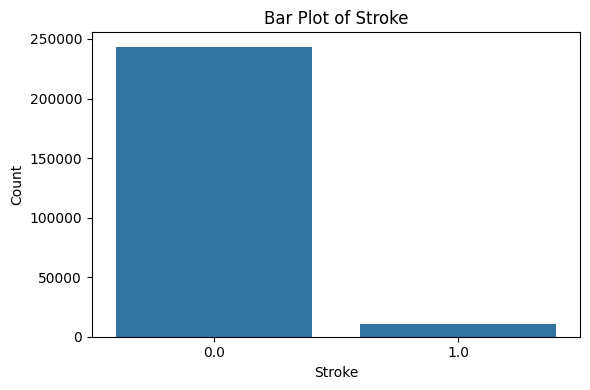

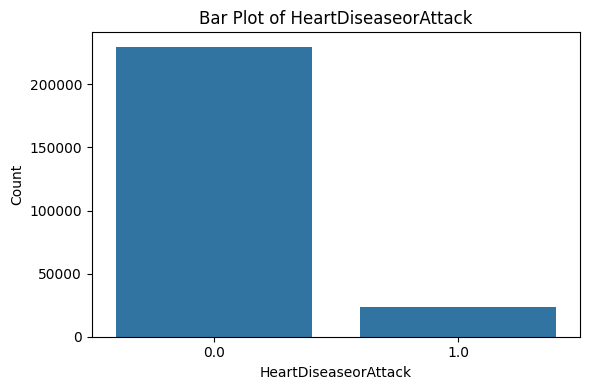

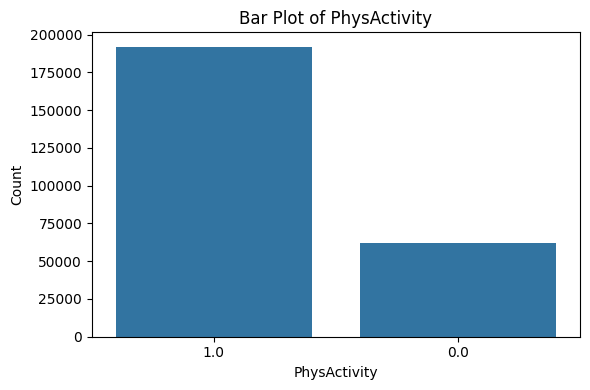

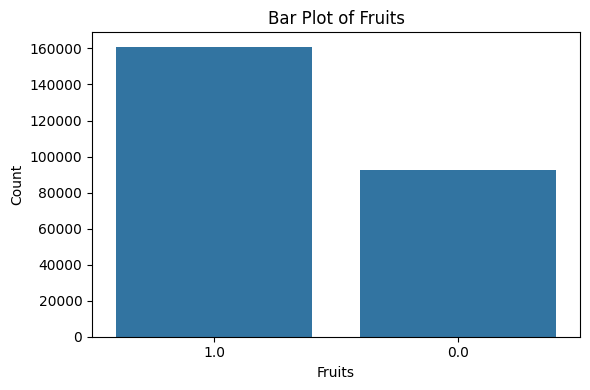

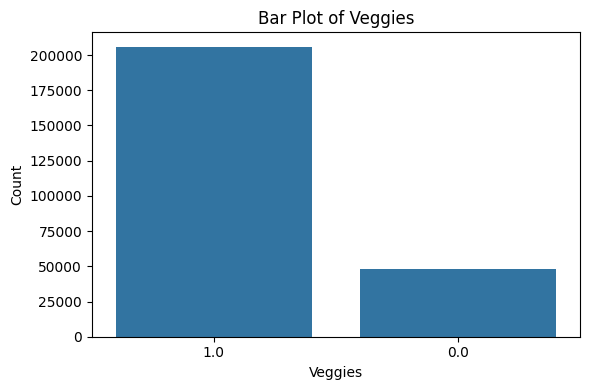

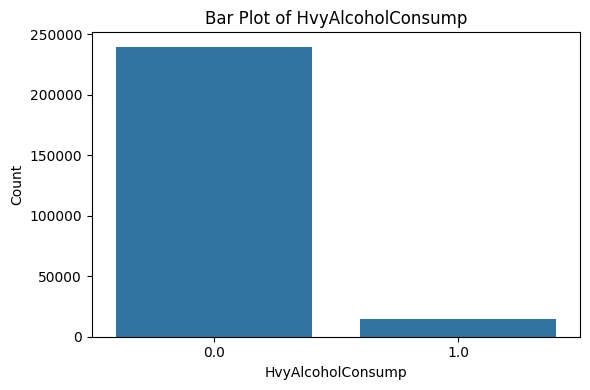

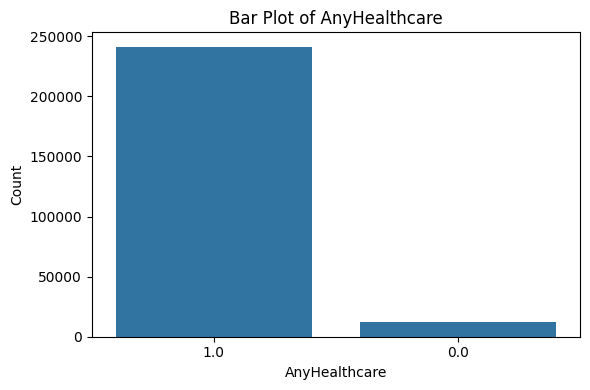

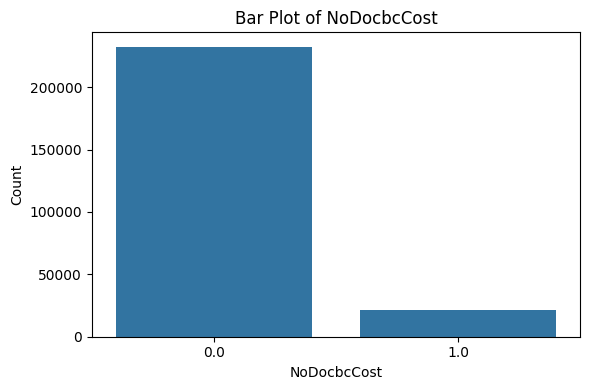

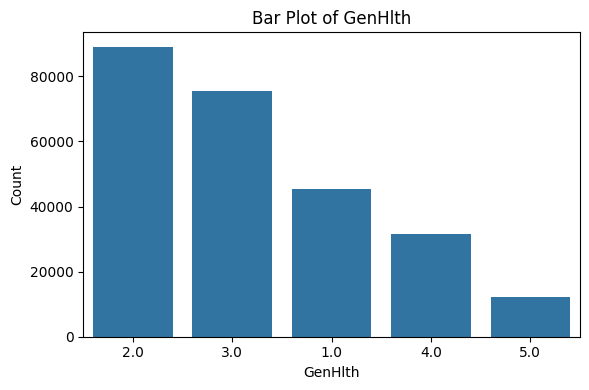

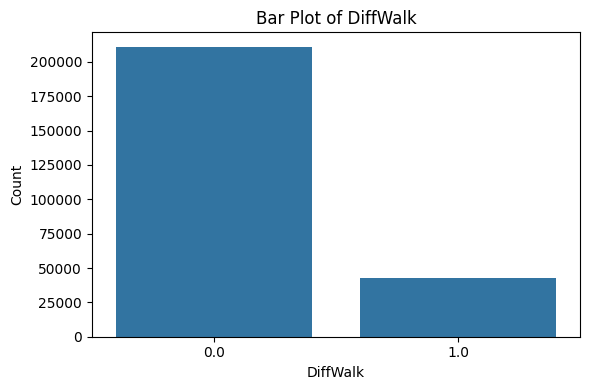

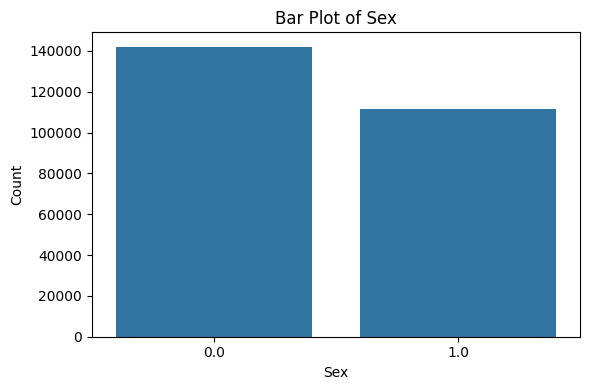

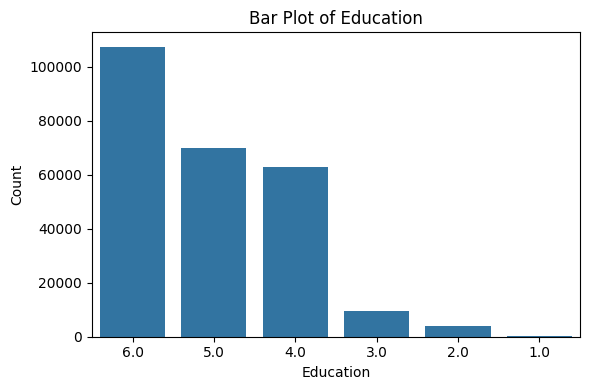

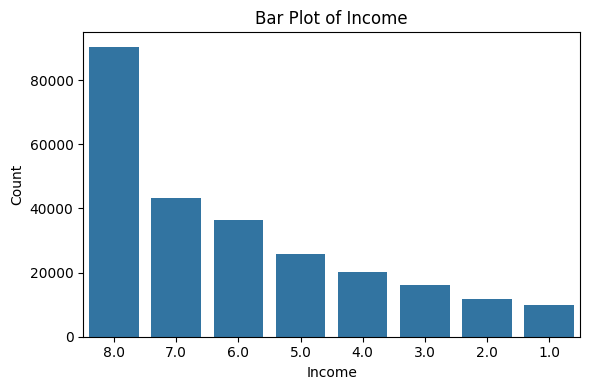

In [19]:
for col in df1.columns:
    if df1[col].nunique() <= 10:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

In [20]:
mean_vals = df1.mean()
median_vals = df1.median()
mode_vals = df1.mode().iloc[0]  

summary_stats = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals
})

print(summary_stats)

                           Mean  Median  Mode
Diabetes_012           0.296921     0.0   0.0
HighBP                 0.429001     0.0   0.0
HighChol               0.424121     0.0   0.0
CholCheck              0.962670     1.0   1.0
BMI                   28.382364    27.0  27.0
Smoker                 0.443169     0.0   0.0
Stroke                 0.040571     0.0   0.0
HeartDiseaseorAttack   0.094186     0.0   0.0
PhysActivity           0.756544     1.0   1.0
Fruits                 0.634256     1.0   1.0
Veggies                0.811420     1.0   1.0
HvyAlcoholConsump      0.056197     0.0   0.0
AnyHealthcare          0.951053     1.0   1.0
NoDocbcCost            0.084177     0.0   0.0
GenHlth                2.511392     2.0   2.0
MentHlth               3.184772     0.0   0.0
PhysHlth               4.242081     0.0   0.0
DiffWalk               0.168224     0.0   0.0
Sex                    0.440342     0.0   0.0
Age                    8.032119     8.0   9.0
Education              5.050434   

Are the Data What You Expect? Are They Usable?
Yes, the dataset is clean, complete (no missing values), and well-structured. It includes:

Health behaviors (smoking, alcohol, physical activity)

Access indicators (healthcare access, cost barriers)

Outcomes (stroke, heart disease, diabetes classification)

These data are highly usable for predictive modeling, clustering, or risk factor analysis of diabetes and related conditions.

Overall Shape of Distributions
Binary/Discrete Variables (e.g., Smoker, Stroke, HighBP):
Appear as two bars in histograms, with the majority concentrated in the 0-class (i.e., absence of the condition).

Ordinal/Scaled Variables:

GenHlth, Age, Education, Income:
Skewed distributions reflecting real-world imbalances (e.g., more people rate general health as poor to moderate).

BMI, MentHlth, PhysHlth:
Right-skewed (positively skewed); many people report low unhealthy days or low BMI, but long tails represent sicker individuals.

Outliers Present?
Yes:

BMI shows values above 50 (extreme obesity)

MentHlth, PhysHlth: some people report 30 unhealthy days (likely max possible response)

Income and Education are bounded but imbalanced toward lower classes

These are legitimate data values in a population health survey and shouldn't be removed unless performing robust regression or normalization.


Min & Max Values in Histograms
BMI: ~10 to 80

MentHlth / PhysHlth: 0 to 30

Age: categorical codes (e.g., 1 = 18–24, 13 = 80+)

GenHlth: 1 (Excellent) to 5 (Poor)
All values are within expected public health survey ranges.

Effect of Bin Sizes
Binary variables are not affected much by bin width.

Scaled variables (e.g., BMI, health scores) show:

Small bin width: reveals spikes (round-number bias)

Large bin width: shows general trend but masks fine patterns

Bin size matters especially for identifying bimodal trends or outlier tails.

Is the Distribution Normal?
Most variables are not normally distributed:

Many are binary

Several are ordinal or skewed right

A few show flat or blocky shapes (e.g., income, age categories)

Hence, non-parametric tests, log transformations, or tree-based models are more appropriate.

Final Conclusion
The dataset is clean, large, and well-suited for machine learning or statistical modeling. While not normally distributed, the variables reflect real-world health data well. Outliers and skewness are expected and should be handled depending on the modeling technique.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.